In [1]:
getwd()

[1] "/hpc/hub_oudenaarden/agiladi/data/small_projects/scripts"

In [2]:
setwd("..")

if (!require("BiocManager")) install.packages('BiocManager') 
BiocManager::install("tanaylab/metacell")

In [3]:
library(devtools)
library(metacell)
library(parallel)
#library(dendextend)
#library(DESeq2)
#library(RColorBrewer)
#library(GEOquery)

source("../tuft/scripts/metacell_functions.r")
scdb_init("saved_work", force=T)
#source_url("https://raw.githubusercontent.com/aygoldberg/PIC-seq/master/scripts/metacell_functions.r")
source_url("https://raw.githubusercontent.com/aygoldberg/PIC-seq/master/scripts/pic_parser.r")
#library(GEOquery)

Warning message:
“package ‘devtools’ was built under R version 4.2.3”
Loading required package: usethis

Warning message:
“package ‘usethis’ was built under R version 4.2.3”
Loading required package: reshape2

Warning message:
“package ‘reshape2’ was built under R version 4.2.3”
Loading required package: plyr

Warning message:
“package ‘plyr’ was built under R version 4.2.3”
Loading required package: plotrix

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘plotrix’”
initializing scdb to saved_work

ℹ SHA-1 hash of file is "9adfcccbce4f308dad9fb0d084241583dbbeb5b8"
Loading required package: glmnet

Loading required package: Matrix

Warning message:
“package ‘Matrix’ was built under R version 4.2.3”
Loaded glmnet 4.1-8



We will now load the relevant metacell objects


In [4]:
id = "hemato_liver"

id_s = paste0(id, "_annotated")
#message("Loaded a UMI matrix of ", sc_mat@ncells, " cells and ", sc_mat@ngenes, " genes.")

message("Loading singlets dataset:")
sin_2d = scdb_mc2d(id); sin_cl = scdb_mc(id_s); sin_mat = scdb_mat(id)
lfp = log2(sin_cl@mc_fp)
message("Loaded a metacell object of ", length(sin_cl@mc), " singlets. Total of ", length(table(sin_cl@mc)), " metacells.")


Loading singlets dataset:

Loaded a metacell object of 14629 singlets. Total of 268 metacells.



In [5]:
write.table(getSlots("tgMCCov"), sep = "\t", quote=F, col.names=F)

mc	vector
outliers	vector
cell_names	vector
mc_fp	matrix
e_gc	matrix
cov_gc	matrix
n_bc	matrix
annots	vector
colors	vector
color_key	data.frame


In [6]:
message("mc contains the assignment of cell to metacell")
head(sin_cl@mc)

message("colors assigns a color label to each metacell, such that each color denotes one annotated cell type or state")
head(sin_cl@colors)

message("color_key maps each color to its annotation")
head(sin_cl@color_key)

message("It is useful to create two-sided directories that allow mapping from color to annotation and from annotation to color")
color_scheme = sin_cl@color_key
color2name = as.vector(color_scheme$group); names(color2name) = color_scheme$color
name2color = as.vector(color_scheme$color); names(name2color) = color_scheme$group

message("Now we can assign each cell with its annotation")
sin_names = color2name[ sin_cl@colors[ sin_cl@mc]]; names(sin_names) = names(sin_cl@mc)

as.matrix(table(sin_names))


mc contains the assignment of cell to metacell



AB1007_AAGCCTT AB1007_AAGGCTA AB1007_ACACGTG AB1007_ACAGCTC AB1007_ACATCCG 
            52             62             60             39             58 
AB1007_ACATGCT 
           114

colors assigns a color label to each metacell, such that each color denotes one annotated cell type or state



[1] "#056863" "#034F25" "#034F25" "#056863" "#056863" "#056863"

color_key maps each color to its annotation



group         color  
preB          preB          #CDA3FF
pDC           pDC           #9EDAFF
T cells       T cells       #00BBDA
NK            NK            #0087DA
Myeloid cells Myeloid cells #B8D6E8
Monocytes     Monocytes     #69D29F

It is useful to create two-sided directories that allow mapping from color to annotation and from annotation to color

Now we can assign each cell with its annotation



[,1]
Basophils                               74
Dendritic cells                        314
Elane+ Ms4a3+ immature neutrophils     712
Endothelial cells                     1963
Erythrocytes                           590
Erythroid cells                       1275
Erythroid progenitors                 2931
Fcnb+ neutrophils                      383
Hepatic stellate cells                  81
Kupffer cells                           74
Liver epithelial cells                 223
Megakaryocyte progenitors              401
Megakaryocytes                         121
Mesothelial cells                      213
Mfap5+ fibroblasts                     100
Mix                                    372
Mmp8 low Retnlg low Fcnb+ neutrophils 1781
Monocytes                              925
Myeloid cells                          322
NK                                      77
pDC                                     88
Platelets                              198
preB                                   486
Retnlg+ mmp8+ neutrophils              810
T cells                                115

message("e_gc is a gene x metacell matrix containing for each column (metacell) the multinomial probability distribution over all genes")
mc_1 = sin_cl@e_gc[,1]
head(sort(mc_1,T),20)

message("mc_fp is a gene x metacell matrix containing for each row (gene) its enrichment (fold change) in each metacell over the median value across all metacells")
mc_1 = sin_cl@mc_fp[,1]
head(sort(mc_1,T),20)

In [7]:
message("In addition, metadata per cell can be extracted from the mat object")
sin_stats = sin_mat@cell_metadata[names(sin_cl@mc),]
sin_stats[ sample(rownames(sin_stats), 5),]

In addition, metadata per cell can be extracted from the mat object



plate cell          barcode umicount mt_frac    Seq.Batch.ID
AB781_CACGAGT AB781 AB781_CACGAGT CACGAGT  867     0.03575548 SB011       
AB974_GTTCGGA AB974 AB974_GTTCGGA GTTCGGA 3335     0.09985007 SB013       
AB850_GCTGAAT AB850 AB850_GCTGAAT GCTGAAT 1875     0.07466667 SB012       
AB848_GGTGATC AB848 AB848_GGTGATC GGTGATC  526     0.13878327 SB012       
AB968_TGGTACC AB968 AB968_TGGTACC TGGTACC 3707     0.09009981 SB013       
              Date.of.sequencing Batch.Set.ID   Owner Date.of.sort ⋯
AB781_CACGAGT 04/09/2023         Maiia-FL-E16.5 Maiia 16/08/23     ⋯
AB974_GTTCGGA 15/02/2024         Maiia-FL-E16.5 Maiia 29/11/2023   ⋯
AB850_GCTGAAT 14/12/2023         Maiia-FL-E16.5 Maiia 29/11/23     ⋯
AB848_GGTGATC 14/12/2023         Maiia-FL-P5    Maiia 13/11/23     ⋯
AB968_TGGTACC 15/02/2024         Maiia-FL-P0    Maiia 06/12/2023   ⋯
              FACS.machine Wells condition Tissue Age   Cell_type Replicate
AB781_CACGAGT BD Aria III  ALL             Liver  E16.5 CD45+     3        
AB974_GTTCGGA S6           ALL             Liver  E16.5 CD150     4        
AB850_GCTGAAT S6           ALL             Liver  E16.5 CD45+     4        
AB848_GGTGATC S6           ALL             Liver  P5    CD150     2        
AB968_TGGTACC S6           ALL             Liver  P0    CD45+     5        
              Analysis    Include amp_batch_id
AB781_CACGAGT Neutrophils Models  1           
AB974_GTTCGGA             Models  1           
AB850_GCTGAAT Neutrophils Models  1           
AB848_GGTGATC             Models  1           
AB968_TGGTACC Neutrophils Models  1

Now, let's use the mc_fp construct to derive the most differential genes and plot them as a heat map.

In [8]:
annotations = as.matrix(read.delim(paste0("config/", id, "_lin-ord.txt"), stringsAsFactor=F, h=T))[,1]
lin_ord = annotations
lin_ord

[1] "preB"                                 
 [2] "pDC"                                  
 [3] "T cells"                              
 [4] "NK"                                   
 [5] "Myeloid cells"                        
 [6] "Monocytes"                            
 [7] "Kupffer cells"                        
 [8] "Dendritic cells"                      
 [9] "Elane+ Ms4a3+ immature neutrophils"   
[10] "Fcnb+ neutrophils"                    
[11] "Mmp8 low Retnlg low Fcnb+ neutrophils"
[12] "Retnlg+ mmp8+ neutrophils"            
[13] "Basophils"                            
[14] "Erythroid progenitors"                
[15] "Erythroid cells"                      
[16] "Erythrocytes"                         
[17] "Megakaryocyte progenitors"            
[18] "Megakaryocytes"                       
[19] "Platelets"                            
[20] "Endothelial cells"                    
[21] "Mesothelial cells"                    
[22] "Mfap5+ fibroblasts"                   
[23] "Hepatic stellate cells"               
[24] "Liver epithelial cells"               
[25] "Mix"

In [9]:
setdiff(lin_ord, names(table(sin_names)))

character(0)

zlim: -9.20167133399361<>9.20167133399361



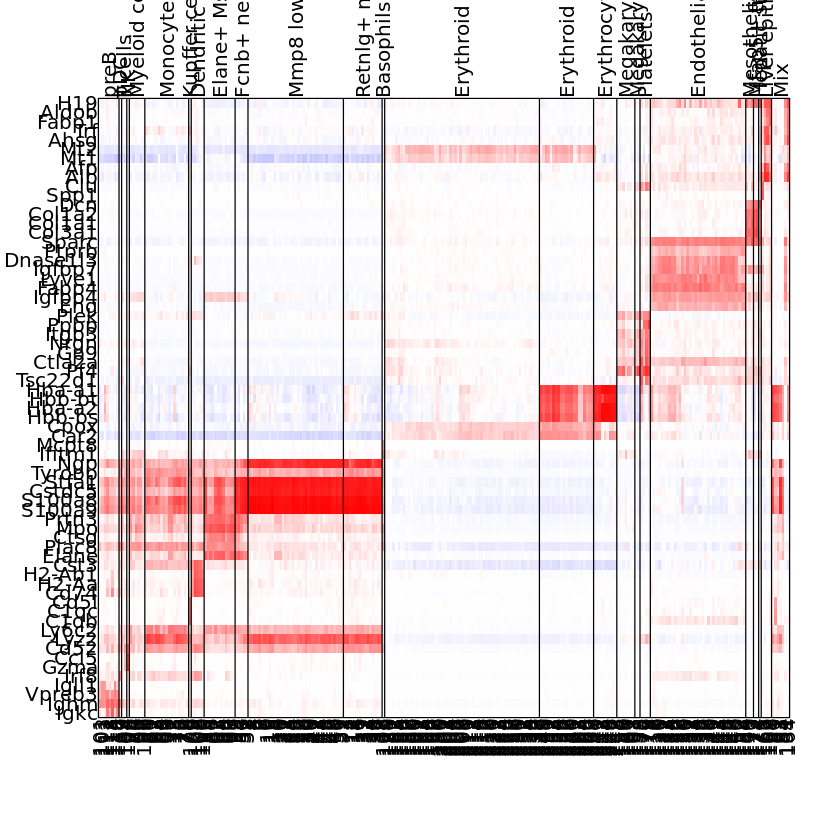

In [10]:
mc2lin = factor(color2name[ sin_cl@colors], levels = lin_ord); 
names(mc2lin) = seq_along(mc2lin)
mc_ord = order(mc2lin)

lfp = log2(sin_cl@mc_fp)
nms = choose_genes_from_clust(mc_id = id_s,      # the unique id of the mc object
                              mat_id = id_s,     # the unique id of the mat object
                              nms_per_clust = 3, # number of differential genes per metacell
                              nms_thresh = 3.5)  # minimum threshold for gene enrichment

IM = lfp[ nms, mc_ord]
IM = IM[ order(max.col(IM)),]

image.2(IM, balance=T, vct = mc2lin[ colnames(IM)])
box()

We can see that our singlet dataset is composed of different T cell and myeloid cell subsets (as well as NK and B cell outliers).
To determine which of our cells derived from population A (T cells) and which from population B (myeloid) cells, let's calculate enrichment of each metacell in each gating scheme:

In [11]:
gating = as.vector(sin_stats$Cell_type)
table(gating)

gating
CD150 CD45- CD45+ 
 6103  2035  6491 

zlim: 0<>0.0314496314496314



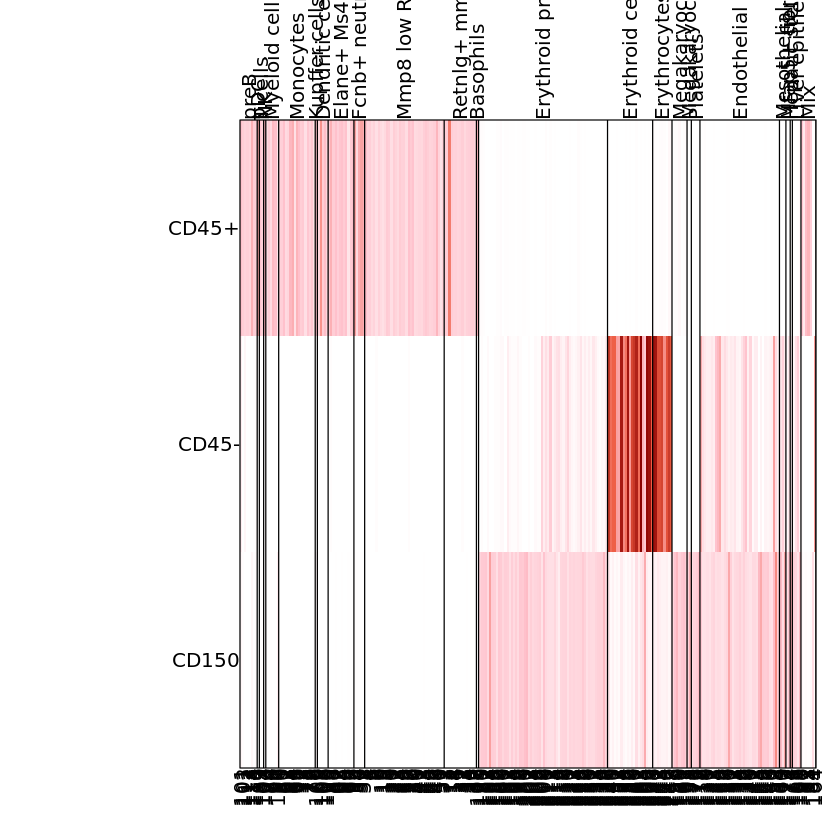

In [12]:
sample_dist = table(gating, sin_cl@mc)
dist_n = sample_dist / rowSums(sample_dist)

par(mar = c(3,10,5,1))
image.2(dist_n, col = colorRampPalette(c("white", "pink", "tomato2", "red4"))(1000), vct=mc2lin[ colnames(dist_n)])
box()

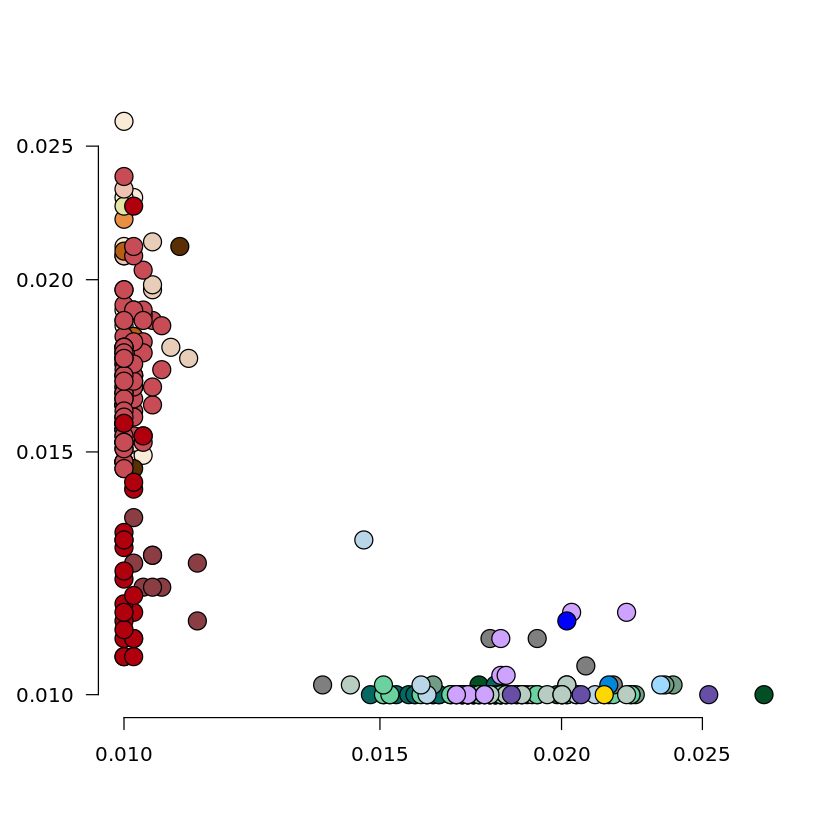

In [13]:
reg = 0.01
plot.2(reg + dist_n["CD45+",], reg + dist_n["CD150",], log = "xy", text = F, pch = 21, cex = 2, bg = sin_cl@colors)

#head(sort(lfp[,100],T),20)
#color2name[ sin_cl@colors[ 100]]

It is evident that T, CD8 T, memory CD8 T, Activated T and Treg are all enriched in the different TCR-$\beta$+ gating, while MigDC, cDC1, cDC2, monocytes and pDC are enriched in the CD11c+ gating. This information will help us determine populations A and B for PIC-seq analysis:

In [14]:
write.table(lin_ord)

"x"
"1" "preB"
"2" "pDC"
"3" "T cells"
"4" "NK"
"5" "Myeloid cells"
"6" "Monocytes"
"7" "Kupffer cells"
"8" "Dendritic cells"
"9" "Elane+ Ms4a3+ immature neutrophils"
"10" "Fcnb+ neutrophils"
"11" "Mmp8 low Retnlg low Fcnb+ neutrophils"
"12" "Retnlg+ mmp8+ neutrophils"
"13" "Basophils"
"14" "Erythroid progenitors"
"15" "Erythroid cells"
"16" "Erythrocytes"
"17" "Megakaryocyte progenitors"
"18" "Megakaryocytes"
"19" "Platelets"
"20" "Endothelial cells"
"21" "Mesothelial cells"
"22" "Mfap5+ fibroblasts"
"23" "Hepatic stellate cells"
"24" "Liver epithelial cells"
"25" "Mix"


In [15]:
bad_mc = c(100)
im_pops = lin_ord[1:13]
ni_pops = lin_ord[14:24]

im_mc = setdiff(which(color2name[ sin_cl@colors] %in% im_pops), bad_mc)
ni_mc = setdiff(which(color2name[ sin_cl@colors] %in% ni_pops), bad_mc)
bad_mc = setdiff(names(table(sin_cl@mc)), union(im_mc, ni_mc))

im_cells = names(sin_cl@mc)[ sin_cl@mc %in% im_mc]
ni_cells = names(sin_cl@mc)[ sin_cl@mc %in% ni_mc]

message(length(im_cells), " immune cells and ", length(ni_cells), " CD150+ cells")
bad_mc

6113 immune cells and 8096 CD150+ cells



[1] "80"  "81"  "82"  "83"  "84"  "100" "151" "164"

Now we are all set to prepare for PIC-seq analysis. First, we'll use the singlets metacell model to derive two sets of genes (i.e features) for the two steps of the PIC-seq analysis:

In [16]:
markers = names(scdb_gset(id)@gene_set) # Set of features used for the Metacell clustering
bad_genes = grep("Gm[0-9].|Mir|-ps|Rpl|Rps|Ig|Jchain|Ftl1|Malat1", sin_mat@genes, v=T)
markers

[1] "1810058I24Rik" "Acta2"         "Actb"          "Adh1"         
  [5] "Afp"           "Ahsg"          "Akr1c6"        "Alad"         
  [9] "Alb"           "Aldoa"         "Aldob"         "Alox12"       
 [13] "Alox5ap"       "Ambp"          "Anxa1"         "Anxa2"        
 [17] "Ap2s1"         "Apoa1"         "Apoa2"         "Apoc1"        
 [21] "Apoe"          "Apoh"          "Aqp1"          "Arhgdib"      
 [25] "Arl6ip1"       "Arpc1b"        "Asns"          "Aspn"         
 [29] "Ass1"          "Atp1b3"        "B2m"           "Bgn"          
 [33] "Bhmt"          "Bin2"          "Blvrb"         "Bpgm"         
 [37] "Btg1"          "C1qb"          "C1qc"          "C3"           
 [41] "Calr"          "Camp"          "Car1"          "Car2"         
 [45] "Cav1"          "Ccl5"          "Ccl6"          "Ccl9"         
 [49] "Cct6a"         "Cd177"         "Cd24a"         "Cd52"         
 [53] "Cd5l"          "Cd63"          "Cd7"           "Cd74"         
 [57] "Cd79b"         "Cd81"          "Cd9"           "Cd93"         
 [61] "Cdkn1c"        "Chil3"         "Clec12a"       "Clec14a"      
 [65] "Clec1b"        "Clec4g"        "Clu"           "Cma1"         
 [69] "Cnn2"          "Col14a1"       "Col1a1"        "Col1a2"       
 [73] "Col3a1"        "Col4a1"        "Col5a2"        "Colec10"      
 [77] "Coro1a"        "Cpa3"          "Cpox"          "Crip1"        
 [81] "Csf1r"         "Cst3"          "Csta2"         "Csta3"        
 [85] "Cstdc4"        "Cstdc5"        "Cstdc6"        "Ctdsp1"       
 [89] "Ctla2a"        "Ctsb"          "Ctsc"          "Ctsg"         
 [93] "Ctsl"          "Ctss"          "Cxcl10"        "Cxcl12"       
 [97] "Cxcl9"         "Cyb5a"         "Cyba"          "Cybb"         
[101] "Cyp2e1"        "Dbi"           "Dcn"           "Degs1"        
[105] "Dlk1"          "Dnase1l3"      "Ecm1"          "Ehd3"         
[109] "Elane"         "Eln"           "Eng"           "Epb41"        
[113] "Ets1"          "F13a1"         "F2r"           "Fabp1"        
[117] "Fabp4"         "Fabp5"         "Fbp1"          "Fcer1g"       
[121] "Fcgr2b"        "Fcna"          "Fcnb"          "Fech"         
[125] "Fermt3"        "Fga"           "Fgb"           "Fgg"          
[129] "Fkbp1a"        "Flna"          "Flt4"          "Fn1"          
[133] "Fpr2"          "Fstl1"         "Fth1"          "Ftl1"         
[137] "Gata2"         "Gc"            "Gclm"          "Glrx"         
[141] "Glrx5"         "Glud1"         "Glul"          "Gng11"        
[145] "Gp9"           "Gpi1"          "Gpihbp1"       "Gpx4"         
[149] "Grn"           "Gypa"          "Gzma"          "Gzmb"         
[153] "H19"           "H2-Aa"         "H2-Ab1"        "H2-D1"        
[157] "H2-Eb1"        "H2-K1"         "H2bc4"         "Hba-a1"       
[161] "Hba-a2"        "Hbb-bs"        "Hbb-bt"        "Hdc"          
[165] "Hdgf"          "Hemgn"         "Hmbs"          "Hmgb2"        
[169] "Hmgcs2"        "Hmox1"         "Hp"            "Hsp90aa1"     
[173] "Hsp90b1"       "Hspa5"         "Hspa8"         "Hspe1"        
[177] "Id2"           "Ifi27l2a"      "Ifi30"         "Ifitm1"       
[181] "Ifitm2"        "Ifitm3"        "Ifitm6"        "Igfbp1"       
[185] "Igfbp3"        "Igfbp4"        "Igfbp5"        "Igfbp7"       
[189] "Ighm"          "Igkc"          "Igll1"         "Iigp1"        
[193] "Il1r2"         "Il6st"         "Irf8"          "Isg15"        
[197] "Isg20"         "Itga2b"        "Itgb3"         "Itih2"        
[201] "Itm2a"         "Itm2b"         "Jak1"          "Kdr"          
[205] "Kng1"          "Laptm5"        "Lcn2"          "Lcp1"         
[209] "Lgals1"        "Lgals3"        "Lsp1"          "Ltf"          
[213] "Lum"           "Ly6a"          "Ly6a2"         "Ly6c2"        
[217] "Ly6d"          "Ly6e"          "Lyve1"         "Lyz2"         
[221] "Macroh2a1"     "Maf"           "Marcks"        "Marco"        
[225] "Mat1a"         "Mcpt8"         "Meg3"          "Mif"          
[229] "Mkrn1

In [17]:
message("Choose features for the linear regression estimation of Alpha:")
lr_features = choose_lr_features(mat_id = id, 
                                 a_cells = im_cells, 
                                 b_cells = ni_cells, 
                                 bad_genes=bad_genes, 
                                 cor_n=100, 
                                 must_haves=markers)
message("Chose ", length(lr_features), " features")

message("Choose features for the maximum likelihood estimation of the A and B metacells:")
mle_features = choose_mle_features(mc_id = id_s, 
                                   mat_id = id, 
                                   a_cells = im_cells, 
                                   b_cells = ni_cells, 
                                   bad_genes= bad_genes, 
                                   shared_thresh=1,
                                   existing_list = markers)
message("Chose ", length(mle_features), " features")

Choose features for the linear regression estimation of Alpha:

Chose 468 features

Choose features for the maximum likelihood estimation of the A and B metacells:

add batch counts

compute footprints

compute absolute ps

compute coverage ps

add batch counts

compute footprints

compute absolute ps

compute coverage ps

Chose 359 features



In [18]:
write.table(lr_features, quote=F, row.names=F, col.names=F, file = "annotations/lr_features.txt")
write.table(mle_features, quote=F, row.names=F, col.names=F, file = "annotations/mle_features.txt")

In [19]:
lr_features = read.table("annotations/lr_features.txt", h=F, stringsAsFactors = F)[[1]]
mle_features = read.table("annotations/mle_features.txt", h=F, stringsAsFactors = F)[[1]]

message("Chose ", length(lr_features), " features")
message("Chose ", length(mle_features), " features")

Chose 468 features

Chose 359 features



Before we continue with the PIC-seq analysis, we will try to estimate how well the algorithm performs on synthetic doublets (which are generated by random pairing and pooling of cells from populations A and B).

We will first simulate k=5000 synthetic PICs, and down-sample them to numis=1,000 UMI each:

In [20]:
numis = 750; k = 5000
res = simulate_doublets(mat_id = id, 
                        a_cells = im_cells, 
                        b_cells = ni_cells, 
                        k = k, 
                        numis = rep(numis, k))

sim_umis = res$sim_umis; sim_info = res$info
head(sim_info)


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.5 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.1 GiB”


sim.1         sim.2         alpha.1   alpha.2  
Sim1 AB845_GCATCAG AB976_CTTAAGC 0.4626667 0.5373333
Sim2 AB781_GCATGGA AB751_CGCATAT 0.6453333 0.3546667
Sim3 AB461_CAGTCAA AB991_GTGTCTA 0.2613333 0.7386667
Sim4 AB344_CGGATTA AB812_AGCACTG 0.2746667 0.7253333
Sim5 AB978_AACCTTG AB599_CGAAGGT 0.2440000 0.7560000
Sim6 AB344_CTGTGAG AB598_CGCATTG 0.4080000 0.5920000

The sim_umis is the count matrix of the synthetic doublets, and sim_info contains information about the pairs of singlets composing these doublets, as well as their mixing co-efficient alpha.1.

Now to test the MLE engine that estimates the metacell identities of PICs, by running it on the synthetic doublets:

In [21]:
sim_cells = names(which(colSums(sim_umis) == numis))
sim_umis = sim_umis[,sim_cells]; sim_info = sim_info[sim_cells,]
sim_alpha = sim_info$alpha.1; names(sim_alpha) = rownames(sim_info)


sim_mle_res = assign_pics_to_singlets(mc_id = id_s, 
                                      mat_id = id, 
                                      pic_umis = sim_umis, 
                                      a_cells = im_cells, 
                                      b_cells = ni_cells, 
                                      alpha = sim_alpha,
                                      verbose=T, 
                                      bad_genes = bad_genes, 
                                      markers = mle_features, 
                                      reg = 1e-4)

write.table(sim_info, sep = "\t", quote=F, col.names=NA, file = "annotations/sim_info.txt")
write.table(sim_mle_res, sep = "\t", quote=F, col.names=NA, file = "annotations/sim_mle_res.txt")

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.5 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.2 GiB”
100%



We can now compute and plot the confusion between the true and inferred metacell identities for both the T cells and DC compartments: 

In [22]:
im_confu = table(sin_cl@mc[ as.vector( sim_info$sim.1)], sim_mle_res$a_mc)
im_n = im_confu / rowSums(im_confu)
ni_confu = table(sin_cl@mc[ as.vector( sim_info$sim.2)], sim_mle_res$b_mc)
ni_n = ni_confu / rowSums(ni_confu)

zlim: 0<>1



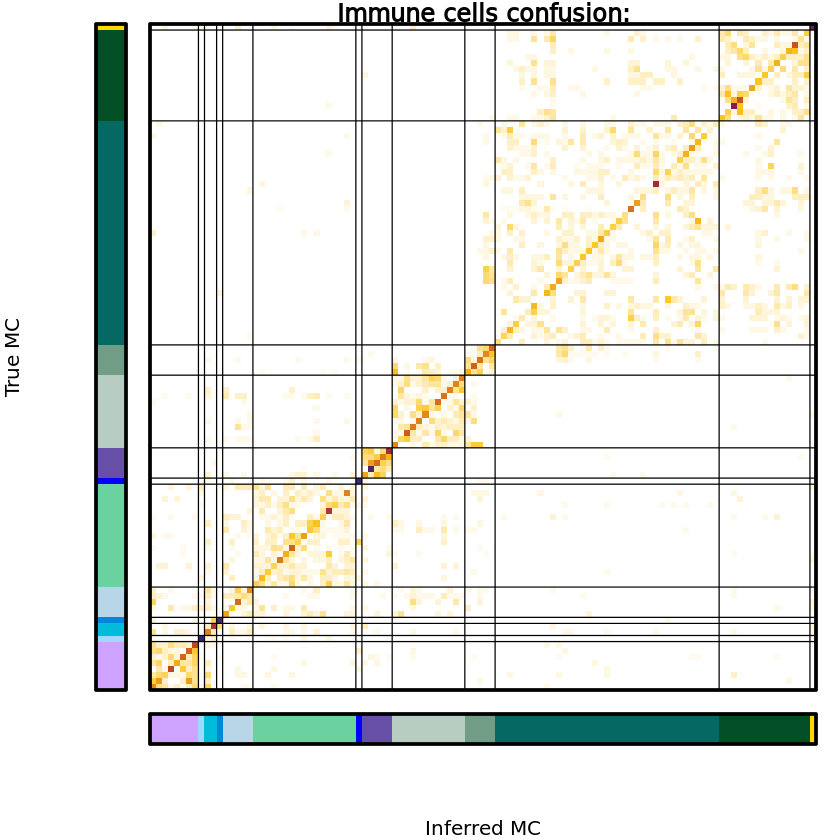

In [23]:
grad = colorRampPalette(c("white", "#FDC51D", "#CA531C", "#951851", "#36277A", "black"))(1000)
im_cls = factor(color2name[ sin_cl@colors[ as.numeric(rownames(im_n))]], levels = lin_ord)
par(mar = rep(1,4), lwd = 3, fig = c(0.15,1,0.15,1))
image.2(im_n, zlim = c(0,1), col = grad, annotate = "none", hct = im_cls, vct = im_cls); box()
title("Immune cells confusion:")
par(fig = c(0.15,1,0,0.15), mar = c(4,1,0,1), new = T)
image(matrix(seq_along(im_cls)), axes = F, col = name2color[ as.vector(sort(im_cls))], xlab = "Inferred MC"); box()
par(fig = c(0,0.15,0.15,1), mar = c(1,4,1,0), new = T)
image(t(seq_along(im_cls)), axes = F, col = name2color[ as.vector(sort(im_cls))], ylab = "True MC"); box()

zlim: 0<>1



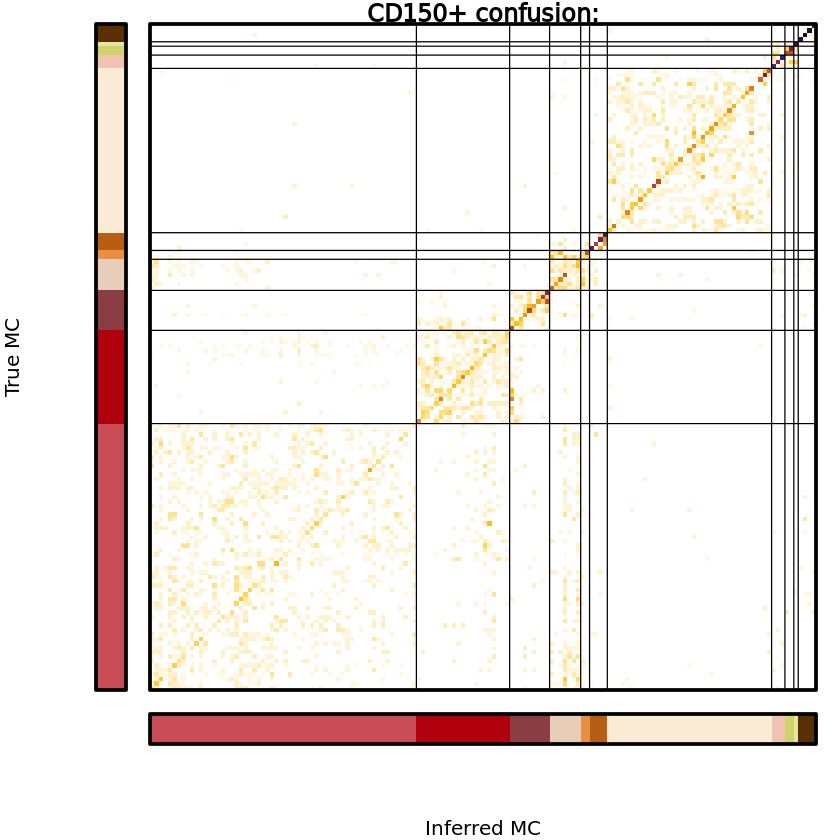

In [24]:
ni_cls = factor(color2name[ sin_cl@colors[ as.numeric(rownames(ni_n))]], levels = lin_ord)
par(mar = rep(1,4), lwd = 3, fig = c(0.15,1,0.15,1))
image.2(ni_n, zlim = c(0,1), col = grad, annotate = "none", hct = ni_cls,vct = ni_cls); box()
title("CD150+ confusion:")
par(fig = c(0.15,1,0,0.15), mar = c(4,1,0,1), new	= T)
image(matrix(seq_along(ni_cls)), axes = F, col = name2color[ as.vector(sort(ni_cls))], xlab = "Inferred MC");box()
par(fig = c(0,0.15,0.15,1), mar = c(1,4,1,0), new = T)
image(t(seq_along(ni_cls)), axes = F, col = name2color[ as.vector(sort(ni_cls))], ylab = "True MC"); box()

We can similarly try to estimate the mixing factors, $\alpha$, of the synthetic doublets and compare them to their true values:

In [25]:
alpha_fit = estimate_mixing(sim_umis = sim_umis, 
                            alpha = sim_info$alpha.1, 
                            genes = lr_features, 
                            fname = "./temp.png")
alpha_tag = predict(alpha_fit, newx = t(sim_umis[lr_features,]), s = "lambda.min")[,1]

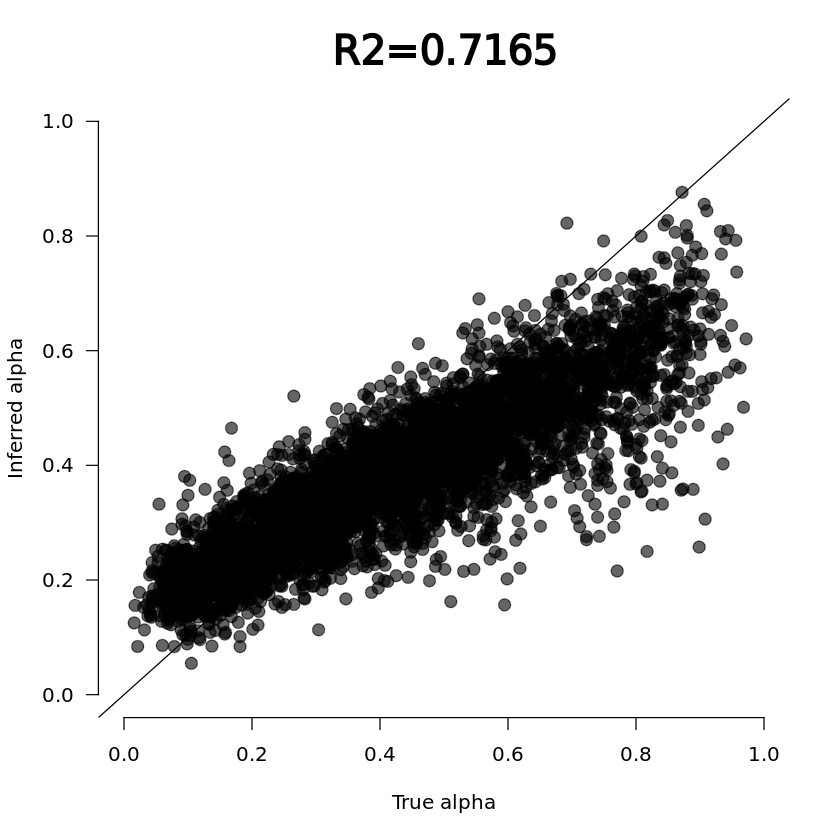

In [26]:
i = which(alpha_fit$lambda == alpha_fit$lambda.min)
plot(sim_info[, "alpha.1"], alpha_tag, pch = 20, col = rgb(0,0,0,0.6), xlim = c(0,1), ylim = c(0,1),
	cex=2, cex.main=2, main = paste0("R2=", round(1 - alpha_fit$cvm[i] / var(sim_info$alpha.1),4)), axes=F, xlab = "True alpha", ylab = "Inferred alpha")
abline(coef = c(0,1)); axis(1); axis(2,las=2)

We are now ready to run the PIC-seq algorithm on the real PICs, collected from the double positive gate.

In [27]:
cell_stats = scdb_mat("hemato_all")@cell_metadata
table(cell_stats$Tissue, cell_stats$Cell_type)

       
        CD150 CD150-CD45 CD45- CD45+ CSF1R/CD206/F4/80-CD41
  Bones  1920          0  6912  9216                      0
  Liver  9216      10752  3072 12672                   1920

In [28]:
pics = rownames(cell_stats)[ cell_stats$umicount > 500 & cell_stats$mt_frac < 0.25 &
          cell_stats$Tissue == "Liver" & cell_stats$Cell_type %in% c("CD150-CD45", "CSF1R/CD206/F4/80-CD41")]
length(pics)

[1] 8651

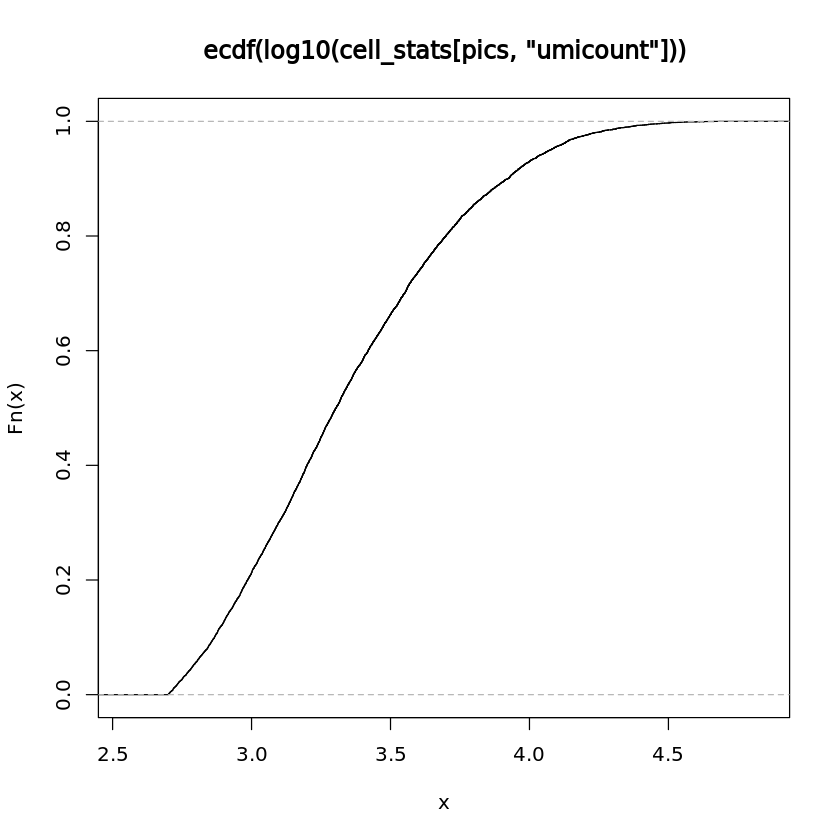

In [29]:
plot(ecdf(log10(cell_stats[ pics, "umicount"])))

In [30]:
cells = union(im_cells, ni_cells)
sin_umis = read_large_umis(id, cells = cells)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.5 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.1 GiB”


In [31]:
numis=750
pic_umis = read_large_umis("hemato_all", cells = pics)
umis = cbind(pic_umis[ rownames(sin_umis),], sin_umis)
ds = .downsamp(umis, numis)
message("Retained ", ncol(ds), " PIC with >", numis, " UMI")

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.2 GiB”
Retained 19243 PIC with >750 UMI



mle_res = run_pic_seq(mc_id = id_s, 
                      mat_id = id, 
                      pic_umis = ds, 
                      a_cells = im_cells, 
                      b_cells = ni_cells, 
                      lr_features = lr_features, 
                      mle_features = mle_features, 
                      fname="./temp.png", 
                      bad_genes = bad_genes,
                      reg = 1e-4, # regularization factor negating the effect of very low expression values
                      numis = 750, 
                      downsample=F, # We already provide a down-sampled matrix
                      lr_k = 1e4 # We'll generate 10,000 synthetic PICs for alpha estimation
                     )

head(mle_res)

In [32]:
mle_res = read.delim("annotations/mle_res_750u.txt", stringsAsFactors = F, row.names=1)
head(mle_res)
tail(mle_res)

a_mc b_mc ll        alpha     cell           type sin_alpha
AB1001_AACATCG  70  175  -47.61003 0.4735343 AB1001_AACATCG PIC  0        
AB1001_AACGGTG  95  160  -63.14303 0.7437441 AB1001_AACGGTG PIC  1        
AB1001_AACTCGT  53  179  -40.68614 0.7245003 AB1001_AACTCGT PIC  1        
AB1001_AAGGCTA 106  158  -29.58002 0.3063712 AB1001_AAGGCTA PIC  0        
AB1001_AAGTGCA  69  176  -49.78949 0.1372649 AB1001_AAGTGCA PIC  0        
AB1001_ACAATCG  91  162  -58.76805 0.2857988 AB1001_ACAATCG PIC  0        
               sin_ll    diff        a_pop                             
AB1001_AACATCG -79.89284 32.28281766 Myeloid cells                     
AB1001_AACGGTG -66.36662  3.22359114 Elane+ Ms4a3+ immature neutrophils
AB1001_AACTCGT -35.63545 -5.05068116 Fcnb+ neutrophils                 
AB1001_AAGGCTA -33.94530  4.36527771 Kupffer cells                     
AB1001_AAGTGCA -52.63341  2.84392009 Dendritic cells                   
AB1001_ACAATCG -58.85005  0.08199683 Myeloid cells                     
               b_pop                    
AB1001_AACATCG Platelets                
AB1001_AACGGTG Megakaryocyte progenitors
AB1001_AACTCGT Erythroid progenitors    
AB1001_AAGGCTA Megakaryocytes           
AB1001_AAGTGCA Platelets                
AB1001_ACAATCG Megakaryocyte progenitors

a_mc b_mc ll        alpha     cell          type       sin_alpha
AB997_TTCATGG  89  215  -13.22514 0.2029345 AB997_TTCATGG Non-immune 0        
AB997_TTCCTGA 101  202  -28.84192 0.1888099 AB997_TTCCTGA Non-immune 0        
AB997_TTGCACC 113  217  -18.35943 0.2238853 AB997_TTGCACC Non-immune 0        
AB997_TTGCCAG  91  231  -32.81388 0.1879534 AB997_TTGCCAG Non-immune 0        
AB997_TTGCCTA  89  211  -49.16795 0.1595019 AB997_TTGCCTA Non-immune 0        
AB997_TTGGTCA 101  257  -37.70417 0.1616933 AB997_TTGGTCA Non-immune 0        
              sin_ll    diff       a_pop         b_pop                
AB997_TTCATGG -12.76649 -0.4586458 T cells       Erythroid progenitors
AB997_TTCCTGA -28.36964 -0.4722793 preB          Erythroid progenitors
AB997_TTGCACC -18.14903 -0.2103997 preB          Erythroid progenitors
AB997_TTGCCAG -31.80271 -1.0111757 Myeloid cells Erythroid progenitors
AB997_TTGCCTA -47.38022 -1.7877218 T cells       Erythroid progenitors
AB997_TTGGTCA -35.74397 -1.9601961 preB          Erythroid cells

In [33]:
dim(cell_stats)

[1] 55680    30

In [33]:
head(cell_stats)
head(mle_res)

plate  cell           barcode umicount mt_frac    Seq.Batch.ID
AB1000_AACAGCT AB1000 AB1000_AACAGCT AACAGCT 1596     0.04260652 SB013       
AB1000_AACATCG AB1000 AB1000_AACATCG AACATCG 1290     0.09379845 SB013       
AB1000_AACCTTG AB1000 AB1000_AACCTTG AACCTTG 2806     0.09337135 SB013       
AB1000_AACGGTG AB1000 AB1000_AACGGTG AACGGTG  318     0.89308176 SB013       
AB1000_AACGTTC AB1000 AB1000_AACGTTC AACGTTC 1617     0.14594929 SB013       
AB1000_AACTCGT AB1000 AB1000_AACTCGT AACTCGT  583     0.08919383 SB013       
               Date.of.sequencing Batch.Set.ID Owner Date.of.sort ⋯
AB1000_AACAGCT 15/02/2024         Maiia-BM-P0  Maiia 06/12/2023   ⋯
AB1000_AACATCG 15/02/2024         Maiia-BM-P0  Maiia 06/12/2023   ⋯
AB1000_AACCTTG 15/02/2024         Maiia-BM-P0  Maiia 06/12/2023   ⋯
AB1000_AACGGTG 15/02/2024         Maiia-BM-P0  Maiia 06/12/2023   ⋯
AB1000_AACGTTC 15/02/2024         Maiia-BM-P0  Maiia 06/12/2023   ⋯
AB1000_AACTCGT 15/02/2024         Maiia-BM-P0  Maiia 06/12/2023   ⋯
               FACS.machine Wells condition Tissue Age Cell_type Replicate
AB1000_AACAGCT S6           ALL             Bones  P0  CD45-     4        
AB1000_AACATCG S6           ALL             Bones  P0  CD45-     4        
AB1000_AACCTTG S6           ALL             Bones  P0  CD45-     4        
AB1000_AACGGTG S6           ALL             Bones  P0  CD45-     4        
AB1000_AACGTTC S6           ALL             Bones  P0  CD45-     4        
AB1000_AACTCGT S6           ALL             Bones  P0  CD45-     4        
               Analysis Include amp_batch_id
AB1000_AACAGCT          Models  1           
AB1000_AACATCG          Models  1           
AB1000_AACCTTG          Models  1           
AB1000_AACGGTG          Models  1           
AB1000_AACGTTC          Models  1           
AB1000_AACTCGT          Models  1

a_mc b_mc ll        alpha     cell           type sin_alpha
AB1001_AACATCG  70  175  -47.61003 0.4735343 AB1001_AACATCG PIC  0        
AB1001_AACGGTG  95  160  -63.14303 0.7437441 AB1001_AACGGTG PIC  1        
AB1001_AACTCGT  53  179  -40.68614 0.7245003 AB1001_AACTCGT PIC  1        
AB1001_AAGGCTA 106  158  -29.58002 0.3063712 AB1001_AAGGCTA PIC  0        
AB1001_AAGTGCA  69  176  -49.78949 0.1372649 AB1001_AAGTGCA PIC  0        
AB1001_ACAATCG  91  162  -58.76805 0.2857988 AB1001_ACAATCG PIC  0        
               sin_ll    diff        a_pop                             
AB1001_AACATCG -79.89284 32.28281766 Myeloid cells                     
AB1001_AACGGTG -66.36662  3.22359114 Elane+ Ms4a3+ immature neutrophils
AB1001_AACTCGT -35.63545 -5.05068116 Fcnb+ neutrophils                 
AB1001_AAGGCTA -33.94530  4.36527771 Kupffer cells                     
AB1001_AAGTGCA -52.63341  2.84392009 Dendritic cells                   
AB1001_ACAATCG -58.85005  0.08199683 Myeloid cells                     
               b_pop                    
AB1001_AACATCG Platelets                
AB1001_AACGGTG Megakaryocyte progenitors
AB1001_AACTCGT Erythroid progenitors    
AB1001_AAGGCTA Megakaryocytes           
AB1001_AAGTGCA Platelets                
AB1001_ACAATCG Megakaryocyte progenitors

In [35]:
mle_res$cell = rownames(mle_res)

In [36]:
mle_res$type = "PIC"
mle_res[ rownames(mle_res) %in% im_cells, "type"] = "Immune"
mle_res[ rownames(mle_res) %in% ni_cells, "type"] = "Non-immune"
mle_res$sin_alpha = with(mle_res, ifelse(type == "PIC", 1 * (alpha >= 0.5), 1 * (cell %in% im_cells)))

In [37]:
head(mle_res)
tail(mle_res)

a_mc b_mc ll        alpha     cell           type sin_alpha
AB1001_AACATCG  70  175  -47.61003 0.4735343 AB1001_AACATCG PIC  0        
AB1001_AACGGTG  95  160  -63.14303 0.7437441 AB1001_AACGGTG PIC  1        
AB1001_AACTCGT  53  179  -40.68614 0.7245003 AB1001_AACTCGT PIC  1        
AB1001_AAGGCTA 106  158  -29.58002 0.3063712 AB1001_AAGGCTA PIC  0        
AB1001_AAGTGCA  69  176  -49.78949 0.1372649 AB1001_AAGTGCA PIC  0        
AB1001_ACAATCG  91  162  -58.76805 0.2857988 AB1001_ACAATCG PIC  0

a_mc b_mc ll        alpha     cell          type       sin_alpha
AB997_TTCATGG  89  215  -13.22514 0.2029345 AB997_TTCATGG Non-immune 0        
AB997_TTCCTGA 101  202  -28.84192 0.1888099 AB997_TTCCTGA Non-immune 0        
AB997_TTGCACC 113  217  -18.35943 0.2238853 AB997_TTGCACC Non-immune 0        
AB997_TTGCCAG  91  231  -32.81388 0.1879534 AB997_TTGCCAG Non-immune 0        
AB997_TTGCCTA  89  211  -49.16795 0.1595019 AB997_TTGCCTA Non-immune 0        
AB997_TTGGTCA 101  257  -37.70417 0.1616933 AB997_TTGGTCA Non-immune 0

In [38]:
pic_ll_to_pair = function(mc_id, mat_id, pic_umis, mc_a, mc_b, alpha, bins = length(alpha), reg = 1e-6, markers = NULL) {

        sc_cl = scdb_mc(mc_id); sc_mat = scdb_mat(mat_id)
        umis = read_large_umis(mat_id, cells = names(sc_cl@mc))
	if (is.null(markers)) {
                mc_prof = sc_cl@e_gc[setdiff(rownames(sc_cl@e_gc), bad_genes),]
	} else {
                mc_prof = mc_compute_unnorm_fp(sc_cl@mc, umis[setdiff(markers, bad_genes),])
        }
	mc_prof = sweep(mc_prof, 2, colSums(mc_prof), "/")
        p_a = mc_prof[, mc_a] + reg
        p_b = mc_prof[, mc_b] + reg
        p = sweep(p_a, 2, alpha, "*") + sweep(p_b, 2, 1 - alpha, "*")
        u = pic_umis[rownames(mc_prof), ]
        ll = colSums(u * log(p)) + apply(u, 2, stirlings_lmulti)
	ll
}

In [39]:
venn(rownames(mle_res), colnames(ds))


  A,B     B 
19208    35 

In [40]:
mle_res$sin_ll = with(mle_res, pic_ll_to_pair(id, id, ds[,cell], a_mc, b_mc, sin_alpha, reg = 1e-4, markers = mle_features))
mle_res$diff = with(mle_res, ll - sin_ll)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.5 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.2 GiB”


In [41]:
library(scales)

Warning message:
“package ‘scales’ was built under R version 4.2.3”


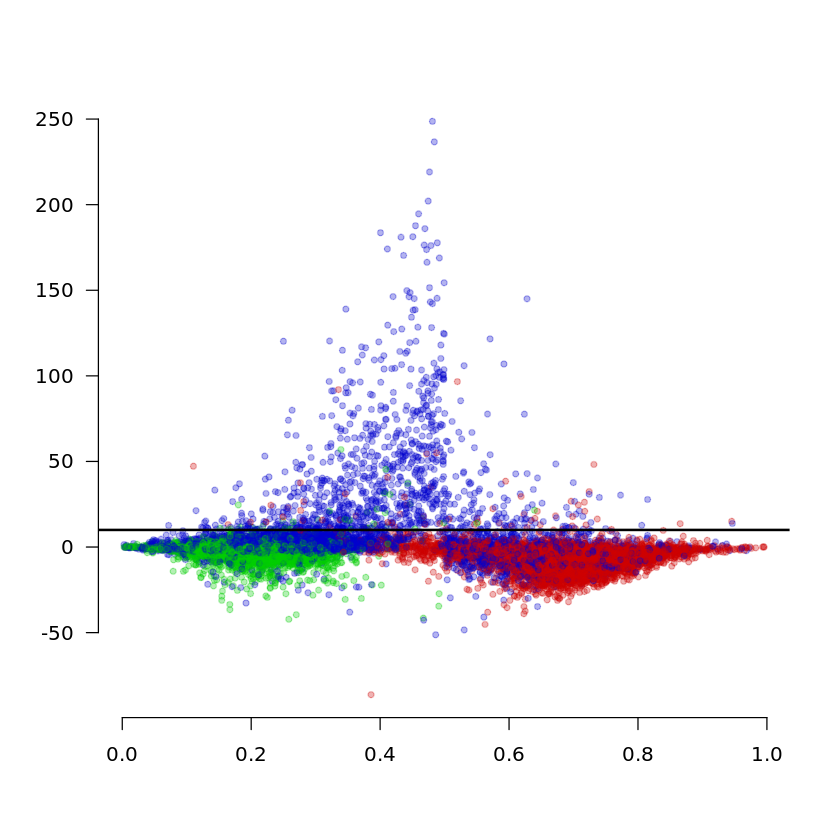

In [42]:
with(mle_res[ sample(seq_len(nrow(mle_res))),], plot.2(alpha, diff, col = alpha(rainbow(3, v = 0.8)[ as.numeric(factor(type))], 0.3)))
abline(h = 10, lwd = 2)

In [43]:
X = with(mle_res, table(type, diff > 5))
round(100 * X / rowSums(X), 2)

            
type         FALSE  TRUE
  Immune     97.06  2.94
  Non-immune 98.49  1.51
  PIC        79.31 20.69

In [44]:
mle_res$a_pop = color2name[ sin_cl@colors[ mle_res$a_mc]]
mle_res$b_pop = color2name[ sin_cl@colors[ mle_res$b_mc]]
head(mle_res)

a_mc b_mc ll        alpha     cell           type sin_alpha
AB1001_AACATCG  70  175  -47.61003 0.4735343 AB1001_AACATCG PIC  0        
AB1001_AACGGTG  95  160  -63.14303 0.7437441 AB1001_AACGGTG PIC  1        
AB1001_AACTCGT  53  179  -40.68614 0.7245003 AB1001_AACTCGT PIC  1        
AB1001_AAGGCTA 106  158  -29.58002 0.3063712 AB1001_AAGGCTA PIC  0        
AB1001_AAGTGCA  69  176  -49.78949 0.1372649 AB1001_AAGTGCA PIC  0        
AB1001_ACAATCG  91  162  -58.76805 0.2857988 AB1001_ACAATCG PIC  0        
               sin_ll    diff        a_pop                             
AB1001_AACATCG -79.89284 32.28281766 Myeloid cells                     
AB1001_AACGGTG -66.36662  3.22359114 Elane+ Ms4a3+ immature neutrophils
AB1001_AACTCGT -35.63545 -5.05068116 Fcnb+ neutrophils                 
AB1001_AAGGCTA -33.94530  4.36527771 Kupffer cells                     
AB1001_AAGTGCA -52.63341  2.84392009 Dendritic cells                   
AB1001_ACAATCG -58.85005  0.08199683 Myeloid cells                     
               b_pop                    
AB1001_AACATCG Platelets                
AB1001_AACGGTG Megakaryocyte progenitors
AB1001_AACTCGT Erythroid progenitors    
AB1001_AAGGCTA Megakaryocytes           
AB1001_AAGTGCA Platelets                
AB1001_ACAATCG Megakaryocyte progenitors

In [45]:
write.table(mle_res, sep = "\t", quote=F, col.names=NA, file = "annotations/mle_res_750u.txt")

In [34]:

good_pics = rownames(mle_res)[ mle_res$type == "PIC" & mle_res$diff > 2]
length(good_pics)
alpha = mle_res[good_pics, "alpha"]; names(alpha) = good_pics
im_mc = mle_res[good_pics, "a_mc"]; names(im_mc) = good_pics
ni_mc = mle_res[good_pics, "b_mc"]; names(ni_mc) = good_pics
parser_im = color2name[ sin_cl@colors[ im_mc]]; names(parser_im) = good_pics
parser_ni = color2name[ sin_cl@colors[ ni_mc]]; names(parser_ni) = good_pics

table(parser_im)
table(parser_ni)

[1] 2480

parser_im
                            Basophils                       Dendritic cells 
                                   55                                   140 
   Elane+ Ms4a3+ immature neutrophils                     Fcnb+ neutrophils 
                                  112                                    56 
                        Kupffer cells Mmp8 low Retnlg low Fcnb+ neutrophils 
                                  453                                   268 
                            Monocytes                         Myeloid cells 
                                  322                                   218 
                                   NK                                   pDC 
                                   52                                    25 
                                 preB             Retnlg+ mmp8+ neutrophils 
                                  280                                   186 
                              T cells 
                           

parser_ni
        Endothelial cells              Erythrocytes           Erythroid cells 
                      307                       194                        97 
    Erythroid progenitors    Hepatic stellate cells    Liver epithelial cells 
                      614                        23                       136 
Megakaryocyte progenitors            Megakaryocytes         Mesothelial cells 
                      680                       153                        44 
       Mfap5+ fibroblasts                 Platelets 
                        2                       230 

mle_res is the main output of the PIC-seq algorithm and contains for each processed PIC its inferred $\alpha$ (field **alpha**), its assigment to T and DC metacells (fields **a_mc** and **b_mc**), as well as the log likelihood value for this specific assignment (**ll**). ll can be later used to compare between different assignment models, for example, when modeling PICs as triplets, which we'll show below.

## Explore separately each population

In [35]:
im_mc = names(table(sin_cl@mc[ im_cells]))
ni_mc = names(table(sin_cl@mc[ ni_cells]))

zlim: -6.52541535821011<>6.52541535821011



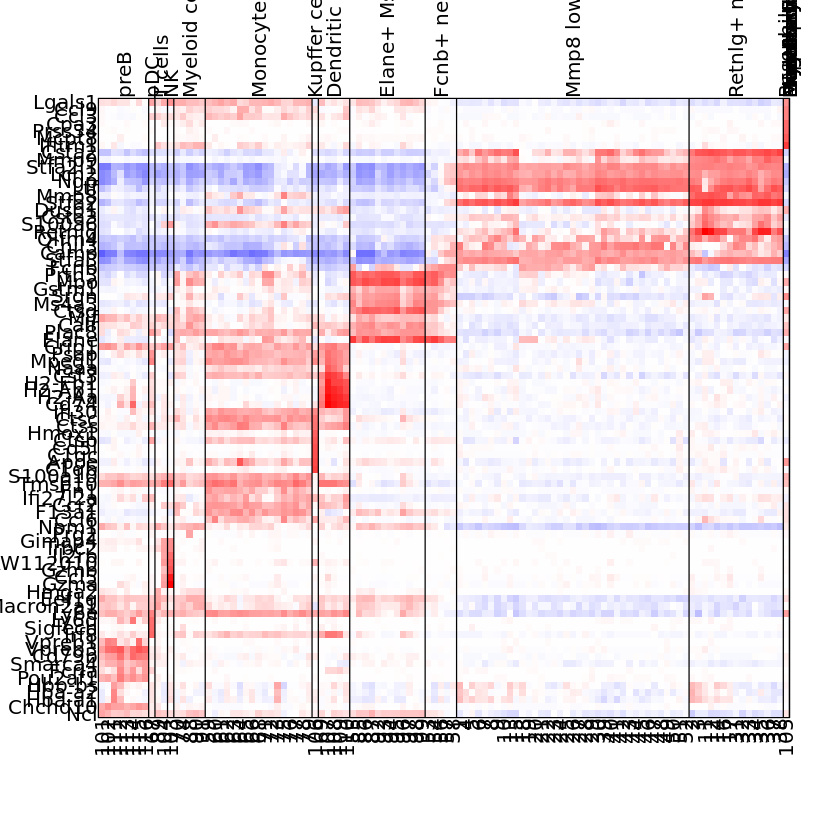

In [36]:
id_a = paste0(id_s, "_a")
a_nms = choose_genes_from_clust(id_a, id, 
        nms_per_clust = 6, nms_thresh = 2, 
        ord = "max.col", bad_genes = bad_genes)
a_lfp = log2(scdb_mc(id_a)@mc_fp)
colnames(a_lfp) = im_mc
IM = a_lfp[a_nms,]
IM = IM[, order(mc2lin[ colnames(IM)])]
IM = IM[ order(max.col(IM)),]
a_nms = rownames(IM)
image.2(IM, b=T, vct = mc2lin[ colnames(IM)]); box()

zlim: -8.7480472999103<>8.7480472999103



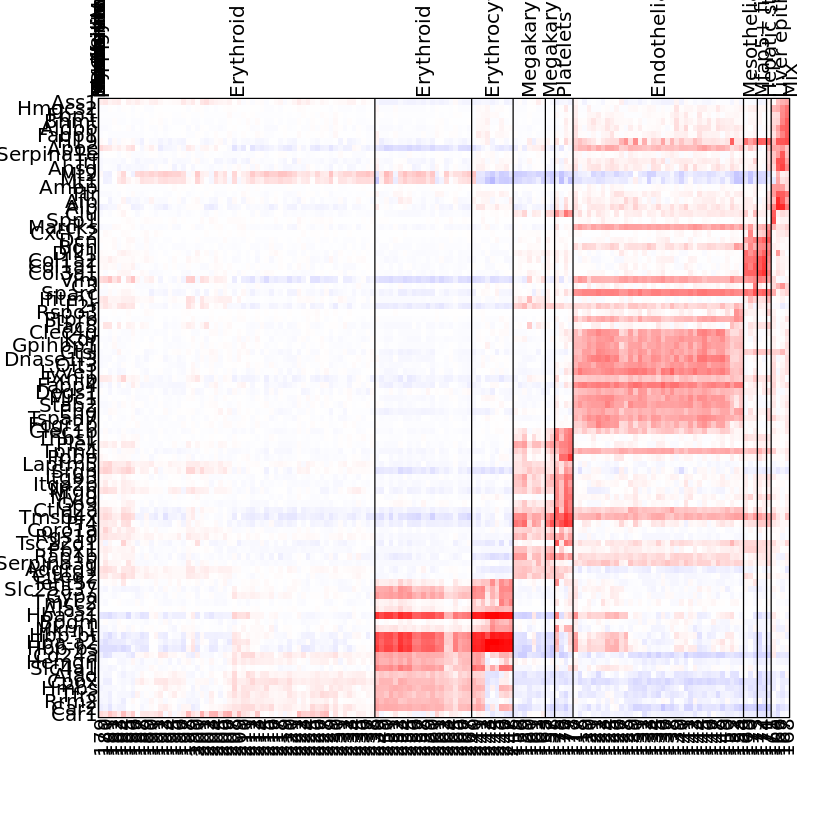

In [37]:
id_b = paste0(id_s, "_b")
b_nms = choose_genes_from_clust(id_b, id, 
        nms_per_clust = 6, nms_thresh = 2, 
        ord = "max.col", bad_genes = bad_genes)
b_lfp = log2(scdb_mc(id_b)@mc_fp)
colnames(b_lfp) = ni_mc
IM = b_lfp[b_nms,]
IM = IM[, order(mc2lin[ colnames(IM)])]
IM = IM[ order(max.col(IM)),]
b_nms = rownames(IM)
image.2(IM, b=T, vct = mc2lin[ colnames(IM)]); box()

In [38]:
venn(a_nms, b_nms)


  A A,B   B 
 79   7  87 

In [39]:
genes_shades = colorRampPalette(c("white", 
        "orange", "tomato", "mediumorchid4", "midnightblue"))(1000)

In [40]:
outdir = "results/hemato_liver_pics/"
dir.create(outdir)

Warning message in dir.create(outdir):
“'results/hemato_liver_pics' already exists”


In [41]:
parser_both = interaction(factor(parser_im, levels = lin_ord), factor(parser_ni, levels = lin_ord), sep = "@")
parser_both = factor(parser_both, levels = names(which(table(parser_both) > 0)))
names(parser_both) = names(parser_im)
table(parser_both)

parser_both
                                     preB@Erythroid progenitors 
                                                             73 
                                      pDC@Erythroid progenitors 
                                                              8 
                                  T cells@Erythroid progenitors 
                                                             80 
                                       NK@Erythroid progenitors 
                                                             18 
                            Myeloid cells@Erythroid progenitors 
                                                             61 
                                Monocytes@Erythroid progenitors 
                                                             84 
                            Kupffer cells@Erythroid progenitors 
                                                             65 
                          Dendritic cells@Erythroid progenitors 
             

In [42]:


nms = unique(c(a_nms, b_nms, "Cd34", "Ifitm1", "Serpina3g", "Prtn3", "Ifitm3", "Cebpa", "Ly86"))
sin_cells = union(im_cells, ni_cells)
vct = factor(sin_names[sin_cells], levels = lin_ord); names(vct) = sin_cells

png(paste0(outdir, "/pics_heatmap.png"), height = max(2000, length(nms) * 12), width = 3000)
IM = log(1 + 7 * sin_umis[nms, sin_cells])
IM = IM[, order(vct[ colnames(IM)])]
par(mar = c(0.5,10,0.5,3), fig = c(0,.5,0.1,1))
image.2(IM, col = genes_shades, vct = vct[ colnames(IM)], annotate = "rows", hct = rownames(IM) %in% b_nms); box()
par(fig = c(0,0.5,0.05,0.1), new = T)
image(matrix(seq_along(vct)), axes = F, col = name2color[ as.vector(vct[colnames(IM)])]); box()
par(fig = c(0,0.5,0,0.05), new = T)
image(matrix(seq_along(vct)), axes = F, col = name2color[ as.vector(vct[colnames(IM)])]); box()



IM = log(1 + 7 * pic_umis[nms, good_pics])
IM = IM[,order(parser_both[ colnames(IM)])]
par(mar = c(0.5,10,0.5,3), fig = c(0.5,1,0.1,1), new=T)
image.2(IM, col = genes_shades, vct = parser_both[ colnames(IM)], annotate = "rows", hct = rownames(IM) %in% b_nms); box()
par(fig = c(0.5,1,0.05,0.1), new = T)
image(matrix(seq_along(parser_both)), axes = F, col = name2color[ vecsplit(as.vector(parser_both[colnames(IM)]), "@", 1)]); box()
par(fig = c(0.5,1,0,0.05), new = T)
image(matrix(seq_along(parser_both)), axes = F, col = name2color[ vecsplit(as.vector(parser_both[colnames(IM)]), "@", 2)]); box()
dev.off()

zlim: 0<>9.34294633652421

zlim: 0<>9.8428879304072



pdf 
  2

In [43]:
parser_both_rev = interaction(factor(parser_ni, levels = lin_ord), factor(parser_im, levels = lin_ord), sep = "@")
parser_both_rev = factor(parser_both_rev, levels = names(which(table(parser_both_rev) > 0)))
names(parser_both_rev) = names(parser_im)
table(parser_both_rev)

parser_both_rev
                                     Erythroid progenitors@preB 
                                                             73 
                                           Erythroid cells@preB 
                                                             10 
                                              Erythrocytes@preB 
                                                             22 
                                 Megakaryocyte progenitors@preB 
                                                             69 
                                            Megakaryocytes@preB 
                                                              6 
                                                 Platelets@preB 
                                                             31 
                                         Endothelial cells@preB 
                                                             26 
                                         Mesothelial cells@preB 
         

In [44]:
head(cell_stats$Age)

[1] "P0" "P0" "P0" "P0" "P0" "P0"

In [45]:
nms = unique(c(a_nms, b_nms))
sin_cells = union(im_cells, ni_cells)
vct = factor(sin_names[sin_cells], levels = lin_ord); names(vct) = sin_cells
vct = interaction(vct, as.vector(cell_stats[ sin_cells, "Age"])); names(vct) = sin_cells
table(vct)

vct
                                 preB.E16.5 
                                        169 
                                  pDC.E16.5 
                                         20 
                              T cells.E16.5 
                                         50 
                                   NK.E16.5 
                                          9 
                        Myeloid cells.E16.5 
                                         90 
                            Monocytes.E16.5 
                                        386 
                        Kupffer cells.E16.5 
                                         25 
                      Dendritic cells.E16.5 
                                         53 
   Elane+ Ms4a3+ immature neutrophils.E16.5 
                                        254 
                    Fcnb+ neutrophils.E16.5 
                                        144 
Mmp8 low Retnlg low Fcnb+ neutrophils.E16.5 
                                        594 
      

In [46]:


nms = unique(c(a_nms, b_nms))
sin_cells = union(im_cells, ni_cells)
vct = factor(sin_names[sin_cells], levels = lin_ord); names(vct) = sin_cells
c
png(paste0(outdir, "/pics_heatmap_rev.png"), height = max(2000, length(nms) * 12), width = 3000)
IM = log(1 + 7 * sin_umis[nms, sin_cells])
IM = IM[, order(vct[ colnames(IM)])]
par(mar = c(0.5,10,0.5,3), fig = c(0,.5,0.1,1))
image.2(IM, col = genes_shades, vct = vct[ colnames(IM)], annotate = "rows", hct = rownames(IM) %in% b_nms); box()
par(fig = c(0,0.5,0.05,0.1), new = T)
image(matrix(seq_along(vct)), axes = F, col = name2color[ as.vector(vct[colnames(IM)])]); box()
par(fig = c(0,0.5,0,0.05), new = T)
image(matrix(seq_along(vct)), axes = F, col = name2color[ as.vector(vct[colnames(IM)])]); box()



IM = log(1 + 7 * pic_umis[nms, good_pics])
IM = IM[,order(parser_both_rev[ colnames(IM)])]
par(mar = c(0.5,10,0.5,3), fig = c(0.5,1,0.1,1), new=T)
image.2(IM, col = genes_shades, vct = parser_both_rev[ colnames(IM)], annotate = "rows", hct = rownames(IM) %in% b_nms); box()
par(fig = c(0.5,1,0.05,0.1), new = T)
image(matrix(seq_along(parser_both_rev)), axes = F, col = name2color[ vecsplit(as.vector(parser_both_rev[colnames(IM)]), "@", 1)]); box()
par(fig = c(0.5,1,0,0.05), new = T)
image(matrix(seq_along(parser_both_rev)), axes = F, col = name2color[ vecsplit(as.vector(parser_both_rev[colnames(IM)]), "@", 2)]); box()
dev.off()

function (...)  .Primitive("c")

zlim: 0<>9.34294633652421

zlim: 0<>9.8428879304072



pdf 
  2

In [47]:
tps = names(table(cell_stats$Age))
tps

[1] "E16.5" "P0"    "P5"

In [48]:


nms = unique(c(a_nms, b_nms))
sin_cells = union(im_cells, ni_cells)
vct = factor(sin_names[sin_cells], levels = lin_ord); names(vct) = sin_cells

for (tp in tps) {
    message(tp)
    png(paste0(outdir, "/pics_heatmap_rev_", tp, ".png"), height = max(2000, length(nms) * 12), width = 3000)
    sub_singlets = intersect(sin_cells, rownames(cell_stats)[ cell_stats$Age == tp])
    IM = log(1 + 7 * sin_umis[nms, sub_singlets])
    IM = IM[, order(vct[ colnames(IM)])]
    par(mar = c(0.5,10,0.5,3), fig = c(0,.5,0.1,1))
    image.2(IM, col = genes_shades, vct = vct[ colnames(IM)], annotate = "rows", hct = rownames(IM) %in% b_nms); box()
    par(fig = c(0,0.5,0.05,0.1), new = T)
    image(matrix(seq_along(vct)), axes = F, col = name2color[ as.vector(vct[colnames(IM)])]); box()
    par(fig = c(0,0.5,0,0.05), new = T)
    image(matrix(seq_along(vct)), axes = F, col = name2color[ as.vector(vct[colnames(IM)])]); box()


    sub_pics = intersect(good_pics, rownames(cell_stats)[ cell_stats$Age == tp])
    IM = log(1 + 7 * pic_umis[nms, sub_pics])
    IM = IM[,order(parser_both_rev[ colnames(IM)])]
    par(mar = c(0.5,10,0.5,3), fig = c(0.5,1,0.1,1), new=T)
    image.2(IM, col = genes_shades, vct = parser_both_rev[ colnames(IM)], annotate = "rows", hct = rownames(IM) %in% b_nms); box()
    par(fig = c(0.5,1,0.05,0.1), new = T)
    image(matrix(seq_along(parser_both_rev)), axes = F, col = name2color[ vecsplit(as.vector(parser_both_rev[colnames(IM)]), "@", 1)]); box()
    par(fig = c(0.5,1,0,0.05), new = T)
    image(matrix(seq_along(parser_both_rev)), axes = F, col = name2color[ vecsplit(as.vector(parser_both_rev[colnames(IM)]), "@", 2)]); box()
    dev.off()
}


E16.5

zlim: 0<>9.18522767116111

zlim: 0<>9.8428879304072

P0

zlim: 0<>9.29394595583098

zlim: 0<>9.44762348684411

P5

zlim: 0<>9.34294633652421

zlim: 0<>8.9242570208881



## Downstream analysis

We'll now discuss downstream analysis of the PIC-seq results, mainly how to test for deviations from the NULL model, which assumes PIC to be perferct doublets of two cells, uniformly sampled from populations A and B.
First, we'll look whether PICs are distributed evenly across all T cell and DC subsets:

Now, we'll compare the distribution of T cell subsets in PIC (stored in parser_t), to its distribution in the singlet TCR$\beta$+ population, across experimental conditions:

In [49]:
head(cell_stats)

plate  cell           barcode umicount mt_frac    Seq.Batch.ID
AB1000_AACAGCT AB1000 AB1000_AACAGCT AACAGCT 1596     0.04260652 SB013       
AB1000_AACATCG AB1000 AB1000_AACATCG AACATCG 1290     0.09379845 SB013       
AB1000_AACCTTG AB1000 AB1000_AACCTTG AACCTTG 2806     0.09337135 SB013       
AB1000_AACGGTG AB1000 AB1000_AACGGTG AACGGTG  318     0.89308176 SB013       
AB1000_AACGTTC AB1000 AB1000_AACGTTC AACGTTC 1617     0.14594929 SB013       
AB1000_AACTCGT AB1000 AB1000_AACTCGT AACTCGT  583     0.08919383 SB013       
               Date.of.sequencing Batch.Set.ID Owner Date.of.sort ⋯
AB1000_AACAGCT 15/02/2024         Maiia-BM-P0  Maiia 06/12/2023   ⋯
AB1000_AACATCG 15/02/2024         Maiia-BM-P0  Maiia 06/12/2023   ⋯
AB1000_AACCTTG 15/02/2024         Maiia-BM-P0  Maiia 06/12/2023   ⋯
AB1000_AACGGTG 15/02/2024         Maiia-BM-P0  Maiia 06/12/2023   ⋯
AB1000_AACGTTC 15/02/2024         Maiia-BM-P0  Maiia 06/12/2023   ⋯
AB1000_AACTCGT 15/02/2024         Maiia-BM-P0  Maiia 06/12/2023   ⋯
               FACS.machine Wells condition Tissue Age Cell_type Replicate
AB1000_AACAGCT S6           ALL             Bones  P0  CD45-     4        
AB1000_AACATCG S6           ALL             Bones  P0  CD45-     4        
AB1000_AACCTTG S6           ALL             Bones  P0  CD45-     4        
AB1000_AACGGTG S6           ALL             Bones  P0  CD45-     4        
AB1000_AACGTTC S6           ALL             Bones  P0  CD45-     4        
AB1000_AACTCGT S6           ALL             Bones  P0  CD45-     4        
               Analysis Include amp_batch_id
AB1000_AACAGCT          Models  1           
AB1000_AACATCG          Models  1           
AB1000_AACCTTG          Models  1           
AB1000_AACGGTG          Models  1           
AB1000_AACGTTC          Models  1           
AB1000_AACTCGT          Models  1

In [50]:
cell_stats = cell_stats[ union(pics, names(sin_cl@mc)),]
comb = with(cell_stats, paste0(ifelse(rownames(cell_stats) %in% pics, "PIC", "Singlet"), 
                               "@",
                               Cell_type, "@", Age, "@:", Replicate)); 
names(comb) = rownames(cell_stats)
table(comb)

comb
          PIC@CD150-CD45@E16.5@:1           PIC@CD150-CD45@E16.5@:2 
                              894                               609 
          PIC@CD150-CD45@E16.5@:3              PIC@CD150-CD45@P0@:1 
                             1028                               167 
             PIC@CD150-CD45@P0@:2              PIC@CD150-CD45@P0@:3 
                              915                               165 
             PIC@CD150-CD45@P0@:4              PIC@CD150-CD45@P0@:5 
                              487                               140 
             PIC@CD150-CD45@P5@:1              PIC@CD150-CD45@P5@:2 
                              800                               825 
             PIC@CD150-CD45@P5@:3              PIC@CD150-CD45@P5@:4 
                              608                               430 
PIC@CSF1R/CD206/F4/80-CD41@P0@:NA            Singlet@CD150@E16.5@:1 
                             1583                               181 
           Singlet@CD150@E16.

In [51]:
im_dist = rbind(table(comb[good_pics], parser_im[good_pics]),
	table(comb[im_cells], sin_names[im_cells]))
im_dist = im_dist[,intersect(lin_ord, colnames(im_dist))]
im_dist = im_dist[ rowSums(im_dist) > 20,]
im_dist
#t_dist = t_dist[ order(factor(vecsplit(rownames(t_dist), "\\.", 2), levels = c("helminths", "PBS")),
#        factor(vecsplit(rownames(t_dist),"\\.", 1), levels = c("Trbc+", "Cd11c+", "doublets",  "Ag+ Cd11c+", "Ag+ doublets"))),]

preB pDC T cells NK Myeloid cells Monocytes
PIC@CD150-CD45@E16.5@:1            21   4  35       3 38             44      
PIC@CD150-CD45@E16.5@:2             9   2  15       2 17             23      
PIC@CD150-CD45@E16.5@:3            14   3  25       0 47             62      
PIC@CD150-CD45@P0@:1                2   0   0       0  0              2      
PIC@CD150-CD45@P0@:2               32   5  35       2 47             44      
PIC@CD150-CD45@P0@:3                5   0   4       0  5             10      
PIC@CD150-CD45@P0@:4               10   0   7       0 13             18      
PIC@CD150-CD45@P0@:5                0   1   3       0  3             20      
PIC@CD150-CD45@P5@:1               23   3  63      12  7             18      
PIC@CD150-CD45@P5@:2               20   3  67      22 17             40      
PIC@CD150-CD45@P5@:3               90   3  43       5  4             12      
PIC@CD150-CD45@P5@:4                5   0   7       3  0              7      
PIC@CSF1R/CD206/F4/80-CD41@P0@:NA  49   1   9       3 20             22      
Singlet@CD45+@E16.5@:1            154   9  16       9 30            111      
Singlet@CD45+@E16.5@:2              3   1   1       0  5             19      
Singlet@CD45+@E16.5@:3              2   2   5       0 11            114      
Singlet@CD45+@E16.5@:4              8   8  28       0 43            142      
Singlet@CD45+@P0@:1               160   4   3       9  3             26      
Singlet@CD45+@P0@:2                 9   0   0       0  1              1      
Singlet@CD45+@P0@:3                 7   3  17       0 75            134      
Singlet@CD45+@P0@:4                25   2   4       7  8             16      
Singlet@CD45+@P0@:5                 9  16  10       1 52            137      
Singlet@CD45+@P5@:1                19  13   4       3  9             75      
Singlet@CD45+@P5@:2                 7  13  17      24 20             57      
Singlet@CD45+@P5@:3                40  12   7      21 16             68      
Singlet@CD45+@P5@:4                 5   4   3       1  0             24      
                                  Kupffer cells Dendritic cells
PIC@CD150-CD45@E16.5@:1            12           15             
PIC@CD150-CD45@E16.5@:2             7            7             
PIC@CD150-CD45@E16.5@:3            90            4             
PIC@CD150-CD45@P0@:1               42            3             
PIC@CD150-CD45@P0@:2               10           10             
PIC@CD150-CD45@P0@:3                2            2             
PIC@CD150-CD45@P0@:4                5            6             
PIC@CD150-CD45@P0@:5                8            8             
PIC@CD150-CD45@P5@:1               34           14             
PIC@CD150-CD45@P5@:2               25           32             
PIC@CD150-CD45@P5@:3                7           27             
PIC@CD150-CD45@P5@:4               74            8             
PIC@CSF1R/CD206/F4/80-CD41@P0@:NA 137            4             
Singlet@CD45+@E16.5@:1             14           15             
Singlet@CD45+@E16.5@:2              0            8             
Singlet@CD45+@E16.5@:3              3            7             
Singlet@CD45+@E16.5@:4              7           23             
Singlet@CD45+@P0@:1                 8           18             
Singlet@CD45+@P0@:2                 0            2             
Singlet@CD45+@P0@:3                 0           53             
Singlet@CD45+@P0@:4                 2           10             
Singlet@CD45+@P0@:5                 3           36             
Singlet@CD45+@P5@:1                16           39             
Singlet@CD45+@P5@:2                 8           43             
Singlet@CD45+@P5@:3                 3           48             
Singlet@CD45+@P5@:4                 2           12             
                                  Elane+ Ms4a3+ immature neutrophils
PIC@CD150-CD45@E16.5@:1            23                               
PIC@CD150-CD45@E16.5@:2             9                         

t_dist contains the T subset distribution across all conditions replicates. We'll perform direct comparisons of PIC and singlets across different timepoints:

samp2treat = vecsplit(rownames(t_dist), "@", 3)
t_dist = t_dist[ samp2treat == "OVA + LPS",]
t_dist

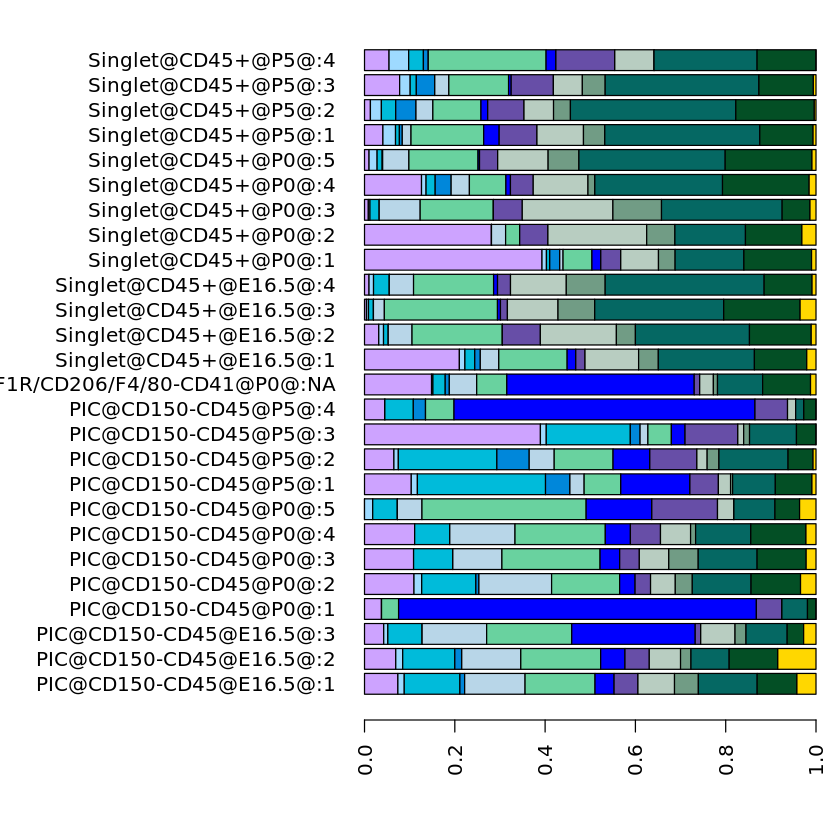

In [52]:
im_n = im_dist / rowSums(im_dist)
par(mar = c(5,15,1,1))
barplot(t(im_n), horiz = T, col = name2color[ colnames(im_n)], las = 2)

In [53]:
summarize.table(table(comb[ good_pics], parser_im[ good_pics]))

Basophils Dendritic cells
PIC@CD150-CD45@E16.5@:1           12         15            
PIC@CD150-CD45@E16.5@:2           11          7            
PIC@CD150-CD45@E16.5@:3            9          4            
PIC@CD150-CD45@P0@:1               0          3            
PIC@CD150-CD45@P0@:2              10         10            
PIC@CD150-CD45@P0@:3               1          2            
PIC@CD150-CD45@P0@:4               2          6            
PIC@CD150-CD45@P0@:5               2          8            
PIC@CD150-CD45@P5@:1               2         14            
PIC@CD150-CD45@P5@:2               2         32            
PIC@CD150-CD45@P5@:3               0         27            
PIC@CD150-CD45@P5@:4               0          8            
PIC@CSF1R/CD206/F4/80-CD41@P0@:NA  4          4            
total                             55        140            
                                  Elane+ Ms4a3+ immature neutrophils
PIC@CD150-CD45@E16.5@:1            23                               
PIC@CD150-CD45@E16.5@:2             9                               
PIC@CD150-CD45@E16.5@:3            25                               
PIC@CD150-CD45@P0@:1                0                               
PIC@CD150-CD45@P0@:2               16                               
PIC@CD150-CD45@P0@:3                3                               
PIC@CD150-CD45@P0@:4                6                               
PIC@CD150-CD45@P0@:5                2                               
PIC@CD150-CD45@P5@:1                6                               
PIC@CD150-CD45@P5@:2                7                               
PIC@CD150-CD45@P5@:3                3                               
PIC@CD150-CD45@P5@:4                2                               
PIC@CSF1R/CD206/F4/80-CD41@P0@:NA  10                               
total                             112                               
                                  Fcnb+ neutrophils Kupffer cells
PIC@CD150-CD45@E16.5@:1           15                 12          
PIC@CD150-CD45@E16.5@:2            3                  7          
PIC@CD150-CD45@E16.5@:3            8                 90          
PIC@CD150-CD45@P0@:1               0                 42          
PIC@CD150-CD45@P0@:2              11                 10          
PIC@CD150-CD45@P0@:3               3                  2          
PIC@CD150-CD45@P0@:4               1                  5          
PIC@CD150-CD45@P0@:5               0                  8          
PIC@CD150-CD45@P5@:1               1                 34          
PIC@CD150-CD45@P5@:2               8                 25          
PIC@CD150-CD45@P5@:3               3                  7          
PIC@CD150-CD45@P5@:4               0                 74          
PIC@CSF1R/CD206/F4/80-CD41@P0@:NA  3                137          
total                             56                453          
                                  Mmp8 low Retnlg low Fcnb+ neutrophils
PIC@CD150-CD45@E16.5@:1            37                                  
PIC@CD150-CD45@E16.5@:2            11                                  
PIC@CD150-CD45@E16.5@:3            30                                  
PIC@CD150-CD45@P0@:1                3                                  
PIC@CD150-CD45@P0@:2               38                                  
PIC@CD150-CD45@P0@:3                6                                  
PIC@CD150-CD45@P0@:4               11                                  
PIC@CD150-CD45@P0@:5                5                                  
PIC@CD150-CD45@P5@:1               21                                  
PIC@CD150-CD45@P5@:2               47                                  
PIC@CD150-CD45@P5@:3               24                                  
PIC@CD150-CD45@P5@:4                2                                  
PIC@CSF1R/CD206/F4/80-CD41@P0@:NA  33                                  
total                             268                                  
                             

In [54]:
samp2gate = factor(vecsplit(rownames(im_dist), "@", 2), levels = c("CD45+", "CD150-CD45", "CSF1R/CD206/F4/80-CD41"))
samp2tp = vecsplit(rownames(im_dist), "@", 3)
samp2pic = factor(vecsplit(rownames(im_dist), "@", 1), levels = c("Singlet", "PIC"))
table(samp2gate, samp2tp)

                        samp2tp
samp2gate                E16.5 P0 P5
  CD45+                      4  5  4
  CD150-CD45                 3  5  4
  CSF1R/CD206/F4/80-CD41     0  1  0

In [55]:
table(comb[ good_pics])


          PIC@CD150-CD45@E16.5@:1           PIC@CD150-CD45@E16.5@:2 
                              284                               130 
          PIC@CD150-CD45@E16.5@:3              PIC@CD150-CD45@P0@:1 
                              329                                53 
             PIC@CD150-CD45@P0@:2              PIC@CD150-CD45@P0@:3 
                              292                                46 
             PIC@CD150-CD45@P0@:4              PIC@CD150-CD45@P0@:5 
                               90                                55 
             PIC@CD150-CD45@P5@:1              PIC@CD150-CD45@P5@:2 
                              222                               307 
             PIC@CD150-CD45@P5@:3              PIC@CD150-CD45@P5@:4 
                              231                               111 
PIC@CSF1R/CD206/F4/80-CD41@P0@:NA 
                              330 

In [57]:
library(scales)

Warning message:
“package ‘scales’ was built under R version 4.2.3”


E16.5

P0



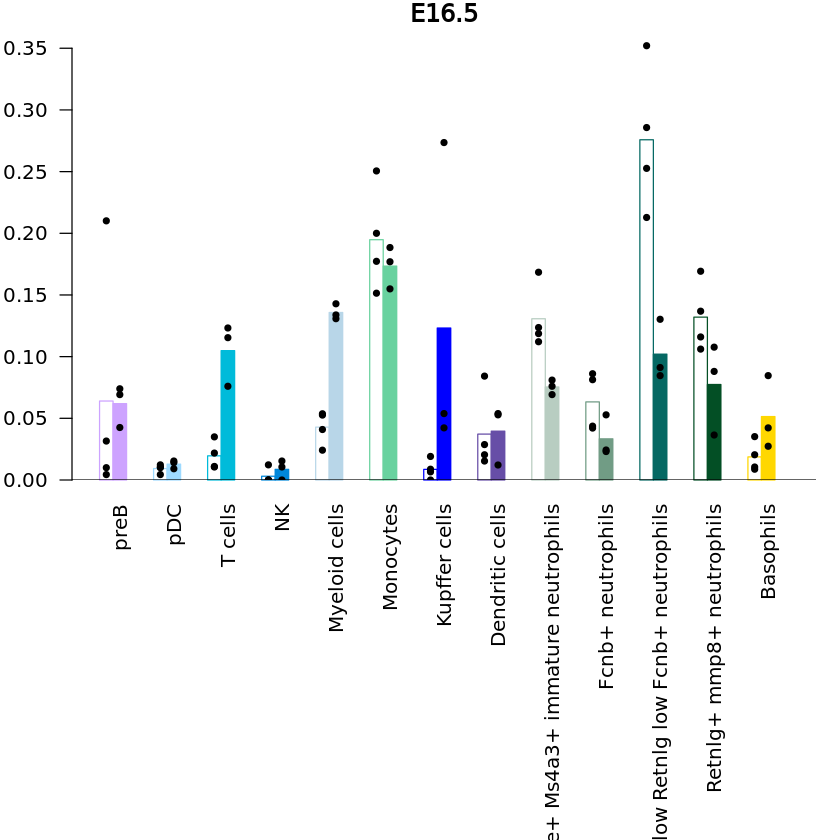

P5



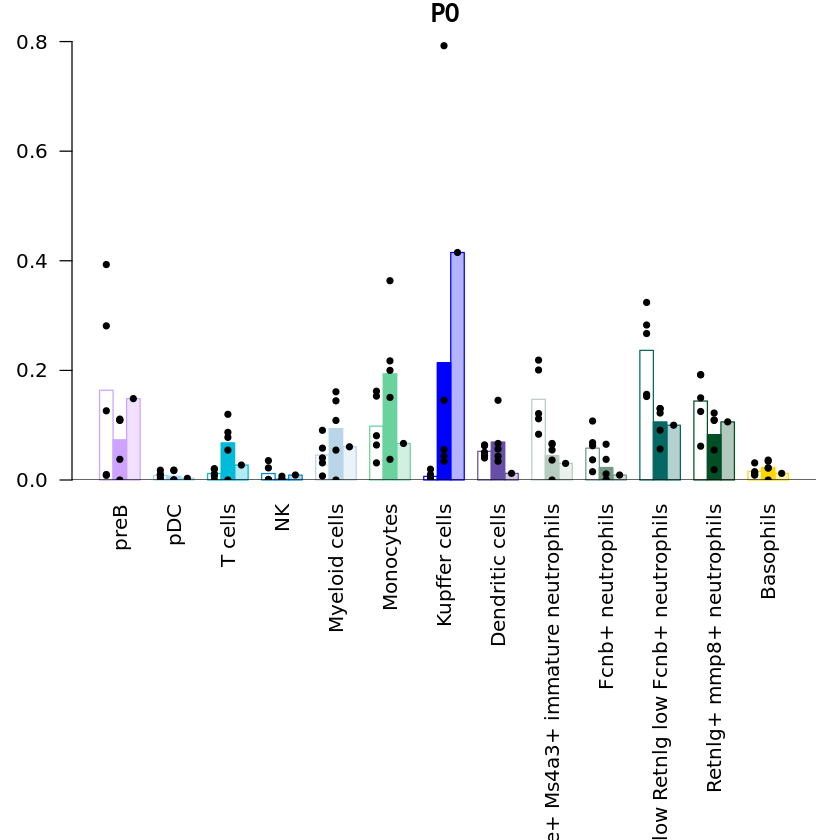

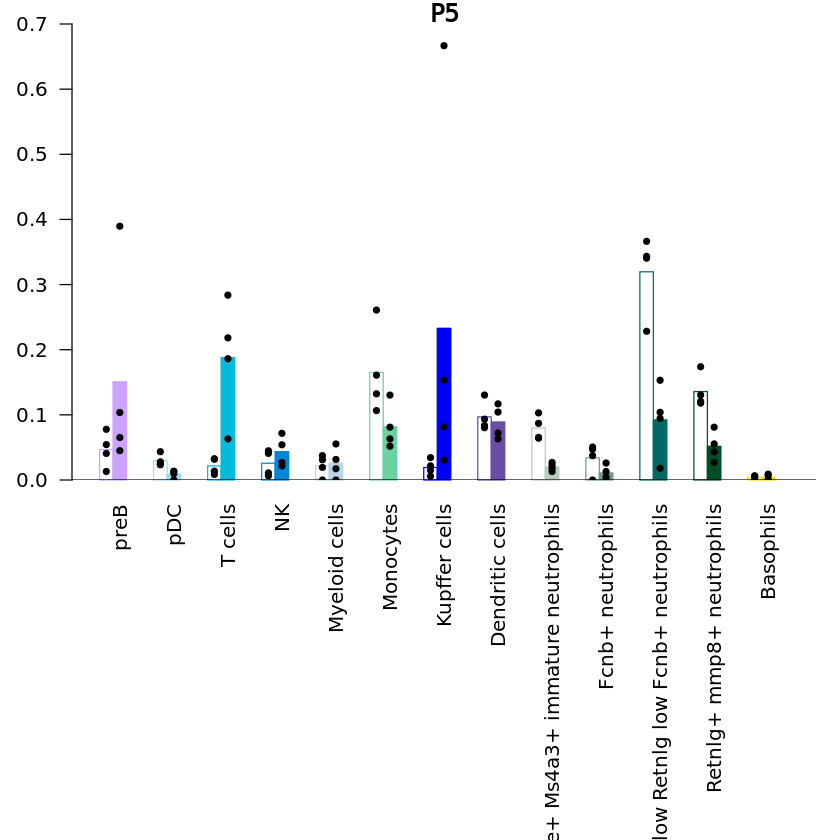

In [58]:

for (tp in names(table(samp2tp))) {
    message(tp)
    sub_n = im_n[ samp2tp == tp,]
    mean_vals = apply(sub_n, 2, tapply, samp2gate[ rownames(sub_n)], mean)
    par(mar = c(15,3,1,1))
    coords = barplot(mean_vals, beside = T, las = 2, ylim = c(0, max(sub_n) * 1.05), main = tp,
        border = rep(name2color[ colnames(mean_vals)], each = 3), col = rbind("white", name2color[ colnames(mean_vals)], alpha(name2color[ colnames(mean_vals)], 0.3)))
    dimnames(coords) = dimnames(mean_vals)
    sub_melt = melt(sub_n)
    points(coords[cbind(as.vector(samp2gate[as.vector(sub_melt$Var1)]), as.vector(sub_melt$Var2))], sub_melt$value, pch = 20)
    abline(h = 0)    
}


In [59]:
table(samp2gate, samp2tp)
samp2comb = paste0(samp2tp, "@", samp2gate)
names(samp2comb) = names(samp2gate)
table(samp2comb)

                        samp2tp
samp2gate                E16.5 P0 P5
  CD45+                      4  5  4
  CD150-CD45                 3  5  4
  CSF1R/CD206/F4/80-CD41     0  1  0

samp2comb
         E16.5@CD150-CD45               E16.5@CD45+             P0@CD150-CD45 
                        3                         4                         5 
                 P0@CD45+ P0@CSF1R/CD206/F4/80-CD41             P5@CD150-CD45 
                        5                         1                         4 
                 P5@CD45+ 
                        4 

pdf 
  2

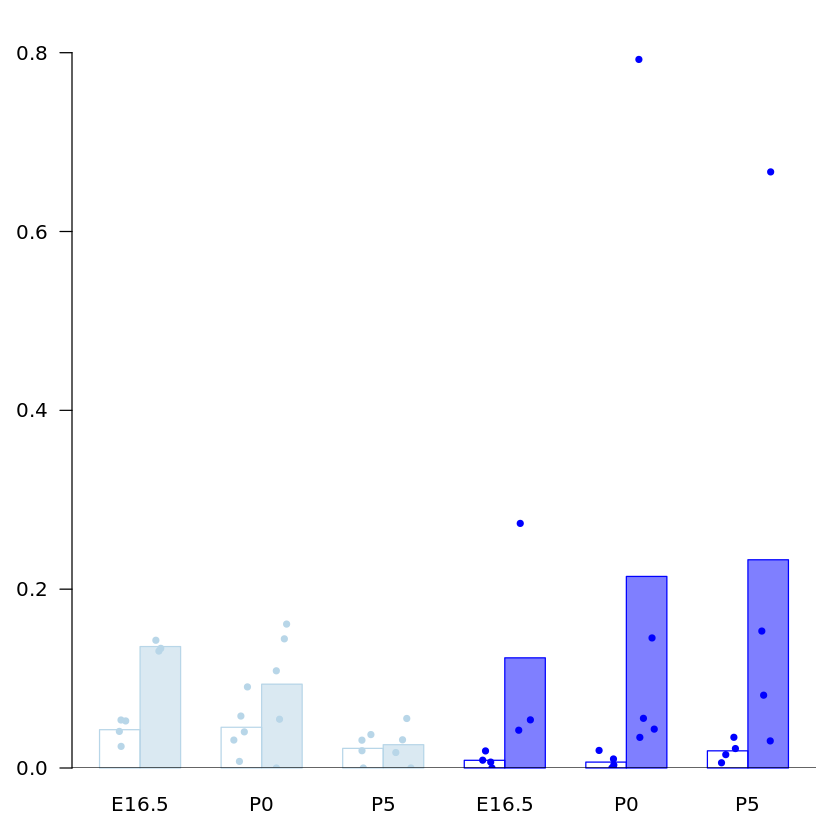

In [60]:
pops = c("Myeloid cells", "Kupffer cells")
sub_n = im_n[ samp2gate[ rownames(im_n)] %in% c("CD45+", "CD150-CD45"), colnames(im_n) %in% pops]
sub_melt = melt(sub_n)
sub_melt$pic = samp2pic[ as.vector(sub_melt$Var1)]
sub_melt$tp = samp2tp[ as.vector(sub_melt$Var1)]
#sub_melt$int = with(sub_melt, interaction(pic, factor(Var2, levels = intersect(lin_ord, pops)), sep = "@"))
sub_melt$int = with(sub_melt, interaction(tp, factor(Var2, levels = intersect(lin_ord, pops)), sep = "@"))
mean_vals = with(sub_melt, tapply(value, list(pic, int), mean))
mean_melt = melt(mean_vals)
mean_melt$col = with(mean_melt, ifelse(Var1 == "Singlet", "white", 
            alpha(name2color[ vecsplit(as.vector(Var2), "@", 2)], 0.5)))

p = function() {
    par(mar = c(3,3,1,1))
    head(sub_melt)
    coords = barplot(mean_vals, beside = T, las = 1, ylim = c(0, max(sub_n) * 1.05),
        border = rep(name2color[ vecsplit(colnames(mean_vals), "@", 2)], each = 2), 
        col = mean_melt$col, names.arg = vecsplit(colnames(mean_vals), "@", 1))
    dimnames(coords) = dimnames(mean_vals)
    with(sub_melt, points(runif(nrow(sub_melt), -0.2, 0.2) + coords[cbind(as.vector(pic), as.vector(int))], value, col = name2color[ as.vector(Var2)], pch = 20))
    abline(h = 0)    

}

p()
pdf(paste0(outdir, "/myeloid_cells_dist.pdf"), height = 5, width = 7, useDingbats = F)
p()
dev.off()

In [1]:
head(mean_vals)

ERROR: Error in head(mean_vals): object 'mean_vals' not found


In [2]:
sub_melt$replicate = vecsplit(as.vector(sub_melt$Var1), "@", 3:4)

p2 = function(pop) {
    coords = barplot(mean_vals, beside = T, las = 1, ylim = c(0, 
        max(sub_n) * 1.05), 
        border = rep(name2color[vecsplit(colnames(mean_vals), "@", 2)], each = 2), 
        col = "white", 
        names.arg = vecsplit(colnames(mean_vals), "@", 1))
    dimnames(coords) = dimnames(mean_vals)
    abline(h = 0)
    sub_melt$x = with(sub_melt, runif(nrow(sub_melt), -0.2, 0.2) + 
        coords[cbind(as.vector(pic), as.vector(int))])
    paired_melt = merge(sub_melt, sub_melt, by.x = c("int", "replicate"), 
        by.y = c("int", "replicate"))
    with(paired_melt, segments(x.x, value.x, x.y, value.y, col = "black", #name2color[as.vector(Var2.x)], 
        lwd = 2))
    with(sub_melt, points(x, value, bg = name2color[as.vector(Var2)], lwd = 1,
        pch = 21 + 2 * (pic == "PIC"), cex = 2))
}

par(lwd = 2)
p2()
pdf(paste0(outdir, "/myeloid_cells_dist_paired.pdf"), height = 5, width = 7, useDingbats = F)
p2()
dev.off()

ERROR: Error in vecsplit(as.vector(sub_melt$Var1), "@", 3:4): could not find function "vecsplit"


In [103]:
paired_melt = merge(sub_melt, sub_melt, by.x = c("int", "replicate"), 
    by.y = c("int", "replicate"))

#table(as.vector(paired_melt$Var1.x) != as.vector(paired_melt$paired_melt$Var1.y))
paired_melt = paired_melt[ paired_melt$pic.x == "Singlet" & paired_melt$pic.y == "PIC",]
table(paired_melt$int)

ints = names(table(paired_melt$Var2.x))

pvals = sapply(ints, function(x) with(paired_melt[ paired_melt$Var2.x == x,], wilcox.test(value.x, value.y, paired = T)$p.value))
sort(pvals)


E16.5@Myeloid cells    P0@Myeloid cells    P5@Myeloid cells E16.5@Kupffer cells 
                  3                   5                   4                   3 
   P0@Kupffer cells    P5@Kupffer cells 
                  5                   4 

Warning message in wilcox.test.default(value.x, value.y, paired = T):
“cannot compute exact p-value with zeroes”


Kupffer cells Myeloid cells 
 0.0004882813  0.0233763900

In [101]:
head(paired_melt)

int                 replicate Var1.x                 Var2.x       
3  E16.5@Kupffer cells E16.5@:1  Singlet@CD45+@E16.5@:1 Kupffer cells
7  E16.5@Kupffer cells E16.5@:2  Singlet@CD45+@E16.5@:2 Kupffer cells
11 E16.5@Kupffer cells E16.5@:3  Singlet@CD45+@E16.5@:3 Kupffer cells
16 E16.5@Myeloid cells E16.5@:1  Singlet@CD45+@E16.5@:1 Myeloid cells
20 E16.5@Myeloid cells E16.5@:2  Singlet@CD45+@E16.5@:2 Myeloid cells
24 E16.5@Myeloid cells E16.5@:3  Singlet@CD45+@E16.5@:3 Myeloid cells
   value.x     pic.x   tp.x  Var1.y                  Var2.y        value.y   
3  0.019099591 Singlet E16.5 PIC@CD150-CD45@E16.5@:1 Kupffer cells 0.04225352
7  0.000000000 Singlet E16.5 PIC@CD150-CD45@E16.5@:2 Kupffer cells 0.05384615
11 0.006593407 Singlet E16.5 PIC@CD150-CD45@E16.5@:3 Kupffer cells 0.27355623
16 0.040927694 Singlet E16.5 PIC@CD150-CD45@E16.5@:1 Myeloid cells 0.13380282
20 0.052631579 Singlet E16.5 PIC@CD150-CD45@E16.5@:2 Myeloid cells 0.13076923
24 0.024175824 Singlet E16.5 PIC@CD150-CD45@E16.5@:3 Myeloid cells 0.14285714
   pic.y tp.y 
3  PIC   E16.5
7  PIC   E16.5
11 PIC   E16.5
16 PIC   E16.5
20 PIC   E16.5
24 PIC   E16.5

samp2gate[ rownames(sub_dist)]
mean_vals = apply(sub_n, 2, tapply, samp2gate[ rownames(sub_dist)], mean)


In [179]:
ni_dist = rbind(table(comb[good_pics], factor(parser_ni[good_pics], levels = lin_ord)),
	table(comb[ni_cells], factor(sin_names[ni_cells], levels = lin_ord)))
ni_dist = ni_dist[, colSums(ni_dist) > 0]
#ni_dist = ni_dist[,intersect(lin_ord, colnames(ni_dist))]
ni_dist = ni_dist[ rowSums(ni_dist) > 20,]
ni_dist
#t_dist = t_dist[ order(factor(vecsplit(rownames(t_dist), "\\.", 2), levels = c("helminths", "PBS")),
#        factor(vecsplit(rownames(t_dist),"\\.", 1), levels = c("Trbc+", "Cd11c+", "doublets",  "Ag+ Cd11c+", "Ag+ doublets"))),]

Erythroid progenitors Erythroid cells
PIC@CD150-CD45@E16.5@:1            92                    32            
PIC@CD150-CD45@E16.5@:2            39                     5            
PIC@CD150-CD45@E16.5@:3           164                    13            
PIC@CD150-CD45@P0@:1                2                     1            
PIC@CD150-CD45@P0@:2               78                    10            
PIC@CD150-CD45@P0@:3               24                     1            
PIC@CD150-CD45@P0@:4               30                     1            
PIC@CD150-CD45@P0@:5                3                     4            
PIC@CD150-CD45@P5@:1               57                     6            
PIC@CD150-CD45@P5@:2               50                     4            
PIC@CD150-CD45@P5@:3               80                    14            
PIC@CD150-CD45@P5@:4               10                     5            
PIC@CSF1R/CD206/F4/80-CD41@P0@:NA   4                     8            
Singlet@CD150@E16.5@:1             97                     4            
Singlet@CD150@E16.5@:2            301                    68            
Singlet@CD150@E16.5@:3            170                    18            
Singlet@CD150@E16.5@:4            715                    70            
Singlet@CD150@P0@:1               184                     2            
Singlet@CD150@P0@:2                58                     6            
Singlet@CD150@P0@:3               357                    25            
Singlet@CD150@P0@:4                63                     4            
Singlet@CD150@P5@:1               103                    30            
Singlet@CD150@P5@:2               184                    13            
Singlet@CD150@P5@:3               414                   102            
Singlet@CD150@P5@:4                12                    13            
Singlet@CD45-@E16.5@:1              9                   118            
Singlet@CD45-@E16.5@:NA            95                   513            
Singlet@CD45-@P0@:1                 4                     9            
Singlet@CD45-@P0@:4                62                   102            
Singlet@CD45-@P0@:NA               52                    66            
Singlet@CD45-@P5@:2                 5                   102            
Singlet@CD45-@P5@:NA                0                     1            
Singlet@CD45+@E16.5@:1             21                     1            
Singlet@CD45+@P0@:1                17                     0            
Singlet@CD45+@P0@:4                 1                     2            
                                  Erythrocytes Megakaryocyte progenitors
PIC@CD150-CD45@E16.5@:1            30           64                      
PIC@CD150-CD45@E16.5@:2             5           60                      
PIC@CD150-CD45@E16.5@:3            10          128                      
PIC@CD150-CD45@P0@:1               21            4                      
PIC@CD150-CD45@P0@:2               31           96                      
PIC@CD150-CD45@P0@:3                4            9                      
PIC@CD150-CD45@P0@:4                5           26                      
PIC@CD150-CD45@P0@:5               11           13                      
PIC@CD150-CD45@P5@:1                7           43                      
PIC@CD150-CD45@P5@:2                9          121                      
PIC@CD150-CD45@P5@:3               26           56                      
PIC@CD150-CD45@P5@:4               26            9                      
PIC@CSF1R/CD206/F4/80-CD41@P0@:NA  24           58                      
Singlet@CD150@E16.5@:1              0           36                      
Singlet@CD150@E16.5@:2             20           33                      
Singlet@CD150@E16.5@:3             17           15                      
Singlet@CD150@E16.5@:4              4           17                      
Singlet@CD150@P0@:1                 0          148                      
Singlet@CD150@P0@:2                 6           46     

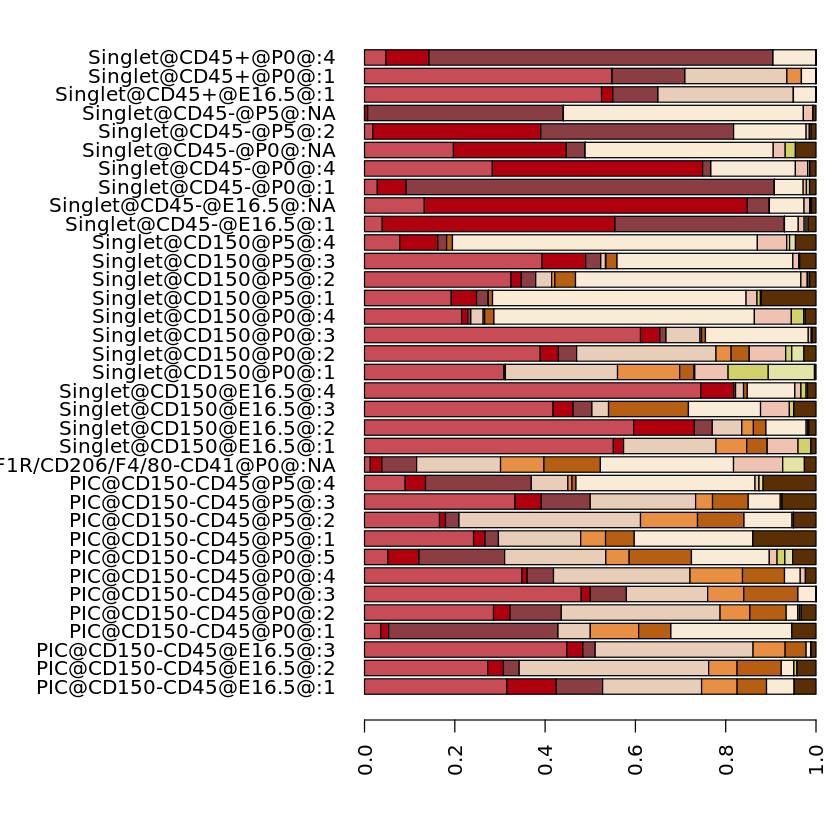

In [180]:
ni_n = ni_dist / rowSums(ni_dist)
par(mar = c(5,15,1,1))
barplot(t(ni_n), horiz = T, col = name2color[ colnames(ni_n)], las = 2)

In [181]:
samp2gate = factor(vecsplit(rownames(ni_dist), "@", 2), levels = c("CD45-", "CD150", "CD150-CD45", "CSF1R/CD206/F4/80-CD41"))
samp2tp = vecsplit(rownames(ni_dist), "@", 3)
samp2pic = factor(vecsplit(rownames(ni_dist), "@", 1), levels = c("Singlet", "PIC"))
table(samp2gate, samp2tp)

                        samp2tp
samp2gate                E16.5 P0 P5
  CD45-                      2  3  2
  CD150                      4  4  4
  CD150-CD45                 3  5  4
  CSF1R/CD206/F4/80-CD41     0  1  0

E16.5

P0



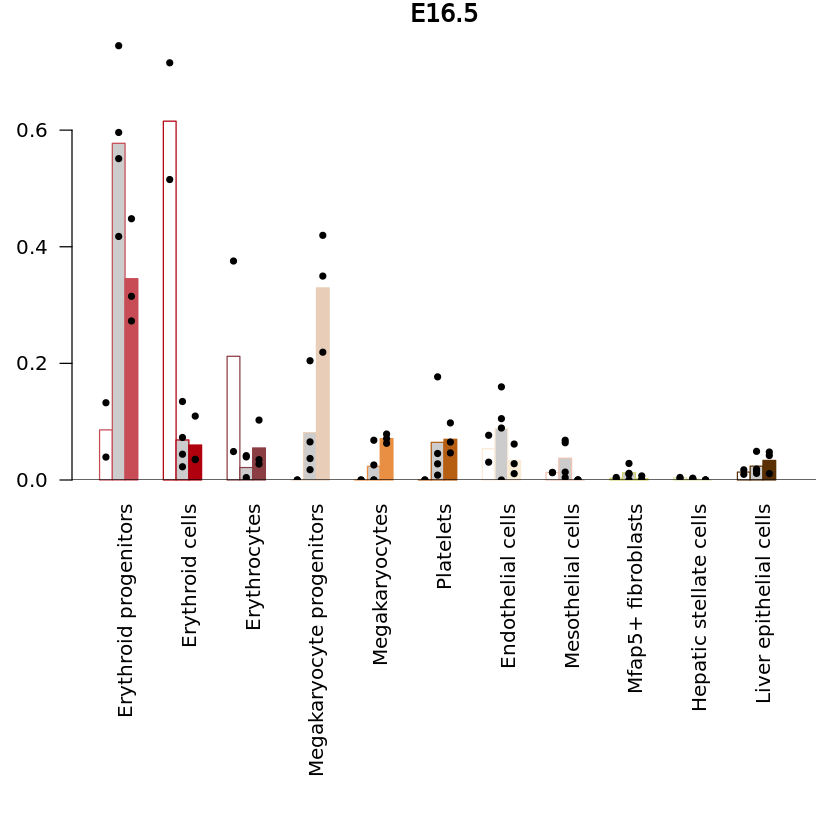

P5



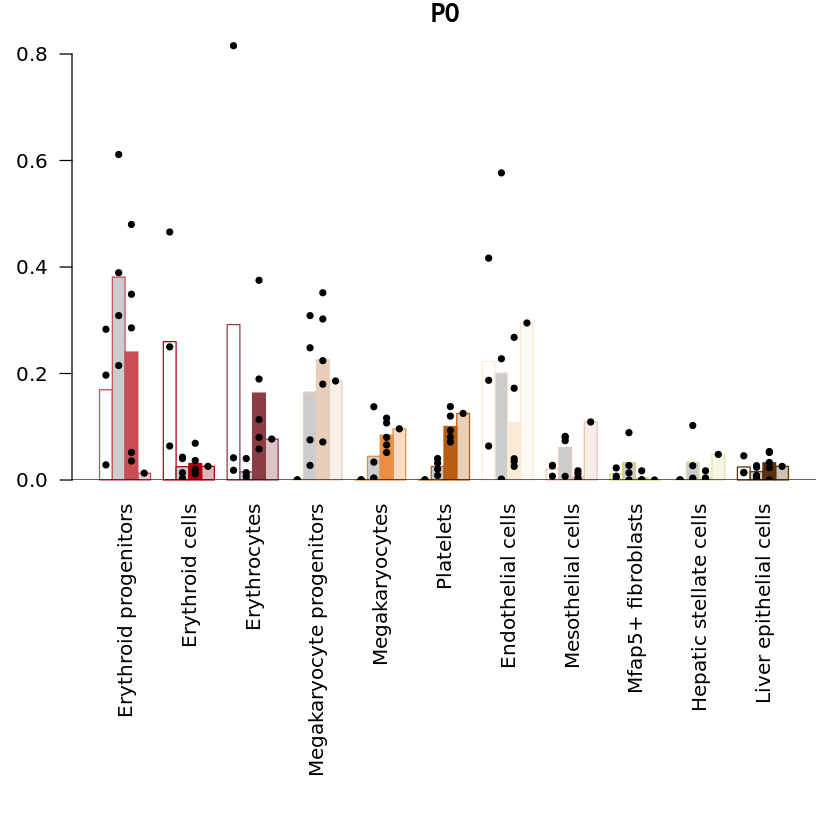

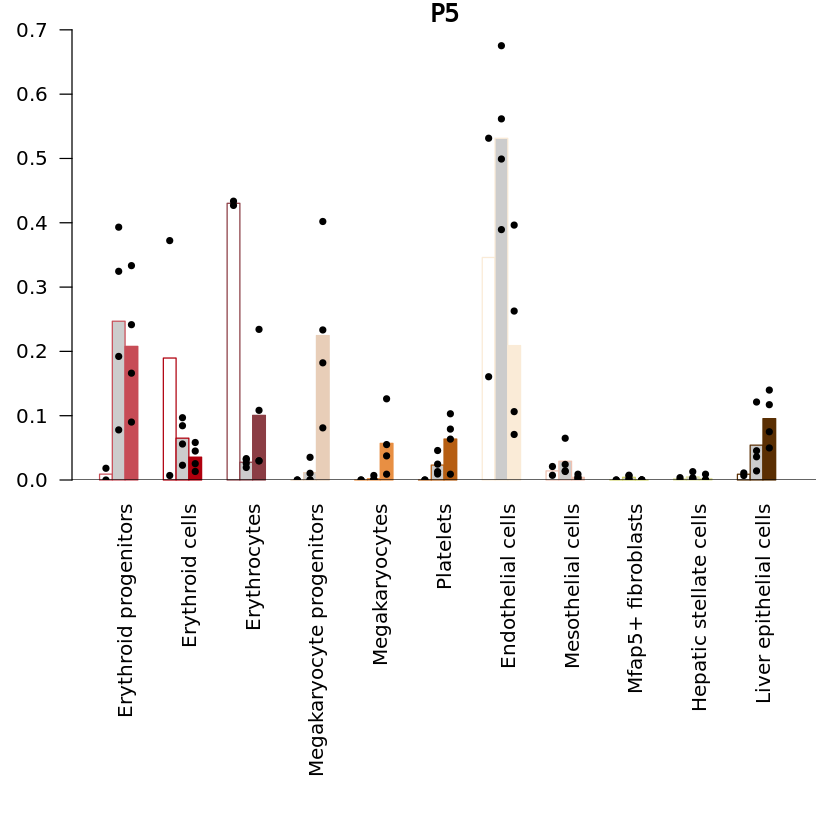

In [182]:

for (tp in names(table(samp2tp))) {
    message(tp)
    sub_n = ni_n[ samp2tp == tp,]
    mean_vals = apply(sub_n, 2, tapply, samp2gate[ rownames(sub_n)], mean)
    par(mar = c(15,3,1,1))
    coords = barplot(mean_vals, beside = T, las = 2, ylim = c(0, max(sub_n) * 1.05), main = tp,
        border = rep(name2color[ colnames(mean_vals)], each = 4), col = rbind("white", "gray80", name2color[ colnames(mean_vals)], alpha(name2color[ colnames(mean_vals)], 0.3)))
    dimnames(coords) = dimnames(mean_vals)
    sub_melt = melt(sub_n)
    points(coords[cbind(as.vector(samp2gate[as.vector(sub_melt$Var1)]), as.vector(sub_melt$Var2))], sub_melt$value, pch = 20)
    abline(h = 0)    
}


pdf 
  2

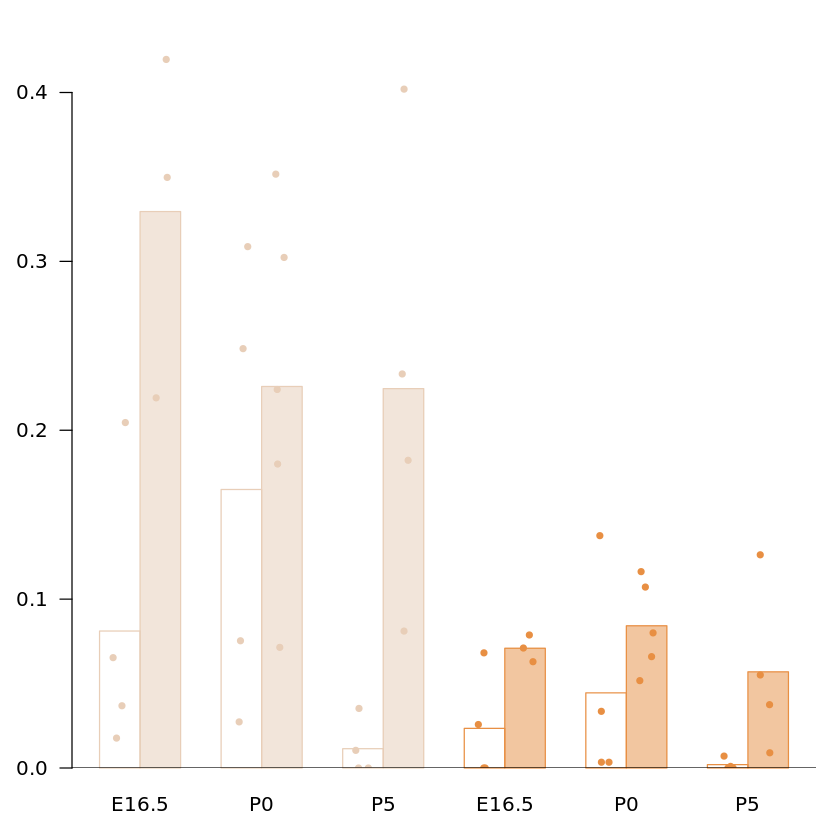

In [183]:
pops = c('Megakaryocyte progenitors','Megakaryocytes')
sub_n = ni_n[ samp2gate[ rownames(ni_n)] %in% c("CD150-CD45", "CD150"), colnames(ni_n) %in% pops]
sub_melt = melt(sub_n)
sub_melt$pic = samp2pic[ as.vector(sub_melt$Var1)]
sub_melt$tp = samp2tp[ as.vector(sub_melt$Var1)]
#sub_melt$int = with(sub_melt, interaction(pic, factor(Var2, levels = intersect(lin_ord, pops)), sep = "@"))
sub_melt$int = with(sub_melt, interaction(tp, factor(Var2, levels = intersect(lin_ord, pops)), sep = "@"))
mean_vals = with(sub_melt, tapply(value, list(pic, int), mean))
mean_melt = melt(mean_vals)
mean_melt$col = with(mean_melt, ifelse(Var1 == "Singlet", "white", 
            alpha(name2color[ vecsplit(as.vector(Var2), "@", 2)], 0.5)))

p = function() {
    par(mar = c(3,3,1,1))
    head(sub_melt)
    coords = barplot(mean_vals, beside = T, las = 1, ylim = c(0, max(sub_n) * 1.05),
        border = rep(name2color[ vecsplit(colnames(mean_vals), "@", 2)], each = 2), 
        col = mean_melt$col, names.arg = vecsplit(colnames(mean_vals), "@", 1))
    dimnames(coords) = dimnames(mean_vals)
    with(sub_melt, points(runif(nrow(sub_melt), -0.2, 0.2) + coords[cbind(as.vector(pic), as.vector(int))], value, col = name2color[ as.vector(Var2)], pch = 20))
    abline(h = 0)    
}
p()
pdf(paste0(outdir, "/mk_cells_dist.pdf"), height = 5, width = 7, useDingbats = F)
p()
dev.off()

pdf 
  2

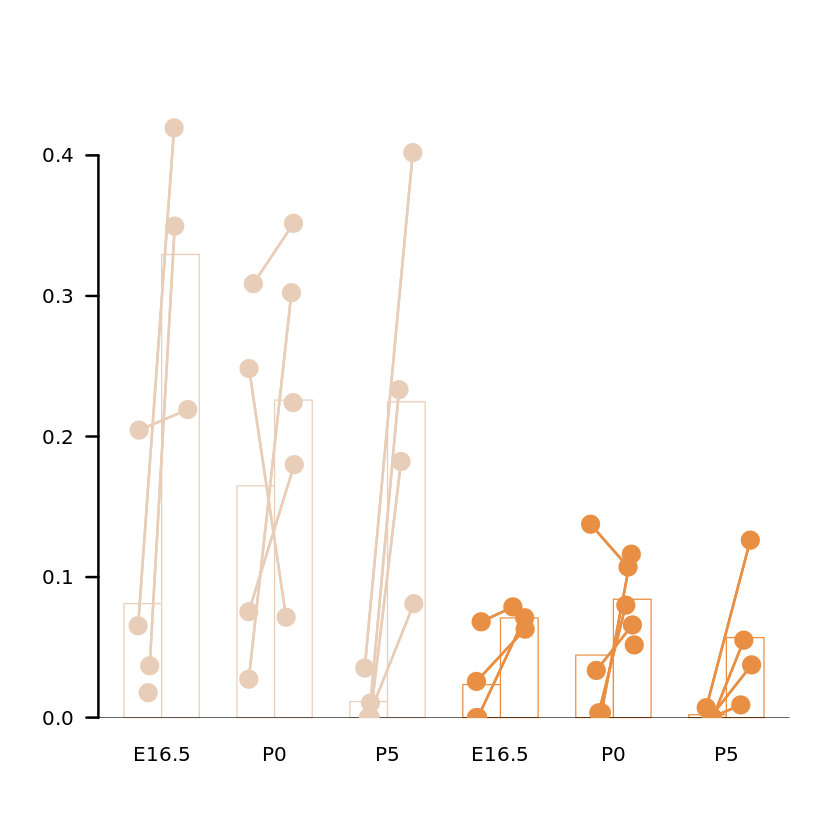

In [184]:
p2 = function() {
    sub_melt$replicate = vecsplit(as.vector(sub_melt$Var1), "@", 
        3:4)
    coords = barplot(mean_vals, beside = T, las = 1, ylim = c(0, 
        max(sub_n) * 1.05), border = rep(name2color[vecsplit(colnames(mean_vals), 
        "@", 2)], each = 2), lwd = 2, col = "white", names.arg = vecsplit(colnames(mean_vals), 
        "@", 1))
    dimnames(coords) = dimnames(mean_vals)
    abline(h = 0)
    sub_melt$x = with(sub_melt, runif(nrow(sub_melt), -0.2, 0.2) + 
        coords[cbind(as.vector(pic), as.vector(int))])
    paired_melt = merge(sub_melt, sub_melt, by.x = c("int", "replicate"), 
        by.y = c("int", "replicate"))
    with(paired_melt, segments(x.x, value.x, x.y, value.y, col = name2color[as.vector(Var2.x)], 
        lwd = 2))
    with(sub_melt, points(x, value, col = name2color[as.vector(Var2)], 
        pch = 20, cex = 3))
}

p2()
pdf(paste0(outdir, "/mk_cells_dist_paired.pdf"), height = 5, width = 7, useDingbats = F)
p2()
dev.off()

In [185]:
length(good_pics)
joint_dist = table(comb[ good_pics], factor(parser_im[ good_pics], levels = im_pops), 
                   factor(parser_ni[ good_pics], levels = ni_pops))
dim(joint_dist)
joint_dist[1,,]

[1] 2524

[1] 13 13 11

                                       
                                        Erythroid progenitors Erythroid cells
  preB                                                      5               1
  pDC                                                       1               0
  T cells                                                   6               5
  NK                                                        2               0
  Myeloid cells                                            13               5
  Monocytes                                                15               4
  Kupffer cells                                             9               0
  Dendritic cells                                           2               2
  Elane+ Ms4a3+ immature neutrophils                        9               3
  Fcnb+ neutrophils                                         6               3
  Mmp8 low Retnlg low Fcnb+ neutrophils                    14               5
  Retnlg+ mmp8+ neutroph

zlim: 0<>15

zlim: -2<>2

zlim: 0<>10

zlim: -2<>2

zlim: 0<>39

zlim: -2<>2

zlim: 0<>20

zlim: -2<>2



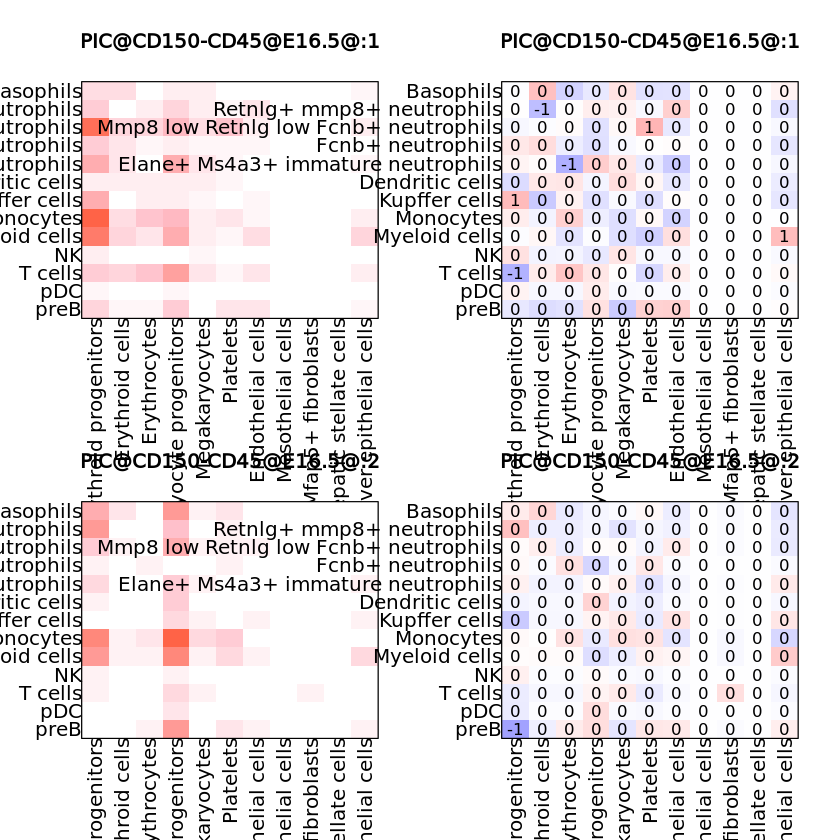

zlim: 0<>18

zlim: -2<>2

zlim: 0<>5

zlim: -2<>2



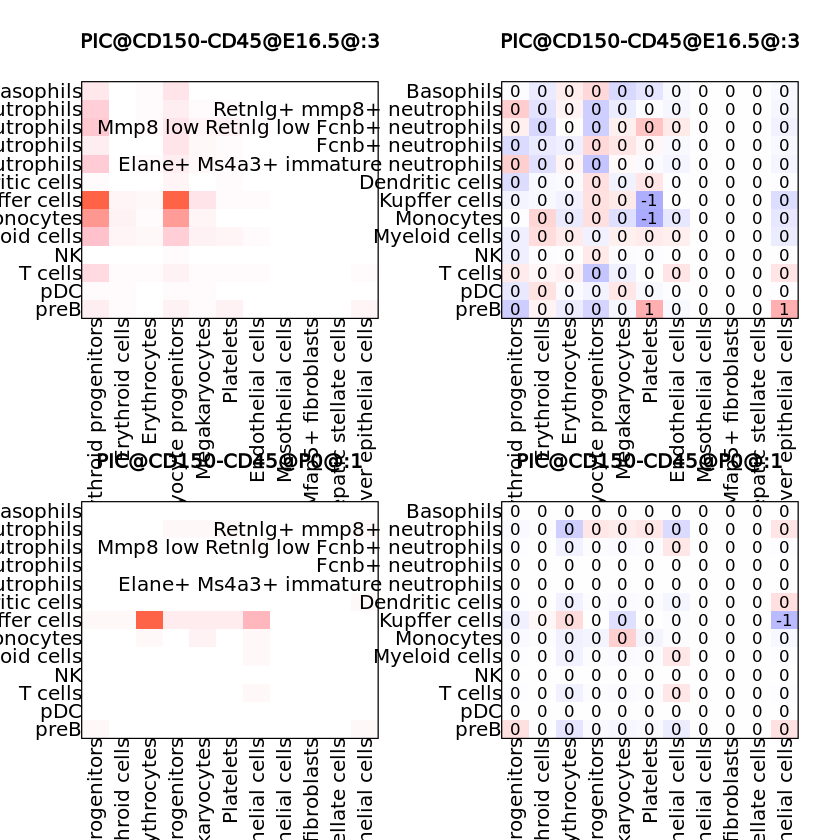

zlim: 0<>9

zlim: -2<>2

zlim: 0<>3

zlim: -2<>2



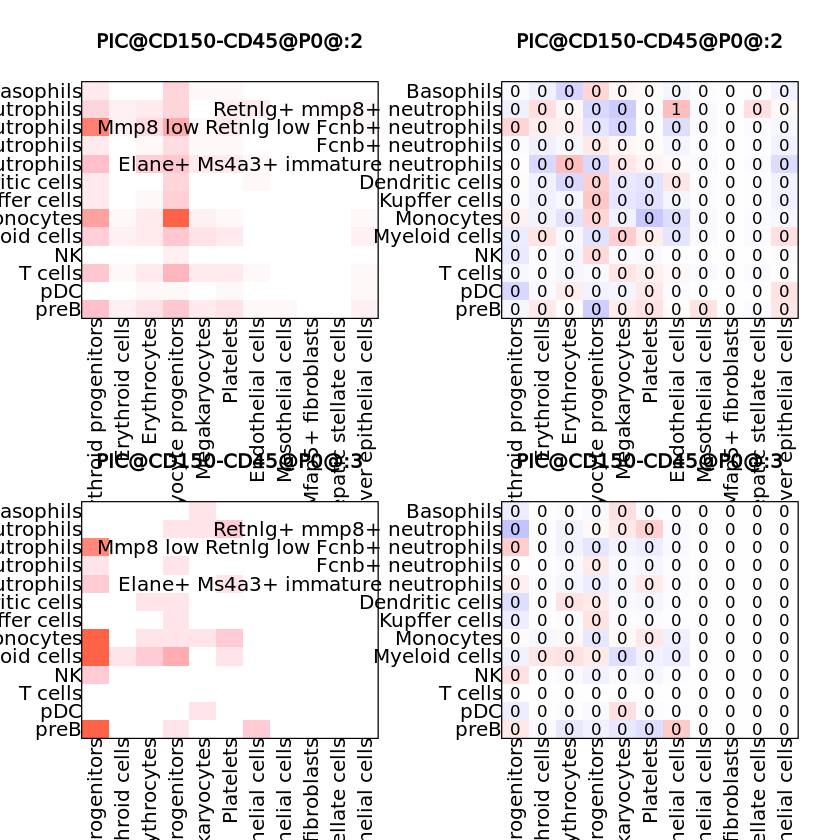

zlim: 0<>22

zlim: -2<>2

zlim: 0<>19

zlim: -2<>2



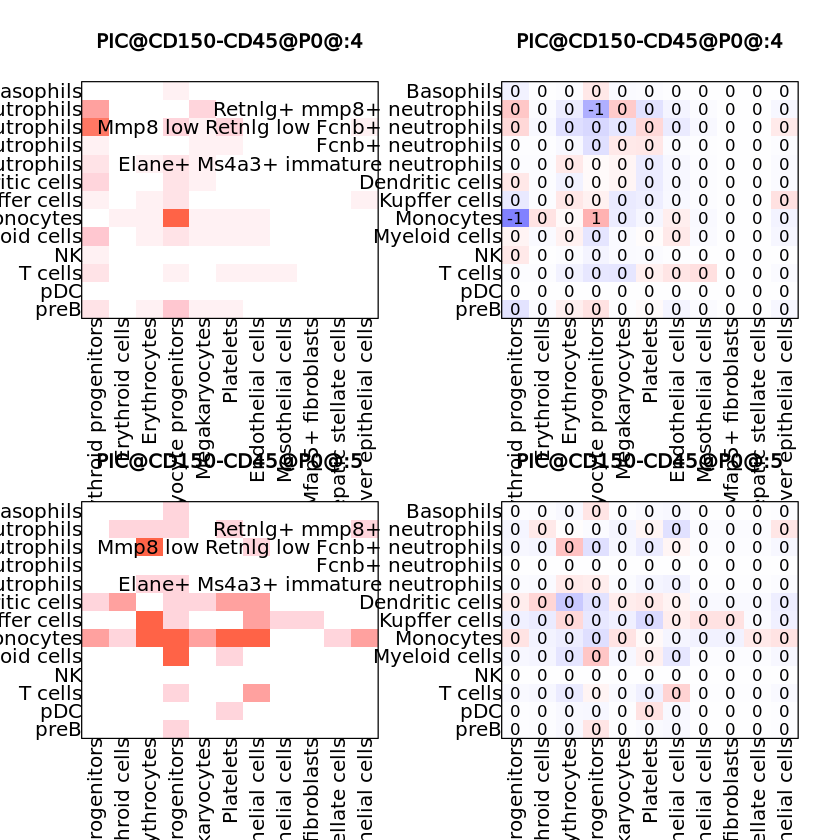

zlim: 0<>36

zlim: -2<>2

zlim: 0<>23

zlim: -2<>2



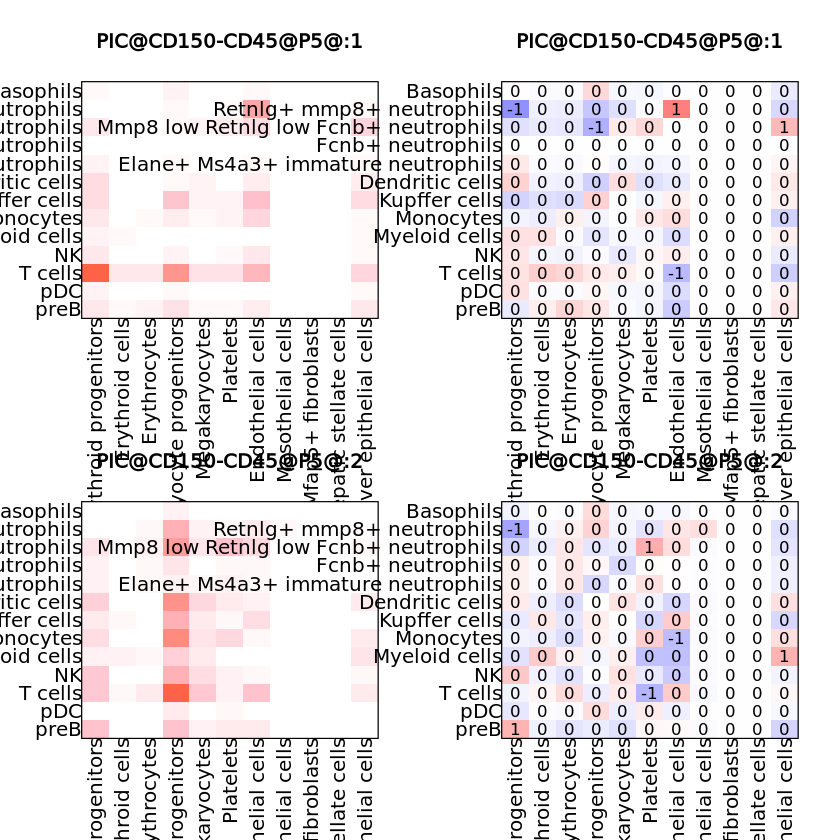

zlim: 0<>37

zlim: -2<>2



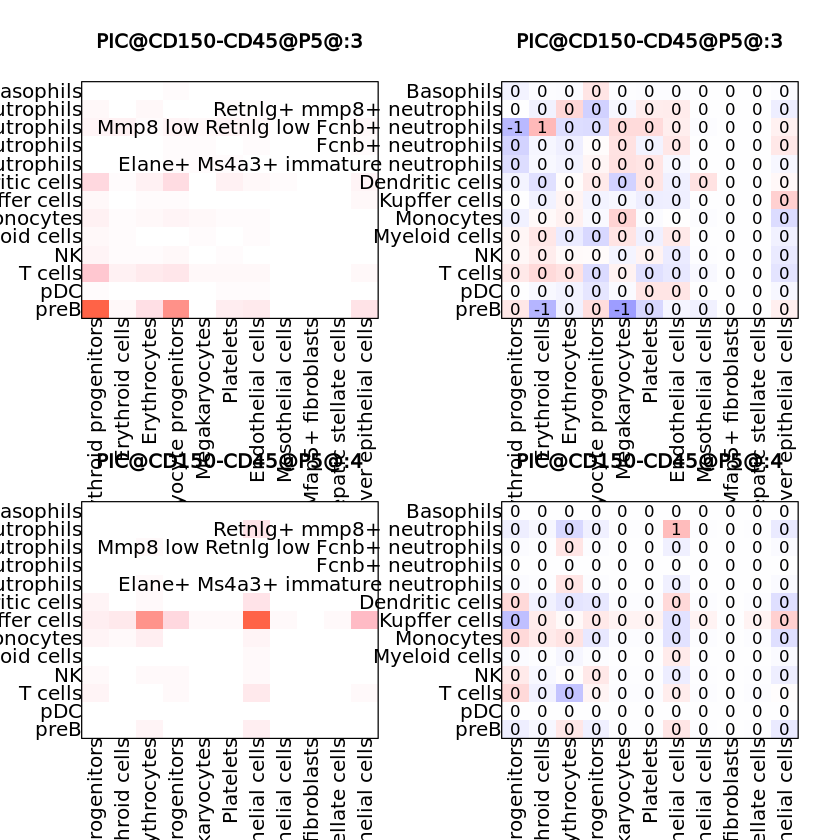

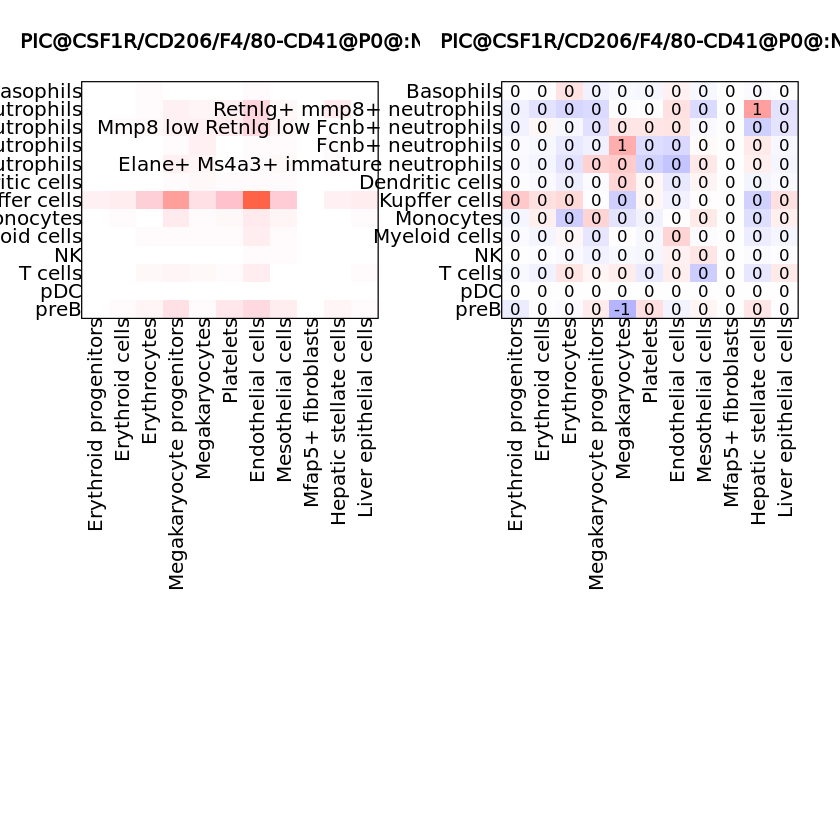

In [186]:
par(mfrow = c(2,2))
zlim = c(-2,2)
for (samp in rownames(joint_dist)) {
    obs = joint_dist[samp,,]
    image.2(obs, col = colorRampPalette(c("white", "pink", "tomato"))(1000)); box()
    title(samp)
    expt = outer(rowSums(obs), colSums(obs)) / sum(obs)
    IM = log2((5 + obs) / (5 + expt))
    image.2(IM, b = T, text = T, text_mat = round(IM), zlim = zlim); box()
    title(samp)
}

In [77]:
scr_chi_square_diff_genes

function (umis, MAP = NULL, g1 = NULL, g2 = NULL, pval, fdr = F) 
{
    if (is.null(MAP)) {
        MAP = c(rep(1, length(g1)), rep(2, length(g2)))
        names(MAP) = c(g1, g2)
    }
    cells = names(MAP)
    umis = umis[, cells]
    uniform_a = rowSums(umis)/sum(umis)
    exp_count = matrix(uniform_a, ncol = 1) %*% matrix(colSums(umis), 
        1)
    dimnames(exp_count) = dimnames(umis)
    ex = t(daply(.data = data.frame(cbind(V1 = MAP, t(exp_count)), 
        check.names = F), .(V1), colSums))[-1, ]
    obs = t(daply(.data = data.frame(cbind(V1 = MAP, t(umis)), 
        check.names = F), .(V1), colSums))[-1, ]
    x2 = rowSums(((obs - ex)^2)/ex)
    if (!fdr) {
        sig_genes = x2 > qchisq(1 - pval, df = length(unique(MAP)) - 
            1)
    }
    else {
        pvals = p.adjust(1 - pchisq(x2, df = length(unique(MAP)) - 
            1), "fdr")
        sig_genes = pvals < pval
    }
    sig_genes[is.na(sig_genes)] = F
    return(names(sig_genes)[sig_genes])
}

In [78]:
cells = union(im_cells, ni_cells)
sin_umis = read_large_umis(id, cells = cells)
dim(sin_umis)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.5 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.1 GiB”


[1] 33893 14209

In [79]:
sin_n = sweep(sin_umis, 2, colSums(sin_umis), "/") * 1000

In [80]:
m = t(apply(sin_n[ mle_features,], 1, tapply, ifelse(colnames(sin_n) %in% im_cells, "im", "ni"), mean))
dim(m)

[1] 359   2

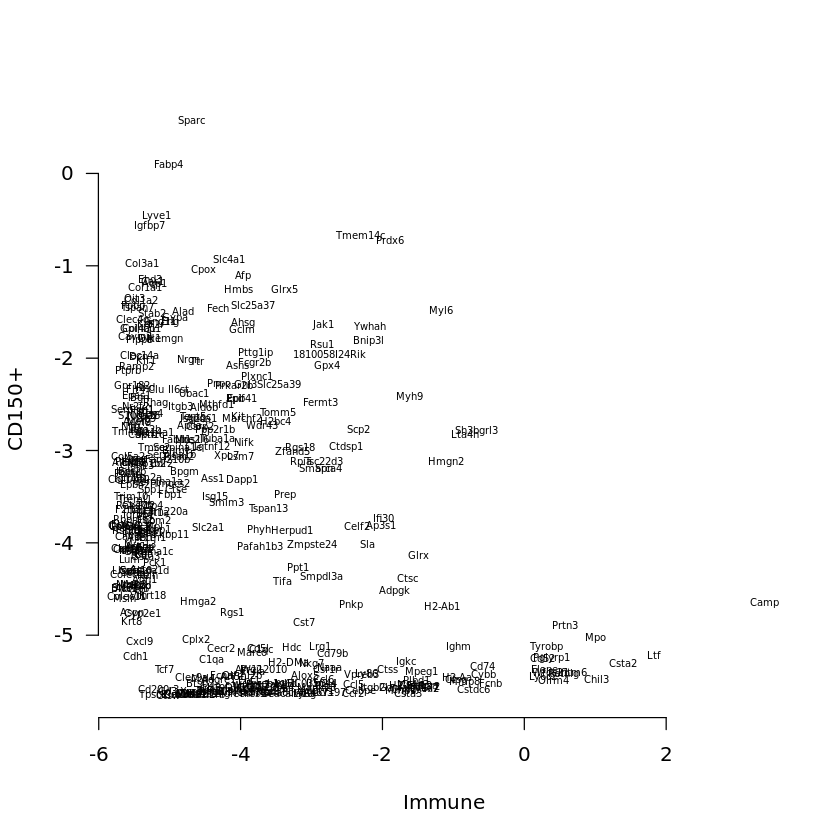

In [81]:
reg = 0.02
x = m[,"im"]; y = m[,"ni"]
lx = log2(reg + x); ly = (log2(reg + y))
plot.2(lx, ly, xlab = "Immune", ylab = "CD150+", text = T, cex = 0.5)

In [82]:
im_genes = names(which(lx > -4 & ly < -5))
ni_genes = names(which(ly > -4 & lx < -5))
length(im_genes)
length(ni_genes)

sort(im_genes)
sort(ni_genes)

[1] 82

[1] 99

[1] "AA467197" "Alox5"    "Asprv1"   "AW112010" "BC035044" "C1qc"    
 [7] "Ccl3"     "Ccl4"     "Ccl5"     "Ccl6"     "Ccr2"     "Cd177"   
[13] "Cd52"     "Cd5l"     "Cd7"      "Cd74"     "Cd79b"    "Ceacam10"
[19] "Cebpe"    "Chil1"    "Chil3"    "Clec12a"  "Cpa3"     "Csf1r"   
[25] "Csta2"    "Csta3"    "Cstdc6"   "Ctsg"     "Ctss"     "Cybb"    
[31] "Ebf1"     "Elane"    "Fcnb"     "Fcrla"    "Fpr2"     "Gzma"    
[37] "Gzmb"     "H2-Aa"    "H2-DMa"   "H2-Eb1"   "Hdc"      "Ifitm6"  
[43] "Ighm"     "Igkc"     "Igll1"    "Il1r2"    "Itgb2l"   "Lrg1"    
[49] "Ltf"      "Ly6a2"    "Ly6c2"    "Ly6d"     "Ly6g"     "Ly86"    
[55] "Mapk13"   "Marco"    "Mcpt8"    "Mmp8"     "Mmp9"     "Mpeg1"   
[61] "Mpo"      "Ms4a3"    "Ms4a6c"   "Naaa"     "Nkg7"     "Olfm4"   
[67] "Olfml2b"  "Pglyrp1"  "Pilra"    "Plbd1"    "Pld4"     "Pou2af1" 
[73] "Prg2"     "Prss34"   "Prss57"   "Retnlg"   "S100a4"   "Tyrobp"  
[79] "Vpreb1"   "Vpreb3"   "Wfdc17"   "Wfdc21"

[1] "Acer2"     "Alas2"     "Alox12"    "Apoh"      "Aqp1"      "Atp1b2"   
 [7] "Bex4"      "Bgn"       "Car1"      "Cav1"      "Cavin2"    "Cdkn1c"   
[13] "Cdr2"      "Cldn13"    "Clec14a"   "Clec4g"    "Clu"       "Col14a1"  
[19] "Col1a1"    "Col1a2"    "Col3a1"    "Col4a1"    "Col5a2"    "Col6a1"   
[25] "Col6a2"    "Cxcl12"    "Dcn"       "Dlk1"      "Ecm1"      "Ednrb"    
[31] "Ehd3"      "Eln"       "Epas1"     "Epb42"     "F2r"       "F2rl2"    
[37] "Fabp4"     "Fam210b"   "Fam220a"   "Fbln2"     "Fgb"       "Fgg"      
[43] "Flt4"      "Fstl1"     "Gc"        "Gng11"     "Gp9"       "Gpihbp1"  
[49] "Gpr182"    "Hemgn"     "Igfbp1"    "Igfbp5"    "Igfbp7"    "Iigp1"    
[55] "Itga2b"    "Itm2a"     "Jam2"      "Kdr"       "Klf1"      "Kng1"     
[61] "Lyve1"     "Mat1a"     "Mpl"       "Myl9"      "Nfib"      "Nr2f2"    
[67] "Nrep"      "Nxpe2"     "Oit3"      "Peg3"      "Plagl1"    "Plpp3"    
[73] "Postn"     "Ppbp"      "Ptprb"     "Rab27b"    "Ramp2"     "Rbp1"     
[79] "Rbp4"      "Rbpms2"    "Rhag"      "Rhd"       "Rspo3"     "S100a16"  
[85] "Serpina1a" "Serpinh1"  "Slc14a1"   "Spp1"      "Sptb"      "Stab2"    
[91] "Tm4sf1"    "Tmcc2"     "Tpm2"      "Treml1"    "Trgc1"     "Trim10"   
[97] "Tspan7"    "Upk3b"     "Vwf"

In [83]:
table(sin_names)

sin_names
                            Basophils                       Dendritic cells 
                                   74                                   314 
   Elane+ Ms4a3+ immature neutrophils                     Endothelial cells 
                                  712                                  1963 
                         Erythrocytes                       Erythroid cells 
                                  590                                  1275 
                Erythroid progenitors                     Fcnb+ neutrophils 
                                 2931                                   383 
               Hepatic stellate cells                         Kupffer cells 
                                   81                                    74 
               Liver epithelial cells             Megakaryocyte progenitors 
                                  223                                   401 
                       Megakaryocytes                     Mesothel

[1] 11341

[1] 183

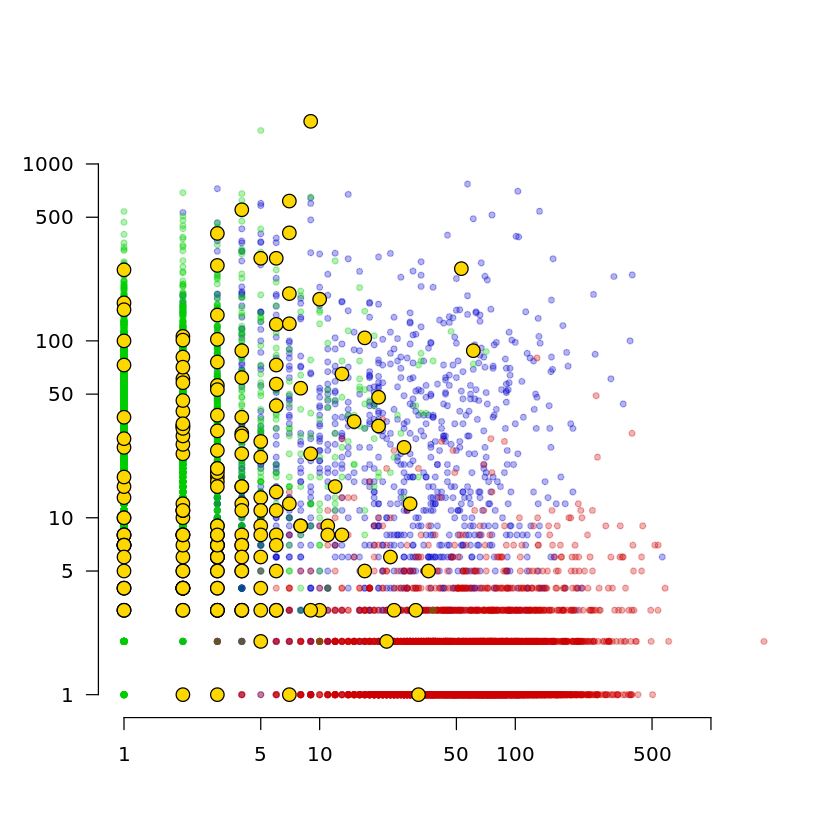

In [84]:
cells = intersect(rownames(mle_res), c(good_pics, im_cells, ni_cells))
length(cells)
x = colSums(umis[ im_genes, cells])
y = colSums(umis[ ni_genes, cells])
pos_cells = intersect(good_pics, names(which(parser_im == "Myeloid cells")))
length(pos_cells)
plot.2(1 + x, 1 + y, log = "xy", 
#       col = 2 + (cells %in% pos_cells))
       col = alpha(rainbow(3, v = 0.8)[ as.numeric(factor(mle_res[cells, "type"]))], 0.3))
points(1 + x[pos_cells], 1 + y[pos_cells], pch = 21, cex = 1.5, bg = "gold")

In [85]:
#table(sin_names)
#table(parser_both_rev)
table(parser_both_rev, cell_stats[ good_pics, "Cell_type"])

                                                                 
parser_both_rev                                                   CD150-CD45
  Erythroid progenitors@preB                                              63
  Erythroid cells@preB                                                    11
  Erythrocytes@preB                                                       12
  Megakaryocyte progenitors@preB                                          59
  Megakaryocytes@preB                                                     16
  Platelets@preB                                                           6
  Endothelial cells@preB                                                  10
  Mesothelial cells@preB                                                   0
  Hepatic stellate cells@preB                                              0
  Liver epithelial cells@preB                                             14
  Erythroid progenitors@pDC                                                4
  Erythroc

In [86]:
cells = union(im_cells, ni_cells)
m = t(apply(sin_n[,cells], 1, tapply, sin_names[cells], mean))
head(m)

Basophils  Dendritic cells Elane+ Ms4a3+ immature neutrophils
0610005C13Rik 0.00000000 0.000000000     0.000000000                       
0610006L08Rik 0.00000000 0.000000000     0.000000000                       
0610009B22Rik 0.03287366 0.017668439     0.034424854                       
0610009E02Rik 0.02298217 0.000000000     0.001454111                       
0610009L18Rik 0.00000000 0.002362547     0.002777378                       
0610010K14Rik 0.00000000 0.000000000     0.000000000                       
              Endothelial cells Erythrocytes Erythroid cells
0610005C13Rik 0.0040194797      0.000000000  0.0004949804   
0610006L08Rik 0.0000000000      0.000000000  0.0000000000   
0610009B22Rik 0.0289145870      0.003803552  0.0336637925   
0610009E02Rik 0.0012917728      0.000000000  0.0001053053   
0610009L18Rik 0.0017055741      0.000000000  0.0004084967   
0610010K14Rik 0.0005483578      0.000000000  0.0000000000   
              Erythroid progenitors Fcnb+ neutrophils Hepatic stellate cells
0610005C13Rik 0.0006858418          0.000000000       0.00000000            
0610006L08Rik 0.0000000000          0.000000000       0.00000000            
0610009B22Rik 0.0357731729          0.021448836       0.09344007            
0610009E02Rik 0.0001988231          0.000000000       0.00000000            
0610009L18Rik 0.0025187877          0.002117084       0.01377866            
0610010K14Rik 0.0000000000          0.000000000       0.00000000            
              Kupffer cells ⋯ Mfap5+ fibroblasts
0610005C13Rik 0.01328762    ⋯ 0.000000000       
0610006L08Rik 0.00000000    ⋯ 0.000000000       
0610009B22Rik 0.02549077    ⋯ 0.023416698       
0610009E02Rik 0.00000000    ⋯ 0.008503401       
0610009L18Rik 0.01331381    ⋯ 0.005694761       
0610010K14Rik 0.00000000    ⋯ 0.000000000       
              Mmp8 low Retnlg low Fcnb+ neutrophils Monocytes   Myeloid cells
0610005C13Rik 0.0008836704                          0.001402084 0.001002923  
0610006L08Rik 0.0000000000                          0.000000000 0.000000000  
0610009B22Rik 0.0158377597                          0.029486989 0.046815483  
0610009E02Rik 0.0000000000                          0.000000000 0.005013235  
0610009L18Rik 0.0038617350                          0.000395132 0.002676799  
0610010K14Rik 0.0000000000                          0.000000000 0.000000000  
              NK         pDC        Platelets   preB        
0610005C13Rik 0.00000000 0.00000000 0.001634468 0.0000000000
0610006L08Rik 0.00000000 0.00000000 0.000000000 0.0000000000
0610009B22Rik 0.01876736 0.01443866 0.014262227 0.0176513704
0610009E02Rik 0.00000000 0.00000000 0.000000000 0.0000000000
0610009L18Rik 0.00000000 0.00000000 0.010036005 0.0003356081
0610010K14Rik 0.00000000 0.00000000 0.000000000 0.0000000000
              Retnlg+ mmp8+ neutrophils T cells   
0610005C13Rik 0.0004327262              0.00000000
0610006L08Rik 0.0000000000              0.00000000
0610009B22Rik 0.0123023927              0.04325877
0610009E02Rik 0.0028140555              0.00000000
0610009L18Rik 0.0030387120              0.00000000
0610010K14Rik 0.0000000000              0.00000000

In [87]:
write.table(lin_ord)

"x"
"1" "preB"
"2" "pDC"
"3" "T cells"
"4" "NK"
"5" "Myeloid cells"
"6" "Monocytes"
"7" "Kupffer cells"
"8" "Dendritic cells"
"9" "Elane+ Ms4a3+ immature neutrophils"
"10" "Fcnb+ neutrophils"
"11" "Mmp8 low Retnlg low Fcnb+ neutrophils"
"12" "Retnlg+ mmp8+ neutrophils"
"13" "Basophils"
"14" "Erythroid progenitors"
"15" "Erythroid cells"
"16" "Erythrocytes"
"17" "Megakaryocyte progenitors"
"18" "Megakaryocytes"
"19" "Platelets"
"20" "Endothelial cells"
"21" "Mesothelial cells"
"22" "Mfap5+ fibroblasts"
"23" "Hepatic stellate cells"
"24" "Liver epithelial cells"
"25" "Mix"


In [ ]:
ga = "Kupffer cells"
gbs = lin_ord[17:19]
reg = 0.02
y = log2(reg + m[,ga])
par(mfrow = c(2,2))
for (gb in gbs) {
    x = log2(reg + m[,gb])
    plot.2(x,y, xlab = gb, ylab = ga, text = T, cex = 0.5)
    abline(coef = c(0,1)); abline(coef = c(1,1), lty = 2); abline(coef = c(-1,1), lty = 2)
}

In [ ]:
Z = log2((reg + m[,ga]) / (reg + m[,gbs]))

In [ ]:
min_z = apply(Z, 1, min)
mk_genes = names(which(min_z < 0))
length(mk_genes)
dim(m)

In [ ]:
all_kc = union(names(which(sin_names == ga)), names(which(parser_im == ga & parser_ni %in% gbs)))
table(cell_stats[ all_kc, "Cell_type"],
     cell_stats[ all_kc, "Age"])

length(cells)
length(good_pics)

In [ ]:
scdb_add_mat(paste0(id, "_macs"), tgScMat(mat=umis[setdiff(rownames(umis), mk_genes), all_kc], cell_metadata=cell_stats[ all_kc,]))

In [ ]:
max_z = apply(Z, 1, max)
nms = union(names(head(sort(max_z,T), 100)), "Il1b")
sort(nms)

In [ ]:
scdb_mat(paste0(id, "_macs"))@ncells

In [ ]:
thresh = 0.14
size = 0.2
outfile = paste0(outdir, "/macs_gmods.txt")
mcell_mat_rpt_cor_anchors(mat_id=paste0(id, "_macs"), gene_anchors = nms, cor_thresh = thresh, gene_anti = c(),
        tab_fn = outfile, sz_cor_thresh = size)

In [ ]:
gcor_mat = read.delim(paste0(outdir, "/macs_gmods.txt"), stringsAsFactor=F, row.names=1)
dim(gcor_mat)

In [ ]:
foc_genes = apply(gcor_mat[, intersect(colnames(gcor_mat), gsub("-", ".", nms))], 1, which.max)
gset = gset_new_gset(sets = foc_genes, desc = "Macs")
scdb_add_gset(paste0(id, "_macs"), gset)

In [ ]:
mcell_mat_ignore_genes(new_mat_id = paste0(id, "_macs"), mat_id = id, ig_genes = names(foc_genes), reverse = T)
mcell_gset_split_by_dsmat(gset_id = paste0(id, "_macs"), mat_id = paste0(id, "_macs"), K = round(nrow(gcor_mat)/10))
gset = scdb_gset(paste0(id, "_macs"))

In [ ]:
scfigs_init(outdir)


In [ ]:
mcell_plot_gset_cor_mats_no_file(gset_id = paste0(id, "_macs"), scmat_id = paste0(id, "_macs"))

explore_gene_set

In [ ]:
ct = gset@gene_set
table(ct)

In [ ]:
us = ds[names(ct), intersect(colnames(ds), all_kc)]
dim(us)

In [ ]:
C = cor(t(log(1 + us)))
diag(C) = NA
png(paste0(outdir, "/macs_gcor.png"), height = max(2000, nrow(C) * 12), width = max(2000, nrow(C) * 12))
image.2(C, b = T, hct = ct[ rownames(C)], vct = ct[rownames(C)]); box()
dev.off()

In [ ]:
grep("Clec", rownames(lfp), v=T)

In [ ]:
core_genes = c(names(which(ct == 13)), "Clec1b")
vct = factor(color2name[ sin_cl@colors], levels = lin_ord); names(vct) = seq_along(vct)
image.2(lfp[core_genes,], b = T, vct = vct[ colnames(lfp)])

In [ ]:
mac_comb = paste0(cell_stats[ all_kc, "Age"], "@", cell_stats[ all_kc, "Cell_type"])
names(mac_comb) = all_kc

In [ ]:
ga
X = table(cell_stats[ names(sin_names), "Age"], sin_names == ga)
summarize.table(X)
round(X / rowSums(X) * 100, 2)

In [ ]:
length(good_pics)

In [ ]:
ga
X = table(cell_stats[ good_pics, "Age"], parser_im == ga)
summarize.table(X)
round(X / rowSums(X) * 100, 2)

In [ ]:
mac_us = umis[ core_genes, all_kc]
IM = log(1 + mac_us)
IM = IM[, order(colSums(IM))]
par(mar = c(0,10,15,0))
image.2(IM, col = genes_shades, vct = mac_comb[ colnames(IM)]); box()

It is evident that proliferating T cells (last subset to the right), are  expanded in the PIC populations compared to the Singlets TCR-$\beta$+ gate, at all time points. 

A more nuanced test for deviations is looking for genes that are significantly altered in their expression levels in PIC, compared to the expected values dictated by the predictions from the PIC-seq algorithm. These represent PIC-specific transcriptional events.
Based on  PIC-seq estimates, it is possible to reconstruct the expected levels of a gene in a PIC. Importantly, we can also retrieve the expected contribution from the T cell, and the other the contribution from the DC.

In [138]:

good_pics = rownames(mle_res)[ mle_res$type == "PIC" & mle_res$diff > 0]
length(good_pics)
alpha = mle_res[good_pics, "alpha"]; names(alpha) = good_pics
im_mc = mle_res[good_pics, "a_mc"]; names(im_mc) = good_pics
ni_mc = mle_res[good_pics, "b_mc"]; names(ni_mc) = good_pics
parser_im = color2name[ sin_cl@colors[ im_mc]]; names(parser_im) = good_pics
parser_ni = color2name[ sin_cl@colors[ ni_mc]]; names(parser_ni) = good_pics

table(parser_im)
table(parser_ni)

[1] 3634

parser_im
                            Basophils                       Dendritic cells 
                                   78                                   151 
   Elane+ Ms4a3+ immature neutrophils                     Fcnb+ neutrophils 
                                  139                                    69 
                        Kupffer cells Mmp8 low Retnlg low Fcnb+ neutrophils 
                                  485                                   314 
                            Monocytes                         Myeloid cells 
                                  404                                   404 
                                   NK                                   pDC 
                                   49                                    23 
                                 preB             Retnlg+ mmp8+ neutrophils 
                                  681                                   183 
                              T cells 
                           

parser_ni
        Endothelial cells              Erythrocytes           Erythroid cells 
                      331                       198                       107 
    Erythroid progenitors    Hepatic stellate cells    Liver epithelial cells 
                      876                        25                       137 
Megakaryocyte progenitors            Megakaryocytes         Mesothelial cells 
                     1164                       399                        51 
       Mfap5+ fibroblasts                 Platelets 
                        4                       342 

In [139]:
genes = setdiff(rownames(sin_cl@e_gc), bad_genes)
cells = intersect(colnames(ds), good_pics)
ds2 = ds[genes, cells]
us = pic_umis[genes, cells]
length(genes)
length(cells)

exp_us = generate_expected_pics_from_mle(id_s, mle_res[good_pics, c("a_mc", "b_mc")], mle_res[ good_pics, "alpha"], 
	colSums(us), bad_genes = bad_genes)
exp_n = generate_expected_pics_from_mle(id_s, mle_res[good_pics, c("a_mc", "b_mc")], mle_res[ good_pics, "alpha"], 
	colSums(ds2), bad_genes = bad_genes)
t_n = generate_expected_pics_from_mle(id_s, mle_res[good_pics, c("a_mc", "b_mc")], rep(1, length(good_pics)),
	colSums(ds2) * alpha, bad_genes = bad_genes)
dc_n = generate_expected_pics_from_mle(id_s, mle_res[good_pics, c("a_mc", "b_mc")], rep(0, length(good_pics)),
        colSums(ds2) * (1 - alpha), bad_genes = bad_genes)

[1] 17312

[1] 3634

We calculated four  genes x cells matrices.

exp_us represents the expected UMI, such that for each cell the UMI count equals that of the original cells.

exp_n represents the normalized expected UMI, such that for each cell the UMI count is downsampled to numis (=1000 UMIs in this example).

t_n represents the normalized expected UMI originating from the T cell contributing to the PIC. The UMI count for each cell equals numis * $\alpha$.

dc_n represents the normalized expected UMI originating from the DC contributing to the PIC. The UMI count for each cell equals numis * (1 - $\alpha$).

Notice that exp_n = t_n + dc_n



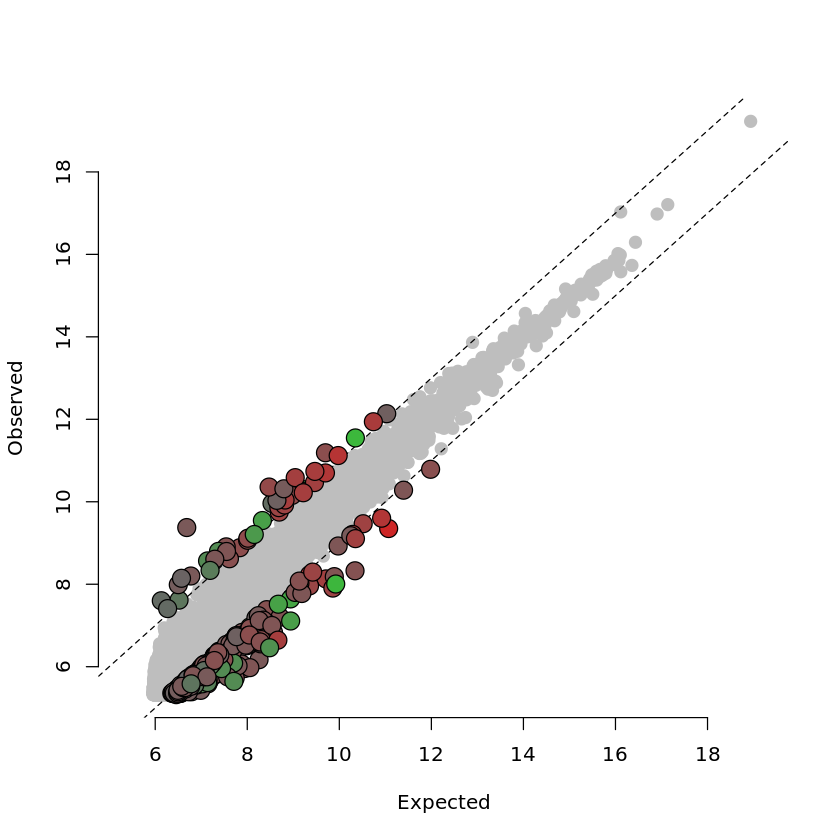

In [140]:
y = rowSums(us[genes,good_pics]); x = rowSums(exp_us[genes,good_pics]);

reg = 40
sum_t = rowSums(t_n[genes,]); sum_dc = rowSums(dc_n[genes,])
z = log2((10 + sum_dc) / (10 + sum_t))
lFC = log2((y+reg)/(x+reg))
grad = colorRampPalette(c("limegreen", "gray40", "firebrick3"))(101)
disp_genes = names(which(abs(lFC) > 1))
val = z[disp_genes]; zlim = max(abs(val))
val_n = round((val + zlim) / (2 * zlim) * 100) + 1
lx = log2(reg+x); ly = log2(reg+y)
lim = quantile(c(lx,ly), c(0,1))
plot(lx, ly, pch = 20, col = "gray", cex = 2,
        xlim = lim, ylim = lim, axes = F, xlab = "Expected", ylab = "Observed")
axis(1); axis(2);
abline(coef = c(1,1), lty = 2); abline(coef = c(-1,1), lty = 2)
points(lx[ disp_genes], ly[disp_genes], cex = 2, pch = 21, bg = grad[val_n[disp_genes]])


In [141]:
lin_ord

[1] "preB"                                 
 [2] "pDC"                                  
 [3] "T cells"                              
 [4] "NK"                                   
 [5] "Myeloid cells"                        
 [6] "Monocytes"                            
 [7] "Kupffer cells"                        
 [8] "Dendritic cells"                      
 [9] "Elane+ Ms4a3+ immature neutrophils"   
[10] "Fcnb+ neutrophils"                    
[11] "Mmp8 low Retnlg low Fcnb+ neutrophils"
[12] "Retnlg+ mmp8+ neutrophils"            
[13] "Basophils"                            
[14] "Erythroid progenitors"                
[15] "Erythroid cells"                      
[16] "Erythrocytes"                         
[17] "Megakaryocyte progenitors"            
[18] "Megakaryocytes"                       
[19] "Platelets"                            
[20] "Endothelial cells"                    
[21] "Mesothelial cells"                    
[22] "Mfap5+ fibroblasts"                   
[23] "Hepatic stellate cells"               
[24] "Liver epithelial cells"               
[25] "Mix"

In [254]:
#table(parser_im, parser_ni)
pops_im = c("Myeloid cells", "Kupffer cells")
pops_ni = c('Megakaryocyte progenitors', 'Megakaryocytes')
sub_pics = names(parser_im)[ parser_im %in% pops_im & parser_ni %in% pops_ni]
length(sub_pics)

[1] 349

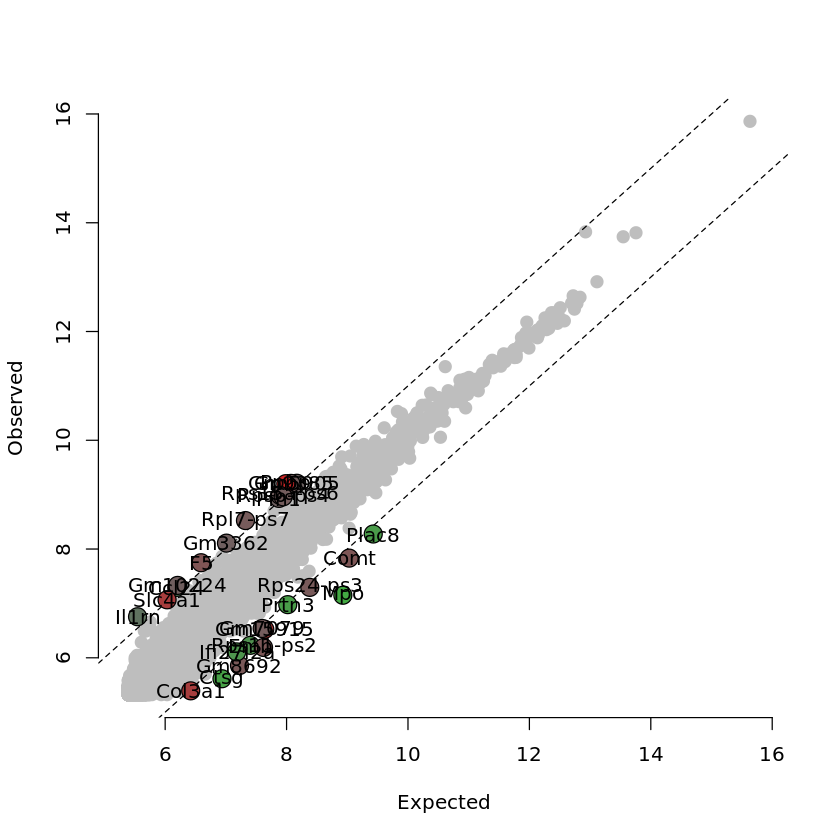

In [143]:
y = rowSums(us[genes,sub_pics]); x = rowSums(exp_us[genes,sub_pics]);

reg = 40
sum_t = rowSums(t_n[genes,]); sum_dc = rowSums(dc_n[genes,])
z = log2((10 + sum_dc) / (10 + sum_t))
lFC = log2((y+reg)/(x+reg))
grad = colorRampPalette(c("limegreen", "gray40", "firebrick3"))(101)
disp_genes = names(which(abs(lFC) > 1))
val = z[disp_genes]; zlim = max(abs(val))
val_n = round((val + zlim) / (2 * zlim) * 100) + 1
lx = log2(reg+x); ly = log2(reg+y)
lim = quantile(c(lx,ly), c(0,1))
plot(lx, ly, pch = 20, col = "gray", cex = 2,
        xlim = lim, ylim = lim, axes = F, xlab = "Expected", ylab = "Observed")
axis(1); axis(2);
abline(coef = c(1,1), lty = 2); abline(coef = c(-1,1), lty = 2)
points(lx[ disp_genes], ly[disp_genes], cex = 2, pch = 21, bg = grad[val_n[disp_genes]])
text(lx[ disp_genes], ly[disp_genes], disp_genes)


In this plot, each dot represents a gene, comparing its expected value pooled across all PICs to its observed value in the actual PIC dataset. Differential genes (whose absolute obs/exp log2 fold change is greater than 1), are colored by the difference (log2 fold change) between the expected T (t_n) and DC (dc_n) values, such that green genes are more represented in the T fraction of the PIC than red genes. We can also plot the differential genes in a bar plot:

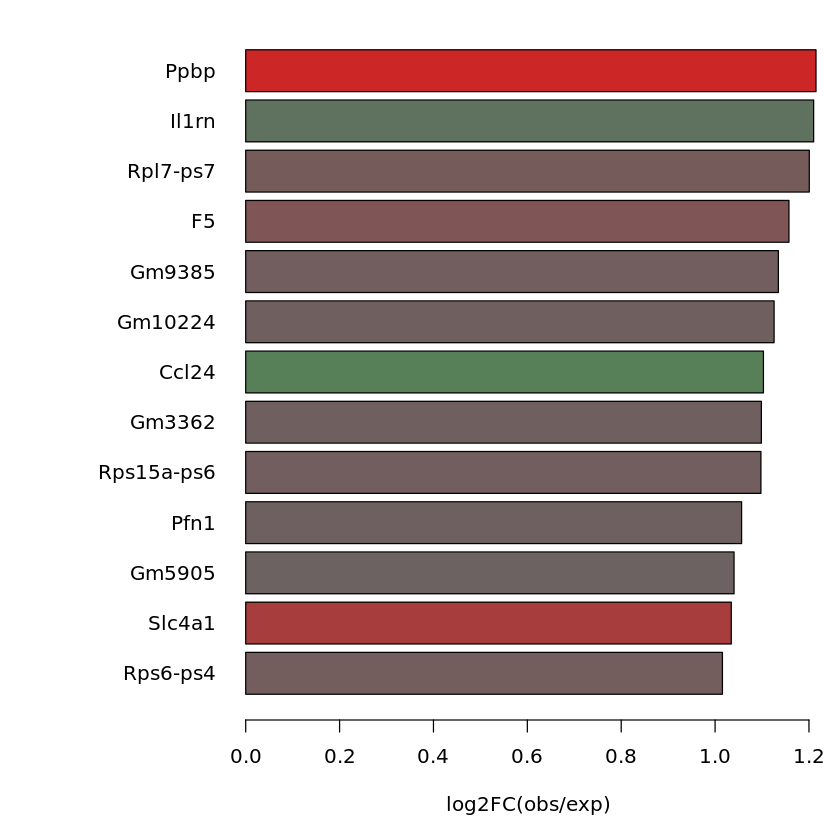

In [144]:
disp_genes = names(which(lFC > 1))
x = sort(lFC[ disp_genes])
par(mar = c(5,10,1,1))
barplot(x, horiz = T, xlab = "log2FC(obs/exp)", las=2, col = grad[val_n[names(x)]], axes=F)
axis(1)

We see that *Tigit* and *Maf*, for example, are T specific, while *Cxcl10* is DC-specific in the singlets model.

However, this analysis is limited by pooling all PICs together. We can also look for PIC upregulation which is specific to certain combinations of T and DC subsets:

In [255]:
#write.table(lin_ord)

large_lins = c(rep("Adaptive", 4), rep("Myeloid", 2), "Kupffer cells", "Myeloid", rep("Neutrophils", 4), "Basophils",
    rep("Erythroid", 3), rep("Megakaryocytes", 2), "Platelets", rep("Stroma", 4), "Epithelium", "Mix")

large_lins = factor(large_lins, levels = unique(large_lins))
names(large_lins) = lin_ord
cbind(seq_along(large_lins), names(large_lins), as.vector(large_lins))

[,1] [,2]                                  [,3]          
 [1,] 1    preB                                  Adaptive      
 [2,] 2    pDC                                   Adaptive      
 [3,] 3    T cells                               Adaptive      
 [4,] 4    NK                                    Adaptive      
 [5,] 5    Myeloid cells                         Myeloid       
 [6,] 6    Monocytes                             Myeloid       
 [7,] 7    Kupffer cells                         Kupffer cells 
 [8,] 8    Dendritic cells                       Myeloid       
 [9,] 9    Elane+ Ms4a3+ immature neutrophils    Neutrophils   
[10,] 10   Fcnb+ neutrophils                     Neutrophils   
[11,] 11   Mmp8 low Retnlg low Fcnb+ neutrophils Neutrophils   
[12,] 12   Retnlg+ mmp8+ neutrophils             Neutrophils   
[13,] 13   Basophils                             Basophils     
[14,] 14   Erythroid progenitors                 Erythroid     
[15,] 15   Erythroid cells                       Erythroid     
[16,] 16   Erythrocytes                          Erythroid     
[17,] 17   Megakaryocyte progenitors             Megakaryocytes
[18,] 18   Megakaryocytes                        Megakaryocytes
[19,] 19   Platelets                             Platelets     
[20,] 20   Endothelial cells                     Stroma        
[21,] 21   Mesothelial cells                     Stroma        
[22,] 22   Mfap5+ fibroblasts                    Stroma        
[23,] 23   Hepatic stellate cells                Stroma        
[24,] 24   Liver epithelial cells                Epithelium    
[25,] 25   Mix                                   Mix

In [256]:
large_cols = name2color[ lin_ord[ c(3,6,7,12,13,16,18,19,22,24,25)]]
names(large_cols) = levels(large_lins)
large_cols

Adaptive        Myeloid  Kupffer cells    Neutrophils      Basophils 
     "#00BBDA"      "#69D29F"         "blue"      "#034F25"         "gold" 
     Erythroid Megakaryocytes      Platelets         Stroma     Epithelium 
     "#8B3D44"      "#E88F43"      "#B65E12"      "#D1D269"      "#5A2F03" 
           Mix 
      "gray50"

In [147]:
parser_both = interaction(large_lins[parser_im], large_lins[parser_ni], sep = "@")
parser_both = factor(parser_both, levels = names(which(table(parser_both) > 0)))
names(parser_both) = names(parser_im)
table(parser_both)

parser_both_rev = interaction(large_lins[parser_ni], large_lins[parser_im], sep = "@")
parser_both_rev = factor(parser_both_rev, levels = names(which(table(parser_both_rev) > 0)))
names(parser_both_rev) = names(parser_im)
table(parser_both_rev)

parser_both
          Adaptive@Erythroid            Myeloid@Erythroid 
                         415                          353 
     Kupffer cells@Erythroid        Neutrophils@Erythroid 
                         147                          242 
         Basophils@Erythroid      Adaptive@Megakaryocytes 
                          24                          696 
      Myeloid@Megakaryocytes Kupffer cells@Megakaryocytes 
                         420                          157 
  Neutrophils@Megakaryocytes     Basophils@Megakaryocytes 
                         251                           39 
          Adaptive@Platelets            Myeloid@Platelets 
                         130                           82 
     Kupffer cells@Platelets        Neutrophils@Platelets 
                          24                           95 
         Basophils@Platelets              Adaptive@Stroma 
                          11                          118 
              Myeloid@Stroma         Kupffer

parser_both_rev
          Erythroid@Adaptive      Megakaryocytes@Adaptive 
                         415                          696 
          Platelets@Adaptive              Stroma@Adaptive 
                         130                          118 
         Epithelium@Adaptive            Erythroid@Myeloid 
                          48                          353 
      Megakaryocytes@Myeloid            Platelets@Myeloid 
                         420                           82 
              Stroma@Myeloid           Epithelium@Myeloid 
                          76                           28 
     Erythroid@Kupffer cells Megakaryocytes@Kupffer cells 
                         147                          157 
     Platelets@Kupffer cells         Stroma@Kupffer cells 
                          24                          121 
    Epithelium@Kupffer cells        Erythroid@Neutrophils 
                          36                          242 
  Megakaryocytes@Neutrophils        Plat

In [257]:
sub_combs = names(table(as.vector(parser_both_rev[ sub_pics])))

In [258]:
#pic_comb = interaction(parser_both_rev, cell_stats[ good_pics, "Age"], sep = "@")
#pic_comb = interaction(parser_both_rev, rep("ALL", length(parser_both_rev)), sep = "@")
pic_comb = factor(ifelse(names(parser_both_rev) %in% sub_pics, as.vector(parser_both_rev), "OTHER@OTHER"),
                  levels = c(sub_combs, "OTHER@OTHER"))
names(pic_comb) = names(parser_both_rev)
good_combs = names(which(table(pic_comb) >= 20))
analyzed_pics = names(pic_comb)[ pic_comb %in% good_combs]
pic_comb = factor(pic_comb[ analyzed_pics], levels = good_combs)
names(pic_comb) = analyzed_pics
table(pic_comb)

pic_comb
Megakaryocytes@Kupffer cells       Megakaryocytes@Myeloid 
                         157                          192 
                 OTHER@OTHER 
                        3285 

rel_combs = c("Megakaryocytes@Kupffer cells@ALL", "Platelets@Kupffer cells@ALL")
analyzed_pics = names(pic_comb)[ pic_comb %in% rel_combs]
pic_comb = factor(pic_comb[ analyzed_pics], levels = rel_combs)
names(pic_comb) = analyzed_pics
table(pic_comb)

In [259]:
length(analyzed_pics)
table(pic_comb[ analyzed_pics])

[1] 3634


Megakaryocytes@Kupffer cells       Megakaryocytes@Myeloid 
                         157                          192 
                 OTHER@OTHER 
                        3285 

In [260]:
bad_genes = grep("Gm[0-9].|Mir|-ps|Rpl|Rps|Ig|Jchain|Ftl1|Malat1", sin_mat@genes, v=T)

good_genes = setdiff(rownames(ds2), bad_genes)

In [261]:
real_m = t(apply(ds2[ good_genes, analyzed_pics], 1, tapply, pic_comb[analyzed_pics], sum))
exp_m =  t(apply(exp_n[ good_genes, analyzed_pics], 1, tapply, pic_comb[analyzed_pics], sum))
x2 = rowSums(((real_m - exp_m)^2 )/exp_m)
qvals = p.adjust(1 - pchisq(x2, df = ncol(real_m) - 1), "fdr")
z = log2(real_m / exp_m);
z[real_m==0] = NA

genes = setdiff(names(which(qvals < 1e-6 & 
             apply(us[ names(qvals), analyzed_pics], 1, function(x) sort(x,T)[3]) > 4 & 
             rowSums(us[names(qvals),analyzed_pics]) > 20)), bad_genes)

length(genes)

[1] 259

x = exp_m[,1]
y = real_m[,1]
plot.2(1 + x, 1 + y, log = "xy", col = 2 + (x2 > 20), text = T, text_vec = ifelse(x2 > 20, names(x2), ""), cex = 0.5)
abline(coef = c(0,1))

In [262]:
genes

[1] "Abcg3"         "Actb"          "Adgrg1"        "Afp"          
  [5] "Agpat3"        "Ahsg"          "AI662270"      "Alas2"        
  [9] "Alb"           "Aldob"         "Alox12"        "Alox5ap"      
 [13] "Anxa1"         "Apoa2"         "Apoe"          "Arhgef2"      
 [17] "B020010K11Rik" "B2m"           "Bhmt"          "Bin2"         
 [21] "Btf3"          "Btg2"          "C1qa"          "C1qb"         
 [25] "C1qc"          "C230062I16Rik" "Car2"          "Cat"          
 [29] "Ccl22"         "Ccl24"         "Ccl3"          "Ccn2"         
 [33] "Ccna2"         "Ccr7"          "Cd14"          "Cd24a"        
 [37] "Cd300ld"       "Cd3d"          "Cd48"          "Cd5l"         
 [41] "Cd7"           "Cd9"           "Cdk2ap1"       "Celf2"        
 [45] "Cenpa"         "Cfp"           "Chchd10"       "Cited2"       
 [49] "Cited4"        "Cks2"          "Clca3a1"       "Clec4f"       
 [53] "Col18a1"       "Col1a1"        "Col3a1"        "Comt"         
 [57] "Cpox"          "Csf1r"         "Csf2rb2"       "Csta2"        
 [61] "Cstdc4"        "Cstdc5"        "Ctdsp1"        "Ctla2a"       
 [65] "Ctsb"          "Ctsg"          "Ddx39b"        "Diaph1"       
 [69] "Dmpk"          "Dusp1"         "Dusp2"         "Dusp3"        
 [73] "Egr1"          "Ehd3"          "Eif4a1"        "Eif5a"        
 [77] "Elane"         "Emb"           "Eno1b"         "Epsti1"       
 [81] "F13a1"         "F2r"           "F2rl2"         "F5"           
 [85] "Fabp1"         "Fabp5"         "Fbp1"          "Fcna"         
 [89] "Fech"          "Fermt3"        "Fgb"           "Fhod1"        
 [93] "Fos"           "Fth1"          "Fut8"          "Gadd45g"      
 [97] "Gas2l1"        "Gimap6"        "Glul"          "Gmfg"         
[101] "Gpr146"        "Gpx1"          "Grn"           "Gypa"         
[105] "Gzma"          "H19"           "H2-D1"         "H2-K1"        
[109] "H2az1"         "H3f3a"         "Hba-x"         "Hlf"          
[113] "Hmgb2"         "Hmgcs2"        "Hmgn2"         "Hmox1"        
[117] "Hnrnpa3"       "Hp"            "Hsp90ab1"      "Id2"          
[121] "Ier2"          "Ifitm1"        "Ifitm6"        "Incenp"       
[125] "Irag1"         "Isg20"         "Itga2b"        "Itgb3"        
[129] "Itm2b"         "Junb"          "Kdm2a"         "Lcn2"         
[133] "Lgals3bp"      "Lgmn"          "Lmna"          "Lrp1"         
[137] "Lrrc32"        "Lsm7"          "Lyve1"         "Lyz2"         
[141] "Mafb"          "Marco"         "Meg3"          "Mertk"        
[145] "Mfsd2b"        "Mgat5"         "Mkrn1"         "Mpl"          
[149] "Mpo"           "Mpp1"          "Ms4a1"         "Ms4a4b"       
[153] "Ms4a6b"        "Mt1"           "Mt2"           "Muc13"        
[157] "Myc"           "Mycn"          "Myl9"          "Ndufa4"       
[161] "Neat1"         "Ngp"           "Pbx1"          "Pcna"         
[165] "Pdcd4"         "Pde3a"         "Pf4"           "Pfn1"         
[169] "Plac8"         "Plek"          "Plpp3"         "Pnpla2"       
[173] "Ppbp"          "Ppia"          "Ppp1ccb"       "Ppp1r15a"     
[177] "Prdx2"         "Prtn3"         "Psma3"         "Ptma"         
[181] "Rab11a"        "Rab38"         "Ran"           "Rap1b"        
[185] "Rasal1"        "Rbp1"          "Retnlg"        "Rgs1"         
[189] "Rgs18"         "Rn18s-rs5"     "S100a8"        "S100a9"       
[193] "Samsn1"        "Sash1"         "Selp"          "Serpina1a"    
[197] "Serpina1b"     "Serpina3b"     "Serpina3g"     "Serpina3n"    
[201] "Serpine2"      "Shisa5"        "Ski"           "Slc25a37"     
[205] "Slc25a5"       "Slc35d3"       "Slc40a1"       "Slc4a1"       
[209] "Snrpg"         "Snu13"         "Socs3"         "Sod3"         
[213] "Ssx2ip"        "Stfa1"         "Stfa2"         "Stfa2l1"      
[217] "Stfa3"         "Stmn1"         "Taldo1"        "Tbca"         
[221] "Tcf7"          "Tent5c"        "Tfrc"          "Thy1"         
[225] "Timd4"         "Timp3"         "Tmem123"       "Tmem14c"      
[229] "Tmsb4

In [ ]:
dim(real_m)

We screened for genes whose observed expression is significantly higher in one combination of T and DC subset, at a specific time point, using a chi-square test. Now we can plot the log2(obs/exp) values in a heatmap:

install.packages('tglkmeans')

library(tglkmeans)

In [263]:
reg = 5              
z_reg = log2((real_m + reg) / (exp_m + reg))
IM = z_reg[genes, ]
IM = IM[rowSums(!is.na(IM)) > 0,]

#tp_comp = factor(vecsplit(colnames(IM), "\\.", 3))#, levels = c("3h", "20h", "48h"))
im_comp = vecsplit(colnames(IM), "@", 2)
ni_comp = vecsplit(colnames(IM), "@", 1)
#samp_ord = colnames(IM)[order(tp_comp, factor(im_comp, levels = lin_ord), factor(ni_comp, levels = lin_ord))]
samp_ord = colnames(IM)[order(factor(im_comp, levels = lin_ord), factor(ni_comp, levels = lin_ord))]

tp_cols = c("lightskyblue1", "lightslateblue", "blue")
IM2 = IM[,samp_ord]
k = nrow(IM2) / 15
data = as.data.frame(IM2)
#data$id = rownames(data)
#data = data[,c(ncol(data), 1:(ncol(data) - 1))]
#km <- TGL_kmeans_tidy(data, k=k, metric='euclid', verbose=TRUE, seed = 18)
km = kmeans(data, k)

In [264]:
head(data)

Megakaryocytes@Kupffer cells Megakaryocytes@Myeloid OTHER@OTHER
Abcg3   0.50084014                   0.47000336             0.93016083
Actb   -0.09015053                  -0.07532497            -0.04277087
Adgrg1  0.27367116                   0.30314437             0.37983301
Afp     0.92595042                   0.55998321            -0.85614126
Agpat3  0.20769117                  -0.16584783             0.61147041
Ahsg    0.08991804                   0.07241546            -0.47379461

In [265]:
centers = as.matrix(km$centers); rownames(centers) = seq_len(k)
x_min = apply(centers,1,min); x_max = apply(centers,1,max)
centers = centers[ order(abs(x_min) < x_max, max.col(centers)),]
km_clusts = as.numeric(factor(km$cluster, levels = rownames(centers))); names(km_clusts) = rownames(data)

png(paste0(outdir, "/obs-exp_heatmap.png"), height = max(length(km_clusts) * 12, 2000), width = 1500)
par(mar = c(20,10,3,3))
image.2(IM2, balance = T, annotate = "both", hct = km_clusts); box()
dev.off()

zlim: -2.80969886345704<>2.80969886345704



pdf 
  2

In [176]:
length(km_clusts)

[1] 269

In [177]:
names(which(km_clusts == 12))
km_clusts["Hlf"]

[1] "Abcg3"         "Apoe"          "Btf3"          "Btg2"         
 [5] "C1qb"          "C230062I16Rik" "Cd5l"          "Cd9"          
 [9] "Dusp2"         "Ehd3"          "F5"            "Fgb"          
[13] "Gimap6"        "Glul"          "Hlf"           "Ifitm1"       
[17] "Incenp"        "Itgb3"         "Junb"          "Lyve1"        
[21] "Mfsd2b"        "Mgat5"         "Mpl"           "Pf4"          
[25] "Pfn1"          "Ppp1ccb"       "Serpine2"      "Slc40a1"      
[29] "Snrpg"         "Tbca"          "Ubash3b"       "Zfp36"

Hlf 
 12

In [185]:
gene_barplot = function(gene) {
    
    real_m = tapply(ds[gene,analyzed_pics], pic_comb[analyzed_pics], mean)
    exp_m =  tapply(exp_n[gene,analyzed_pics], pic_comb[analyzed_pics], mean)
    t_m =  tapply(t_n[gene,analyzed_pics], pic_comb[analyzed_pics], mean)
    dc_m =  tapply(dc_n[gene,analyzed_pics], pic_comb[analyzed_pics], mean)
    reg = 0.1
    z_m = log2((dc_m + reg) / (t_m + reg));
    zlim = max(abs(z_m))

    library(Hmisc)
    m = tapply(ds[gene, analyzed_pics], pic_comb[analyzed_pics], sum)
    n = tapply(colSums(ds[,analyzed_pics]),pic_comb[analyzed_pics],sum)
    Y = binconf(m,n) * c(tapply(colSums(ds[,analyzed_pics]), pic_comb[analyzed_pics], mean))

    #tp_comp = factor(vecsplit(names(real_m), "@", 3))
    t_comp = factor(vecsplit(names(real_m), "@", 2), levels = levels(large_lins))
    dc_comp = factor(vecsplit(names(real_m), "@", 1), levels = levels(large_lins))
    ord = order(t_comp, dc_comp);

    circ_frac = 0.1
    
    exp_tab = rbind(t_m[ord], dc_m[ord], 0, 0)
    real_tab = rbind(0, 0, real_m[ord], 0)
    tab = cbind(exp_tab, real_tab)[, rep(seq_along(ord), each = 2) + rep(c(0, length(ord)), length(ord))]
    mtab = round(max(c(Y, tab), na.rm=T),2) * 1.05
    ylim = c(0, mtab)

    par(fig = c(0,1,0.2,1), mar = c(1,5,3,1))
    X = barplot(tab, col = c("limegreen", "firebrick3", "gray70", "white"), ylim = ylim, las = 2,
          names.arg = rep("", ncol(tab)), space = c(0.5,0), axes = F, main = gene, ylab = "Normzliaed expression")
    obs_coords = X[seq(2,length(X),2)]; ci.l = Y[ord, "Lower"]; ci.u = Y[ord, "Upper"]
    segments(obs_coords, ci.l, y1 = ci.u);
    segments(obs_coords-0.2, ci.l, x1 = obs_coords + 0.2); segments(obs_coords-0.2, ci.u, x1 = obs_coords + 0.2);
    axis(2, las = 2)

    par(fig = c(0,1,0,0.2), new=T, mar = c(3,5,1,1))
    X2 = rowMeans(cbind(X[seq(1,length(X),2)], X[seq(2,length(X),2)]))
    plot(1,1, type="n", axes=F, xlab="", ylab="", ylim = c(-0.3,1.3), xlim = quantile(X,c(0,1)))
    segments(X2, 0, y1 = 1)
    points(X2, rep(0, length(X2)), pch = 21, bg = large_cols[as.vector(dc_comp[ord])], cex = 2)
    points(X2, rep(1, length(X2)), pch = 21, bg = large_cols[as.vector(t_comp[ord])], cex = 2)
    #abline(v=rowMeans(cbind(X2[cls_s], X2[cls_s + 1])))
    #axis(1, at = rowMeans(cbind(X2[c(1, cls_s)], X2[cls])), labels = names(cls))
    box()
}

#invisible(sapply(names(which(km_clusts == 12)), gene_barplot))

In [179]:
library(Hmisc)

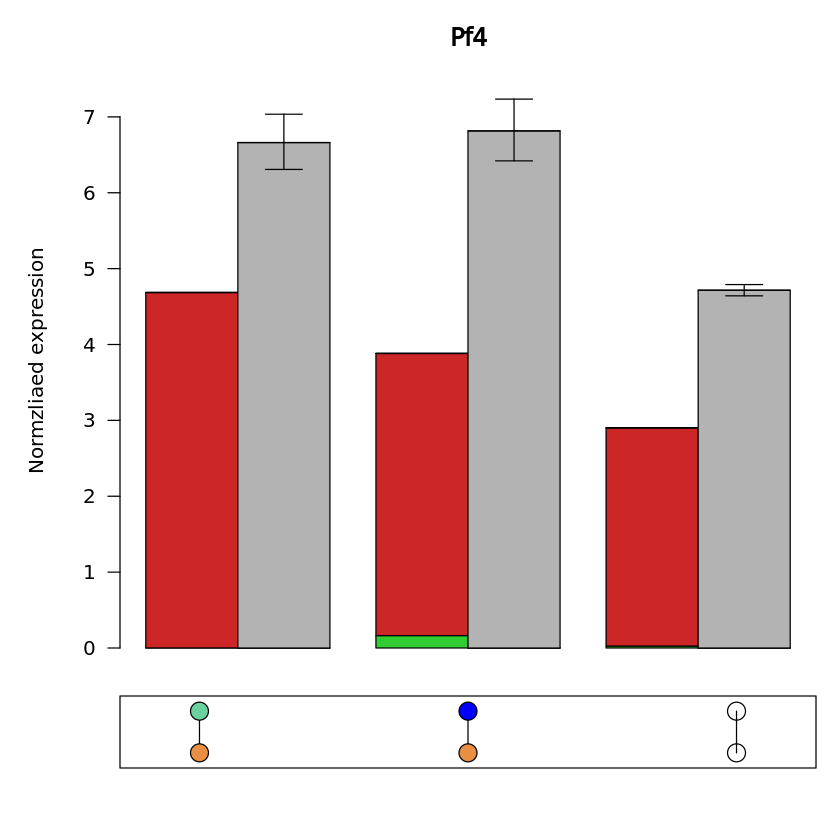

In [266]:
gene_barplot("Pf4")

In [187]:
dir.create(paste0(outdir, "/obs-exp_barplots_with_platelets/"))

#gene = "Vcam1"
for (gene in names(km_clusts)) {
    pdf(paste0(outdir, "/obs-exp_barplots_with_platelets/", gene, ".pdf"))
    gene_barplot(gene)
    dev.off()
    
}

Warning message in dir.create(paste0(outdir, "/obs-exp_barplots_with_platelets/")):
“'results/hemato_liver_pics//obs-exp_barplots_with_platelets' already exists”


In [188]:
dim(x2)

NULL

In [267]:
nms = setdiff(names(km_clusts), c("Rn18s-rs5", "S100a8"))
nms = names(sort(x2[nms],F))
nms

[1] "Trim10"        "Psma3"         "Fut8"          "Gas2l1"       
  [5] "Alox5ap"       "Ski"           "Ctsg"          "Tmsb4x"       
  [9] "Lrp1"          "Tmem14c"       "Samsn1"        "Shisa5"       
 [13] "Celf2"         "Cd300ld"       "Clca3a1"       "Treml2"       
 [17] "Tbca"          "Ccna2"         "Kdm2a"         "Gpr146"       
 [21] "Arhgef2"       "Vezf1"         "Ndufa4"        "Actb"         
 [25] "Cat"           "Dusp3"         "Cd7"           "Pbx1"         
 [29] "Sod3"          "Itm2b"         "Ucp2"          "Tnfrsf1a"     
 [33] "Tsc22d3"       "Pnpla2"        "Ctdsp1"        "Neat1"        
 [37] "Mfsd2b"        "Col18a1"       "Tubb2a"        "Ctla2a"       
 [41] "Cited4"        "Epsti1"        "Serpina3n"     "Rab38"        
 [45] "Hmgcs2"        "Tuba1c"        "Hmgn2"         "Sash1"        
 [49] "F2rl2"         "Elane"         "Mgat5"         "Cpox"         
 [53] "Hsp90ab1"      "Tfrc"          "Ssx2ip"        "Mpp1"         
 [57] "Ppbp"          "Pdcd4"         "Csf1r"         "Ubash3b"      
 [61] "Id2"           "Rab11a"        "Plpp3"         "Eif4a1"       
 [65] "Lmna"          "Isg20"         "Chchd10"       "Gimap6"       
 [69] "Eif5a"         "Diaph1"        "Tcf7"          "Ifitm6"       
 [73] "Hnrnpa3"       "Rasal1"        "Incenp"        "Ccl24"        
 [77] "Myc"           "Prtn3"         "Cd48"          "Ppp1ccb"      
 [81] "Tpm2"          "Agpat3"        "Trf"           "Abcg3"        
 [85] "Tuba4a"        "Socs3"         "Serpina1a"     "Col1a1"       
 [89] "Hmgb2"         "Tpt1"          "Ccl3"          "AI662270"     
 [93] "Eno1b"         "Gmfg"          "Fech"          "Slc25a5"      
 [97] "Tubb5"         "Gypa"          "Alox12"        "Taldo1"       
[101] "Mt1"           "Fbp1"          "Ybx1"          "Btf3"         
[105] "Lyve1"         "Pde3a"         "Ms4a6b"        "Cenpa"        
[109] "Emb"           "Mafb"          "Serpina1b"     "Ddx39b"       
[113] "Slc35d3"       "Retnlg"        "Slc25a37"      "Ppia"         
[117] "Dusp2"         "Trpc6"         "Tyrobp"        "H2az1"        
[121] "Ier2"          "Ahsg"          "Bin2"          "Fgb"          
[125] "Ran"           "Hp"            "Fermt3"        "Lgals3bp"     
[129] "Fabp5"         "F5"            "Gadd45g"       "Ppp1r15a"     
[133] "Lsm7"          "Csta2"         "Meg3"          "Pcna"         
[137] "H3f3a"         "Gzma"          "Anxa1"         "B020010K11Rik"
[141] "Col3a1"        "Lrrc32"        "Glul"          "Dusp1"        
[145] "Dmpk"          "Hlf"           "F13a1"         "Snu13"        
[149] "Cd9"           "Mertk"         "Grn"           "Cd14"         
[153] "Rgs18"         "Rbp1"          "Csf2rb2"       "Alas2"        
[157] "Bhmt"          "C230062I16Rik" "Snrpg"         "Cks2"         
[161] "Plek"          "Junb"          "Itga2b"        "Tnfrsf13c"    
[165] "Tent5c"        "Apoa2"         "Tmem123"       "Top2a"        
[169] "Slc40a1"       "H2-D1"         "F2r"           "Tuba1b"       
[173] "Cited2"        "Adgrg1"        "Lcn2"          "Trac"         
[177] "Aldob"         "Timd4"         "Mt2"           "Ctsb"         
[181] "Prdx2"         "H2-K1"         "Vpreb3"        "Fos"          
[185] "Muc13"         "Fhod1"         "Slc4a1"        "Btg2"         
[189] "H19"           "Lgmn"          "Mycn"          "Fabp1"        
[193] "B2m"           "Ube2c"         "Mpo"           "Serpina3b"    
[197] "Mkrn1"         "Pfn1"          "Cd3d"          "Thy1"         
[201] "Cdk2ap1"       "Timp3"         "Ccr7"          "Ccl22"        
[205] "Myl9"          "Ms4a1"         "Stfa2l1"       "Car2"         
[209] "Ttr"           "Cfp"           "Fth1"          "Zfp36"        
[213] "Selp"          "Cd5l"          "Stfa2"         "Ccn2"         
[217] "Ehd3"          "Cd24a"         "Gpx1"          "Irag1"        
[221] "Plac8"         "Egr1"          "Serpine2"      "Stfa3"        
[225] "Ngp"           "C1qb"          "Rgs1"          "Afp"          
[229] "C1qa"

In [268]:
table(pic_comb)
rel_cells = names(pic_comb)[ pic_comb %in% sub_combs]
length(rel_cells)

pic_comb
Megakaryocytes@Kupffer cells       Megakaryocytes@Myeloid 
                         157                          192 
                 OTHER@OTHER 
                        3285 

[1] 349

In [269]:
real_m = t(apply(ds[ nms, rel_cells], 1, tapply, pic_comb[ rel_cells], mean))
exp_m  = t(apply(exp_n[ nms, rel_cells], 1, tapply, pic_comb[ rel_cells], mean))
t_m    = t(apply(t_n[ nms, rel_cells], 1, tapply, pic_comb[ rel_cells], mean))
dc_m   = t(apply(dc_n[ nms, rel_cells], 1, tapply, pic_comb[ rel_cells], mean))

In [270]:
head(real_m)

Megakaryocytes@Kupffer cells Megakaryocytes@Myeloid OTHER@OTHER
Trim10  0.02547771                   0.00000000             NA         
Psma3   0.24840764                   0.47395833             NA         
Fut8    0.16560510                   0.10937500             NA         
Gas2l1  0.07643312                   0.02083333             NA         
Alox5ap 0.19108280                   0.17708333             NA         
Ski     0.08280255                   0.06770833             NA

In [271]:
pop = "Megakaryocytes@Kupffer cells"

In [272]:
reg = 0.1
z_m = log2((real_m[,pop] + reg) / (exp_m[,pop] + reg));
nms = names(sort(real_m[,pop]))
nms

[1] "Cd7"           "Sod3"          "Serpina3n"     "Ccl3"         
  [5] "Gzma"          "Alas2"         "Tnfrsf13c"     "Ms4a1"        
  [9] "Ccn2"          "Ctsg"          "Tcf7"          "Fbp1"         
 [13] "Fabp1"         "Ccr7"          "Ccl22"         "Ms4a4b"       
 [17] "Hba-x"         "Elane"         "Col1a1"        "Ms4a6b"       
 [21] "Col3a1"        "Bhmt"          "Apoa2"         "Trac"         
 [25] "Cd3d"          "Thy1"          "Trbc1"         "Hmgcs2"       
 [29] "Isg20"         "Rasal1"        "Prtn3"         "Emb"          
 [33] "Hp"            "Meg3"          "Hlf"           "Vpreb3"       
 [37] "Trbc2"         "Trim10"        "Plpp3"         "Lmna"         
 [41] "Serpina1a"     "Lyve1"         "Csta2"         "Myl9"         
 [45] "Tpm2"          "Serpina1b"     "Gadd45g"       "Selp"         
 [49] "Chchd10"       "Gypa"          "F13a1"         "Aldob"        
 [53] "Retnlg"        "Fgb"           "Lrrc32"        "Tent5c"       
 [57] "Epsti1"        "Gimap6"        "Alox12"        "Ttr"          
 [61] "Neat1"         "Socs3"         "Dusp2"         "F5"           
 [65] "Rbp1"          "Samsn1"        "Gpr146"        "Dusp3"        
 [69] "Cpox"          "Ifitm6"        "Ppp1ccb"       "Mpo"          
 [73] "Timp3"         "Pnpla2"        "Col18a1"       "Ssx2ip"       
 [77] "Fech"          "Pde3a"         "Trpc6"         "Gas2l1"       
 [81] "Clca3a1"       "Ski"           "Tubb2a"        "Sash1"        
 [85] "H19"           "Stfa2"         "Cited4"        "Slc25a37"     
 [89] "Ahsg"          "Anxa1"         "Cd24a"         "Tsc22d1"      
 [93] "Shisa5"        "Cd300ld"       "Rab38"         "Mgat5"        
 [97] "Diaph1"        "Abcg3"         "Mpp1"          "Lsm7"         
[101] "Cks2"          "Fhod1"         "Serpina3b"     "Kdm2a"        
[105] "Cat"           "Tfrc"          "Ppp1r15a"      "Slc4a1"       
[109] "Agpat3"        "Junb"          "Muc13"         "Mkrn1"        
[113] "Ier2"          "Mertk"         "Stfa2l1"       "Lrp1"         
[117] "Ctdsp1"        "Fabp5"         "Csf2rb2"       "Tnfrsf1a"     
[121] "Tsc22d3"       "Ccl24"         "Lcn2"          "Mycn"         
[125] "Stfa3"         "Comt"          "Vezf1"         "Incenp"       
[129] "Slc35d3"       "C230062I16Rik" "Mt2"           "Serpine2"     
[133] "Ifitm1"        "Fut8"          "Treml2"        "Myc"          
[137] "Ubash3b"       "Afp"           "Eno1b"         "Alox5ap"      
[141] "Ppbp"          "Btg2"          "Dmpk"          "Pfn1"         
[145] "Cenpa"         "B020010K11Rik" "Snu13"         "Cd48"         
[149] "Ndufa4"        "Cd14"          "Vsig4"         "Arhgef2"      
[153] "Egr1"          "Hmgn2"         "Mfsd2b"        "Id2"          
[157] "Psma3"         "Mafb"          "Timd4"         "Cstdc4"       
[161] "Dusp1"         "Rgs1"          "Lgals3bp"      "Serpina3g"    
[165] "Alb"           "Ccna2"         "Tmem123"       "Gmfg"         
[169] "Celf2"         "Tuba4a"        "Tbca"          "Ehd3"         
[173] "Plac8"         "Prdx2"         "Ube2c"         "Stmn1"        
[177] "Tuba1c"        "Snrpg"         "Ngp"           "Pdcd4"        
[181] "Mpl"           "Car2"          "Taldo1"        "Rab11a"       
[185] "Cdk2ap1"       "Btf3"          "Cstdc5"        "Tmem14c"      
[189] "AI662270"      "Fermt3"        "Zfp36"         "Irag1"        
[193] "F2rl2"         "Top2a"         "Pbx1"          "Hnrnpa3"      
[197] "H2az1"         "Ctla2a"        "Mt1"           "Ddx39b"       
[201] "Cited2"        "Cd9"           "Stfa1"         "Trf"          
[205] "Itga2b"        "Fos"           "Bin2"          "Glul"         
[209] "Hmgb2"         "Pcna"          "H2-K1"         "Adgrg1"       
[213] "Clec4f"        "Tyrobp"        "Rgs18"         "Cfp"          
[217] "F2r"           "Eif4a1"        "Lgmn"          "Ucp2"         
[221] "Vcam1"         "Csf1r"         "Itgb3"         "C1qa"         
[225] "Tubb5"         "Plek"          "Lyz2"          "H2-D1"        
[229] "H3f3a

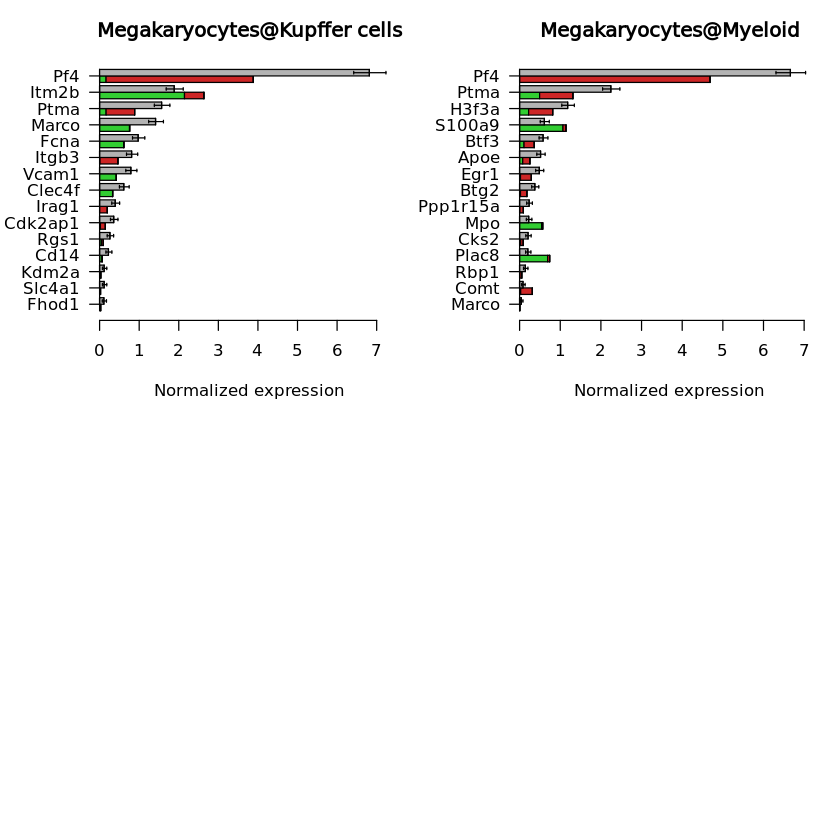

In [273]:
par(mfrow = c(2,2))
for (pop in sub_combs) {
    
    X = ((real_m - exp_m)^2 )/exp_m
    nms_short = names(head(sort(X[,pop], T), 15))
    nms_short = names(sort(real_m[nms_short,pop]))
    
    #nms_short = tail(nms, 15)
    exp_tab = rbind(t_m[nms_short, pop], dc_m[nms_short, pop], 0, 0)
    real_tab = rbind(0, 0, real_m[nms_short, pop], 0)
    tab = cbind(exp_tab, real_tab)[, rep(seq_along(nms_short), each = 2) + rep(c(0, length(nms_short)), length(nms_short))]
    tab
    
    sub_cells = intersect(rel_cells, names(pic_comb)[ pic_comb == pop])
    
    m = rowSums(ds[nms_short, sub_cells])
    n = sum(ds[,sub_cells])
    Y = binconf(m,n) * mean(colSums(ds[, sub_cells]))# * c(tapply(colSums(ds[,analyzed_pics]), pic_comb[analyzed_pics], mean))
    Y
    
    mtab = round(max(c(Y, tab), na.rm=T),2) * 1.05
    ylim = c(0, mtab)
    
    #pdf(paste0(outdir, "/megK_Kuppfer_obs-exp.pdf"), height = 8, width = 5)
    par(mar = c(5,5,3,1))
    X = barplot(tab, col = c("limegreen", "firebrick3", "gray70", "white"), xlim = ylim, las = 2, horiz = T,
        names.arg = rep("", ncol(tab)), 
        space = c(0.5,0), axes = F, main = pop, xlab = "Normalized expression")
    obs_coords = X[seq(2,length(X),2)]; ci.l = Y[, "Lower"]; ci.u = Y[, "Upper"]
    segments(y0 = obs_coords, x0 = ci.l, x1 = ci.u);
    segments(y0 = obs_coords-0.2, x0 = ci.l, y1 = obs_coords + 0.2); 
    segments(y0 = obs_coords-0.2, x0 = ci.u, y1 = obs_coords + 0.2);
    axis(1, las = 1)
    X2 = rowMeans(cbind(X[seq(1,length(X),2)], X[seq(2,length(X),2)]))
    axis(2, at = X2, labels = nms_short, las = 2)
    #dev.off()
}


par(fig = c(0,1,0,0.2), new=T, mar = c(3,5,1,1))
plot(1,1, type="n", axes=F, xlab="", ylab="", ylim = c(-0.3,1.3), xlim = quantile(X,c(0,1)))
segments(X2, 0, y1 = 1)
points(X2, rep(0, length(X2)), pch = 21, bg = large_cols[as.vector(dc_comp[ord])], cex = 2)
points(X2, rep(1, length(X2)), pch = 21, bg = large_cols[as.vector(t_comp[ord])], cex = 2)
abline(v=rowMeans(cbind(X2[cls_s], X2[cls_s + 1])))
axis(1, at = rowMeans(cbind(X2[c(1, cls_s)], X2[cls])), labels = names(cls))
box()
}

#invisible(sapply(names(which(km_clusts == 12)), gene_barplot))

In [ ]:
head(t_m)

In [235]:
marker_genes = as.matrix(read.delim("annotations//intestinal_gene_annotations.txt", stringsAsFactors = F, header=F))
colnames(marker_genes) = marker_genes[1,]
marker_genes = marker_genes[-1,]
marker_genes = melt(marker_genes)
marker_genes = marker_genes[ marker_genes$value != "",]# = marker_genes
gene2anno = marker_genes$Var2
names(gene2anno) = marker_genes$value
gene2anno


Myc                         Tcf7 
Proliferation/Wnt-associated Proliferation/Wnt-associated 
                       Tcf25                        Stat6 
Proliferation/Wnt-associated Proliferation/Wnt-associated 
                       Stat3                        Skp1a 
Proliferation/Wnt-associated Proliferation/Wnt-associated 
                        Prkx                        Pparg 
Proliferation/Wnt-associated Proliferation/Wnt-associated 
                       Ppard                       Nfatc2 
Proliferation/Wnt-associated Proliferation/Wnt-associated 
                        Fzd9                         Fzd7 
Proliferation/Wnt-associated Proliferation/Wnt-associated 
                     Csnk2a2                        Ccnd2 
Proliferation/Wnt-associated Proliferation/Wnt-associated 
                       Ccnd1                      Tacstd2 
Proliferation/Wnt-associated Proliferation/Wnt-associated 
                      Vangl1                       Notch2 
Proliferation/Wnt-associated                Notch pathway 
                      Notch1                         Hes1 
               Notch pathway                Notch pathway 
                        Gfi1                         Dll4 
               Notch pathway                Notch pathway 
                        Dll1                        Atoh1 
               Notch pathway                Notch pathway 
                        Jag2                         Jag1 
               Notch pathway                Notch pathway 
                         Sis                         Arg2 
                 Enterocytes                  Enterocytes 
                       Ccl25                         Aoc1 
                 Enterocytes                  Enterocytes 
                       Apoa4                         Vil1 
                 Enterocytes                  Enterocytes 
                        Alpi                        Gsta1 
                 Enterocytes                  Enterocytes 
                       Gstm1                        Fabp1 
                 Enterocytes                  Enterocytes 
                       Fabp2                        Apoa1 
                 Enterocytes                  Enterocytes 
                      Guca2b                        Gsta2 
                 Enterocytes                  Enterocytes 
                       S100g                        Apoc3 
                 Enterocytes                  Enterocytes 
                        Muc2                         Agr2 
                 Goblet cell                  Goblet cell 
                        Tff3                        Itln1 
                 Goblet cell                  Goblet cell 
                        Zg16                        Fcgbp 
                 Goblet cell                  Goblet cell 
                        Lyz1                       Defa17 
                 Paneth cell                  Paneth cell 
                      Defa24                         Ang4 
                 Paneth cell                  Paneth cell 
                        Chga                         Chgb 
                         EEC                          EEC 
                        Pax6                         Tph1 
                         EEC                          EEC 
                       Trpm5                        Dclk1 
                   Tuft cell                    Tuft cell 
                        Avil                        Olfm4 
                   Tuft cell                    Stem cell 
                        Bmi1                         Tert 
                   Stem cell                    Stem cell 
                       Lrig1                         Hopx 
                   Stem cell                    Stem cell 
                       Ascl2                        Lamc2 
                   Stem cell                    Stem cell 
                        Ly6d                       Cyp2e1 
                   Stem cell                    Stem cell 
             

In [249]:
#c = "Cell cycle (S)"
c = "Cell cycle (G2M)"

genes = c("Top2a", "Ube2c", "Mki67", "Cdk1")#names(gene2anno)[ gene2anno == c]
genes

[1] "Top2a" "Ube2c" "Mki67" "Cdk1"

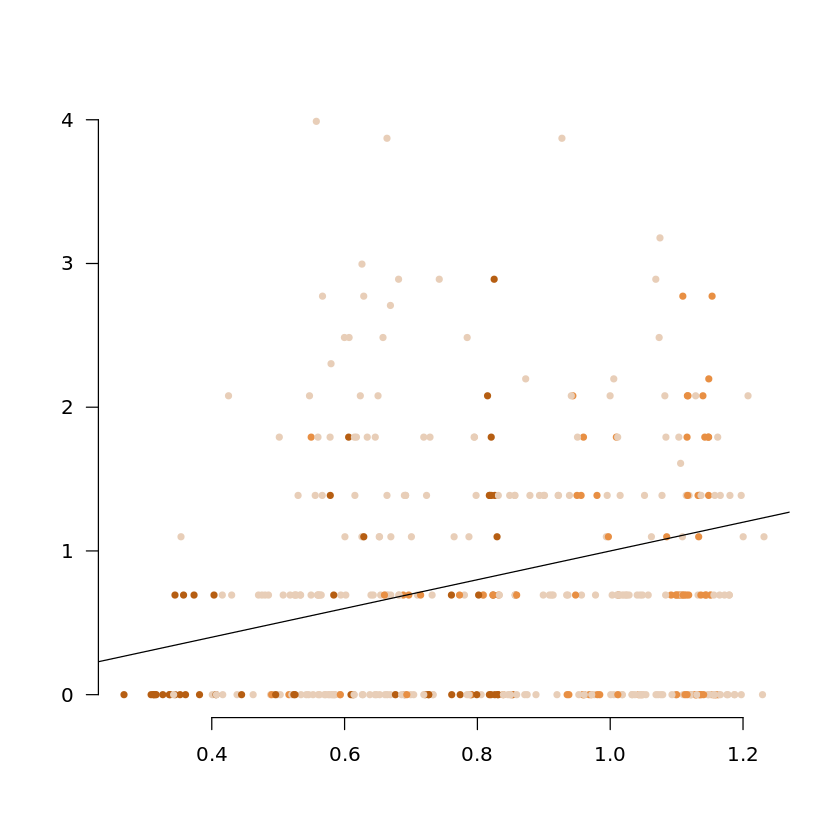

In [250]:
real_s = colSums(log(1 + ds[ genes, rel_cells]))
exp_s  = colSums(log(1 + exp_n[ genes, rel_cells]))

#t_m    = t(apply(t_n[ genes, rel_cells], 1, tapply, pic_comb[ rel_cells], mean))
#dc_m   = t(apply(dc_n[ genes, rel_cells], 1, tapply, pic_comb[ rel_cells], mean))
#dim(exp_m)

plot.2(exp_s, real_s, col = name2color[ parser_ni[ names(exp_s)]])
abline(coef = c(0,1))

In [ ]:
#a = lfp[ga,]; b = lfp[gb,]
#plot.2(a,b, pch = 21, cex = 2, bg = sin_cl@colors, xlab = ga, ylab = gb)
invisible(plot_two_genes_fp(id_s, "Cpa3", "Siglech"))

In [ ]:
nms = c("Mpo", "Irf8", "Flt3", "Cebpa", "Klf4", "Ifitm1", "Ifitm3", "Serpina3g", "Hlf", "Csf1r", "Ly86",
       "Ly6c2", "Rbp1", "Serpina3f", "Cd34", "Cst3", "Cd52", "Nrgn",
       "Prg2", "Cd7", "Adgrg1", "Tmsb10", "Gzma", "S100a10", "Ctla2a", "Myb", "Prtn3")

IM = lfp[nms,]
IM = IM[, order(mc2lin[ colnames(IM)])]
IM = IM[ order(max.col(IM)),]
image.2(IM, b=T, vct = mc2lin[ colnames(IM)]); box()

In [ ]:
length(good_pics)

In [ ]:
sin_cells = union(im_cells, ni_cells)
vct = factor(sin_names[sin_cells], levels = lin_ord); names(vct) = sin_cells

png(paste0(outdir, "/pics_heatmap_mye-genes.png"), height = max(2000, length(nms) * 12), width = 3000)
IM = log(1 + 7 * sin_umis[nms, sin_cells])
IM = IM[, order(vct[ colnames(IM)])]
par(mar = c(0.5,10,0.5,3), fig = c(0,.5,0.1,1))
image.2(IM, col = genes_shades, vct = vct[ colnames(IM)], annotate = "rows", hct = rownames(IM) %in% b_nms); box()
par(fig = c(0,0.5,0.05,0.1), new = T)
image(matrix(seq_along(vct)), axes = F, col = name2color[ as.vector(vct[colnames(IM)])]); box()
par(fig = c(0,0.5,0,0.05), new = T)
image(matrix(seq_along(vct)), axes = F, col = name2color[ as.vector(vct[colnames(IM)])]); box()



IM = log(1 + 7 * pic_umis[nms, good_pics])
IM = IM[,order(parser_both_rev[ colnames(IM)])]
par(mar = c(0.5,10,0.5,3), fig = c(0.5,1,0.1,1), new=T)
image.2(IM, col = genes_shades, vct = parser_both_rev[ colnames(IM)], annotate = "rows", hct = rownames(IM) %in% b_nms); box()
par(fig = c(0.5,1,0.05,0.1), new = T)
image(matrix(seq_along(parser_both_rev)), axes = F, col = name2color[ vecsplit(as.vector(parser_both_rev[colnames(IM)]), "@", 1)]); box()
par(fig = c(0.5,1,0,0.05), new = T)
image(matrix(seq_along(parser_both_rev)), axes = F, col = name2color[ vecsplit(as.vector(parser_both_rev[colnames(IM)]), "@", 2)]); box()
dev.off()

In [ ]:
table(mle_res$type)

In [ ]:
head(mle_res)

In [ ]:
#table(parser_im)
pop = "Myeloid cells"
pop_cells = names(which(parser_im == pop))
length(pop_cells)

with(mle_res[ good_pics,], plot.2(alpha, diff, col = alpha("black", 0.3)))
with(mle_res[ pop_cells,], points(alpha, diff, pch = 21, bg = name2color[pop]))
#    pch = 21, bg = sin_cl@colors[ as.numeric(a_mc)]))

In [ ]:
umis_n = sweep(umis, 2, colSums(umis), "/") * 1000

In [ ]:
cells = union(im_cells, ni_cells)
m = t(apply(umis_n[,cells], 1, tapply, sin_names[ cells], mean))

In [ ]:
head(m)

In [ ]:
g1 = "Myeloid cells"
g2 = "Monocytes"
g3 = "Elane+ Ms4a3+ immature neutrophils"

reg = 0.05
z_mon = log2((m[,g1] + reg) / (m[,2] + reg))
z_neut = log2((m[,g1] + reg) / (m[,3] + reg))

plot.2(z_mon, z_neut, text = T, cex = 0.5)
grid(col = "blue")
head(sort(z_neut, T), 20)
head(sort(z_mon, T), 20)

In [ ]:
#cells = union(im_cells, ni_cells)
sin_m = t(apply(umis[,im_cells], 1, tapply, sin_names[ im_cells], mean))
db_m = t(apply(umis[, good_pics], 1, tapply, parser_im[ good_pics], mean))

In [ ]:
head(sin_m)
head(db_m)

In [ ]:
g = "Myeloid cells"
reg = 0.02
sin_mn = log2((reg + sin_m) / (reg + apply(sin_m, 1, median)))
db_mn = log2((reg + db_m) / (reg + apply(db_m, 1, median)))
plot.2(sin_mn[,g], db_mn[,g], text = T, cex = 0.5)
abline(h = 0, v = 0)

In [ ]:
g1 = "Myeloid cells"
g2 = "Monocytes"
reg = 0.02
sin_z = log2((reg + sin_m[,g1]) / (reg + sin_m[,g2]))
db_z = log2((reg + db_m[,g1]) / (reg + db_m[,g2]))
plot.2(sin_z, db_z, text = T, cex = 0.5)
abline(h = 0, v = 0)

In [ ]:
new_plates = c("AB1384",
"AB1392",
"AB1393",
"AB1394",
"AB1382",
"AB1383",
"AB1389",
"AB1390",
"AB1391")

In [ ]:
head(cell_stats)
plates = names(table(cell_stats$plate))
venn(new_plates, plates)

## Triplets analysis

Another feature of the PIC-seq pipeline is trying to estimate the fraction of triplets in a given set of PICs, as well as control for the existence of triplets when assessing down-stream deviations from the model.

Triplet analysis builds on the "basic" results of the PIC-seq algorithm (assuming each PIC is a doublet), allowing each PIC to be modeled as two T cells and one DC ("forward" triplet), or one T cell and two DC ("reverse" triplet).
When modeling as a forward triplet, PIC-seq uses the b_mc and $\alpha$ derived from the basic analysis, and assigns each PICs two T metacells that maximize the likelihood. A triplet score, which represent the gain in likelihood when modelling the PIC as a forward triplet rather than a doublet, is computed.

The distribution of the triplet scores (forward or reverse) is compare to sets of synthetic doublets and triplets to derive an estimation of the triplet fraction in the PIC population.

Let's run triplet analysis on our PIC population:


In [ ]:
triplet_dir = "triplets/"
dir.create(triplet_dir)
coc_cells = rownames(cell_stats)[ cell_stats$treatment == "OVA + LPS"]
comb = NULL

triplet_res = analyze_triplets(id_s, id_s, id_s, ds[,good_pics], intersect(t_cells, coc_cells), intersect(dc_cells, coc_cells),
	mle_res, mle_features, bad_genes=bad_genes, reg=1e-4, outdir=triplet_dir, downsample=F, )

forward_pr = triplet_res$tr_p
reverse_pr = triplet_res$rev_p
tr_res = triplet_res$mle_res
head(tr_res)

In [ ]:
write.table(tr_res, sep = "\t", quote=F, col.names=NA, file = "annotations/triplet_res.txt")
message("Forward fraction estimation: ", forward_pr)
message("Reverse fraction estimation: ", reverse_pr)

We can appreciate that PIC-seq assumes a much larger fraction of forward triplets (2 T and one DC) than reverse triplets.
This is in line with out biological knowledge.

In [ ]:
tr_res = read.delim("annotations/triplet_res.txt", stringsAsFactors = F, row.names=1)
head(tr_res)

We can now choose to filter out PICs suspected as triplets, based on the triplet score (forward_diff and reverse_diff), and the fraction estimation:

In [ ]:

plot(ecdf(tr_res$forward_diff))
abline(v = 0)
abline(h = 1-forward_pr, lty = 2)

Alternatively, a less wasteful approach, is to retain suspected triplets in the data, but to control the effect of triplets on the down-stream observations.

For example, we can use the results of the triplet analysis to generate a new expected UMI matrix, where each PIC is modeled as a forward (or reverse) triplet:

In [ ]:
# generate PICs expected UMIs when modeled as 2T+DC triplets
tr_res = triplet_res$mle_res
triplet_mc = tr_res[cells, c("forward_a1_mc", "forward_a2_mc", "b_mc")]
triplet_alpha = with(tr_res[cells,], cbind(forward_alpha, 1 - forward_alpha) *  alpha); 
exp_tr_us = generate_expected_pics_from_mle(id_s, triplet_mc, triplet_alpha,
        colSums(us), bad_genes = bad_genes)

y = rowSums(us[genes,good_pics]); 
x = rowSums(exp_us[genes,good_pics]);
x2 = rowSums(exp_tr_us[genes, cells])

In [ ]:
z1 = log2((y+reg)/(x+reg)); z2 = log2((y+reg)/(x2+reg))
plot(z1, z2, type = "n", xlab = "log2 (obs/exp doublets)", ylab = "log2 (obs / exp triplets)"); 
grid(col = "black"); abline(coef = c(0,1)); points(z1, z2, cex = 2, pch = 20, col = "navyblue")


In the above graph, we can appreciate that the same genes are upregulated compare to the expected valuses, regardless of whether we model the PICs as doublets (x axis) or as forward triplets (y axis).

Therefore, we can assume that triplets existence in our dataset doesn't affect our conclusions.

In [ ]:
cell_stats = scdb_mat("hemato_all")@cell_metadata
dim(cell_stats)
table(cell_stats$Include)

In [ ]:
new_cells = rownames(cell_stats)[ cell_stats$umicount > 500 & cell_stats$mt_frac < 0.25 &
          cell_stats$Tissue == "Liver" & cell_stats$Include == "Index"]
length(new_cells)

In [ ]:
length(im_cells)

In [ ]:
cells = union(new_cells, im_cells)
umis = read_large_umis("hemato_all", cells = cells)
dim(umis)

In [ ]:
umis = umis[sin_mat@genes,]
dim(umis)

In [ ]:
markers = names(scdb_gset(id)@gene_set)
markers

In [ ]:
clusts = proj_sc_on_clusts(umis, new_cells = new_cells, old_cells = im_cells, clusts = sin_cl@mc[ im_cells], markers = markers)


In [ ]:
table(clusts)

In [ ]:
head(clusts)

In [ ]:
genes_shades = colorRampPalette(c("white", 
        "orange", "tomato", "mediumorchid4", "midnightblue"))(1000)
vct = factor(color2name[ sin_cl@colors[ clusts]], levels = im_pops)
names(vct) = names(clusts)

In [ ]:
a_nms

In [ ]:
umis_n = sweep(umis, 2, colSums(umis), "/")
foc = log(1 + 7 * umis_n)
IM = foc[setdiff(a_nms, c('Hba-a1', 'Hba-a2', 'Hbb-bs')), new_cells]
image.2(IM, col = genes_shades, vct = vct[ colnames(IM)]); box()

In [ ]:
plate_df = read.delim("annotations//cell_barcode_list.csv", stringsAsFactors = F, sep = ",")
cell_stats = merge(cell_stats, plate_df, by.x = "barcode", by.y = "cell_barcode")
head(cell_stats)
head(plate_df)

In [ ]:
rownames(cell_stats) = cell_stats$cell

In [ ]:
index_files = list.files("indexing/")
index_files

In [ ]:
index_tabs = lapply(paste0("indexing/", index_files), read.delim, stringsAsFactors = F, skip = 9, sep = ",")
names(index_tabs) = vecsplit(index_files, "\\.", 1)
l = sapply(index_tabs, nrow)
l

In [ ]:
library(gtools)

In [ ]:
index_tab = do.call(smartbind, index_tabs)
index_tab$plate = rep(names(l), l)
index_tab$well = ifelse(is.na(index_tab$well), index_tab$Well, index_tab$well)
head(index_tab)
tail(index_tab)

In [ ]:
index_tab = merge(cell_stats, index_tab, by.x = c("plate", "well_position"), by.y = c("plate", "well"))


In [ ]:
rownames(index_tab) = index_tab$cell
index_tab$clust = clusts[ rownames(index_tab)]
index_tab$vct = vct[ rownames(index_tab)]
head(index_tab)
write.table(colnames(index_tab))

In [ ]:
with(index_tab, table(as.vector(plate), vct))

In [ ]:
par(mar = c(15,3,1,1), mfrow = c(1,2))
with(index_tab, boxplot(log10(as.numeric(P3.F480.YG.582.15.A.Mean)) ~ vct, las = 2, xlab = "", col = name2color[ im_pops]))
with(index_tab, boxplot(log10(as.numeric(X.CSF1R.MRC1.F4.80.B.530.30...505LP.A)) ~ vct, las = 2, xlab = "", col = name2color[ im_pops]))
